Obtained from Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023), this dataset contains the most streamed songs of 2023 on the music platform Spotify. The data includes information about each song’s characteristics and its popularity on various music platforms.

In this project, I analyzed how musical factors impact a song’s “danceability.”


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd

In [79]:
data = pd.read_csv('drive/MyDrive/spotify_2023.csv', encoding='latin1')

In [80]:
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


There are many features availible, but I think the only relavant ones are listed below as they are the only ones that determine how a song sounds:

Dependent Variable:
*   danceability_%: percentage indicating how suitable the song is for dancing




Independent Variables:
*   bpm: beats per minute, a measure of song tempo
*   valence_%: positivity of the song’s musical content
*   energy_%: perceived energy level of the song
*   acousticness_%: amount of acoustic sound in the song
*   speechiness_%: amount of spoken words in the song
*   liveness_%: presence of live performance elements
*   instrumentalness_%: amount of instrumental content in the song

I am only going to use these variables for this analysis.

In [82]:
# Independent variables (features)
features = ["bpm", "valence_%", "energy_%", "acousticness_%", "speechiness_%", "liveness_%", "instrumentalness_%"]

# Dependent variable (target)
target = "danceability_%"

# Extract the independent (X) and dependent (y) variables
x = data.loc[:, features].values
y = data[target].values

# Scale the independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
xscaled = scale.fit_transform(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(xscaled, device=torch.device("cpu"), dtype=torch.float64)
y_tensor = torch.tensor(y, device=torch.device("cpu"), dtype=torch.float64)


# print(x_tensor.dtype)
# print(y_tensor.shape)

# print(x_tensor)
# print(y_tensor)


I next checked the data to see if there was any multicolinearity. The variables don't seem to be very correlated at all.





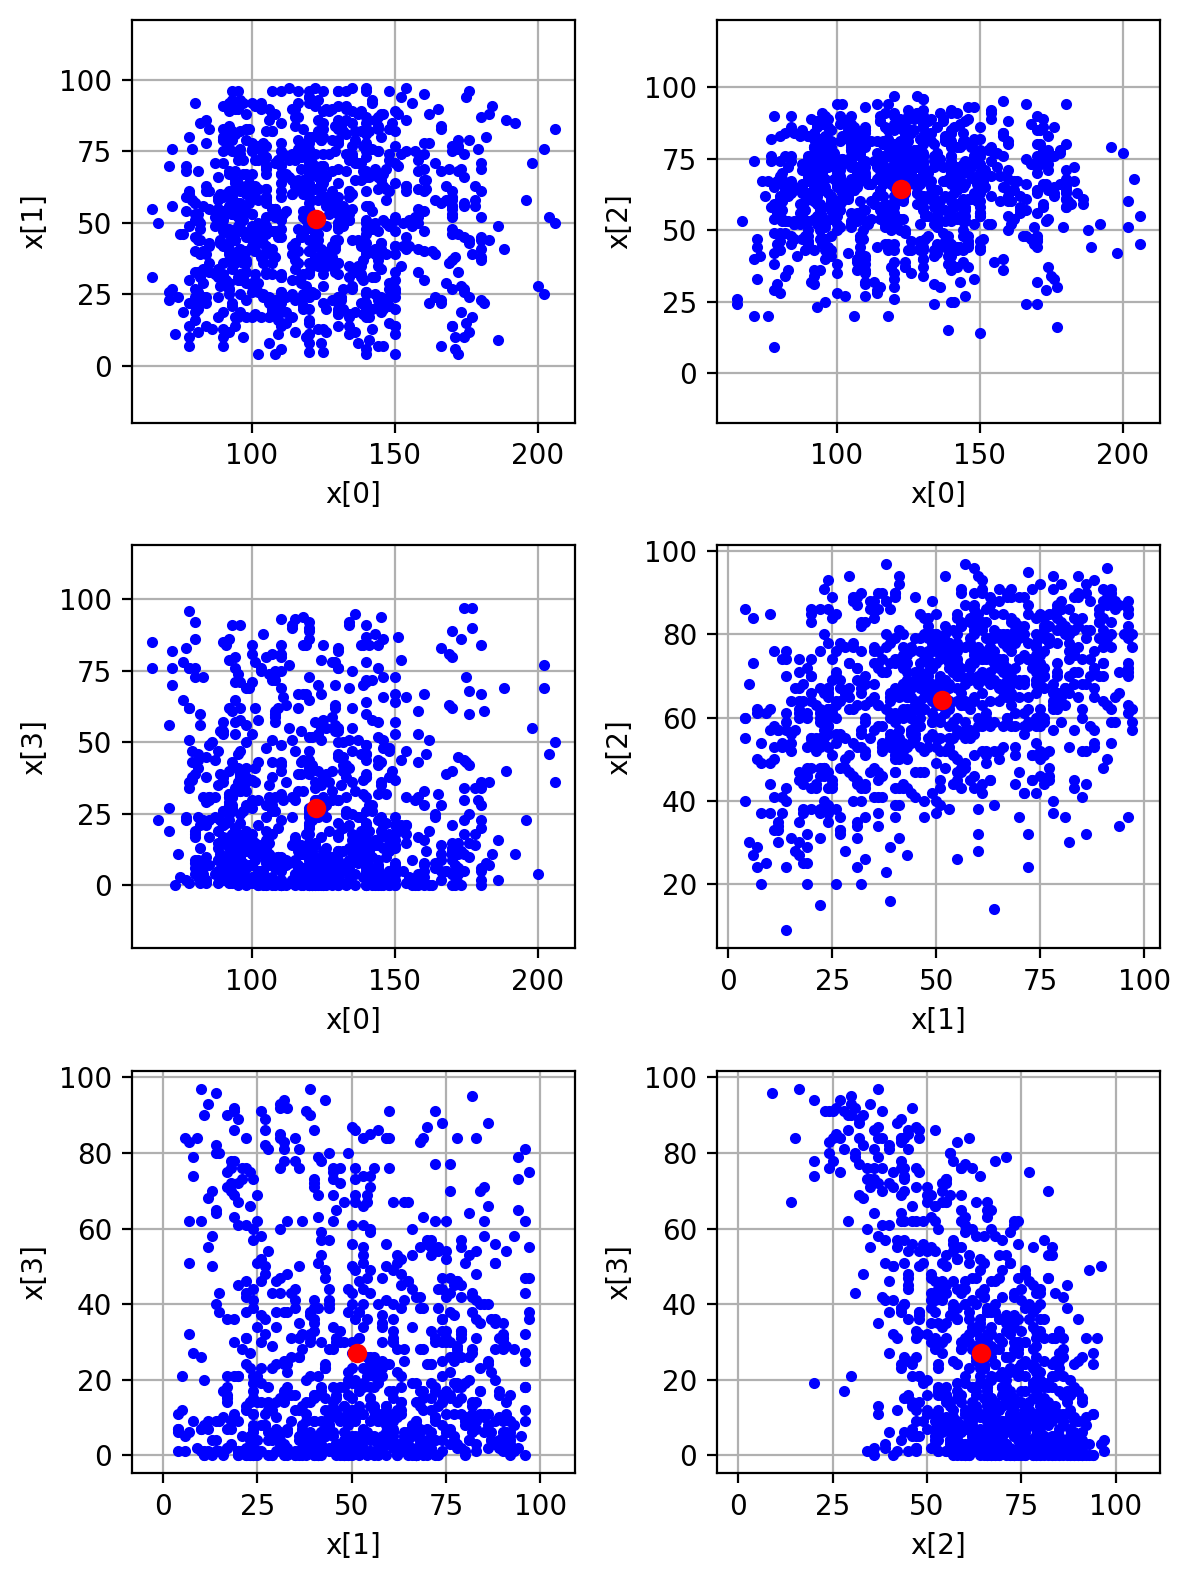

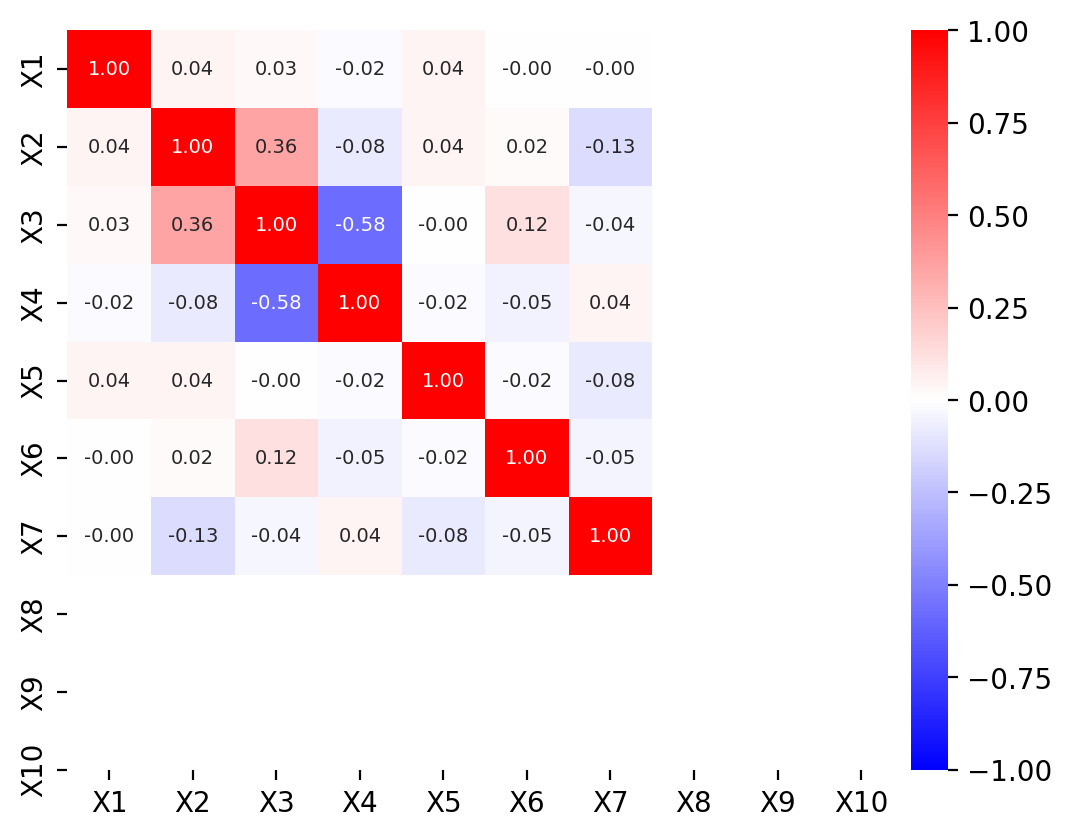

In [83]:

mu = np.mean(x,axis=0)

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(6,8))


plt.subplot(3,2,1)
plt.plot(x[:,0], x[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(x[:,0], x[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(x[:,0], x[:,3], 'b.')
plt.plot(mu[0], mu[3], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(x[:,1], x[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(x[:,1], x[:,3], 'b.')
plt.plot(mu[1], mu[3], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(x[:,2], x[:,3], 'b.')
plt.plot(mu[2], mu[3
                   ], 'ro')
plt.xlabel('x[2]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)
fig.tight_layout()
plt.show()
cols = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']

# mind the transpose of x
# here we look at the correlations among the first 10 features
sns.heatmap(np.corrcoef(np.transpose(x[:,:10])),cmap='bwr',vmin=-1,vmax=1,annot=True,fmt='.2f',annot_kws={"size": 7},xticklabels=cols,yticklabels=cols)
plt.show()

To begin the analysis, I created a PyTorch class that implements the method of SCAD regularization and variable selection (smoothly clipped absolute deviations) for linear models. I did the same thing for ElasticNet and SqrtLasso. Then I generate 200 data sets where the input features have a low correlation structure (I used 0.2) and then I applied ElasticNet, SqrtLasso and SCAD to check which method produces the best approximation of an ideal solution, such as a "betastar" that I designed with a sparsity pattern.

In [20]:
import torch # we are going to use pytorch instead of numpy because it's much faster.
import torch.nn as nn
# from ignite.contrib.metrics.regression import R2Score
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.datasets import make_spd_matrix
from scipy.optimize import minimize
from scipy.linalg import toeplitz
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as R2

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# from sklearn.model_selection import KFold, train_test_split as tts
# from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [21]:
device = torch.device("cpu")
dtype = torch.float64

In [23]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, data):
        """
        Compute the minimum and maximum value of the data for scaling.

        Args:
        - data (torch.Tensor): Input data tensor.
        """
        self.mean = torch.mean(data, dim=0, keepdim=True)
        self.std = torch.std(data, dim=0, keepdim=True)+1e-10

    def transform(self, data):
        """
        Scale the data based on the computed minimum and maximum values.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        if self.mean is None or self.std is None:
            raise ValueError("Scaler has not been fitted yet. Please call 'fit' with appropriate data.")

        scaled_data = (data - self.mean) / (self.std)
        return scaled_data

    def fit_transform(self, data):
        """
        Fit to data, then transform it.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        self.fit(data)
        return self.transform(data)

In [24]:
class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        """
        Compute the minimum and maximum value of the data for scaling.

        Args:
        - data (torch.Tensor): Input data tensor.
        """
        self.min = torch.min(data, dim=0, keepdim=True).values
        self.max = torch.max(data, dim=0, keepdim=True).values

    def transform(self, data):
        """
        Scale the data based on the computed minimum and maximum values.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        if self.min is None or self.max is None:
            raise ValueError("Scaler has not been fitted yet. Please call 'fit' with appropriate data.")

        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def fit_transform(self, data):
        """
        Fit to data, then transform it.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        self.fit(data)
        return self.transform(data)

SCAD

In [25]:
def scad_penalty(beta_hat, lambda_val, alpha):
    beta_hat_abs = torch.abs(beta_hat)
    is_linear = (beta_hat_abs <= lambda_val).float()
    is_quadratic = ((lambda_val < beta_hat_abs) & (beta_hat_abs <= alpha * lambda_val)).float()
    is_constant = (alpha * lambda_val < beta_hat_abs).float()

    linear_part = lambda_val * beta_hat_abs * is_linear
    quadratic_part = ((2 * alpha * lambda_val * beta_hat_abs - beta_hat_abs**2 - lambda_val**2) / (2 * (alpha - 1))) * is_quadratic
    constant_part = (lambda_val**2 * (alpha + 1)) / 2 * is_constant

    return linear_part + quadratic_part + constant_part

In [26]:
class SCAD(nn.Module):
    def __init__(self, input_size, lambda_val=1.0, alpha=3.7):
        """
        Initialize the SCAD regression model.

        Args:
            input_size (int): Number of input features.
            lambda_val (float): Regularization strength.
            alpha (float): SCAD parameter that controls the non-convexity of the penalty.
        """
        super(SCAD, self).__init__()
        self.input_size = input_size
        self.lambda_val = lambda_val
        self.alpha = alpha

        # Define the linear regression layer
        self.linear = nn.Linear(input_size, 1,bias=False,device=device,dtype=dtype)

    def forward(self, x):
        """
        Forward pass of the SCAD model.

        Args:
            x (Tensor): Input data with shape (batch_size, input_size).

        Returns:
            Tensor: Predicted values with shape (batch_size, 1).
        """
        return self.linear(x)

    def loss(self, y_pred, y_true):
        """
        Compute the SCAD loss function with SCAD penalty.

        Args:
            y_pred (Tensor): Predicted values with shape (batch_size, 1).
            y_true (Tensor): True target values with shape (batch_size, 1).

        Returns:
            Tensor: The SCAD loss.
        """
        mse_loss = nn.functional.mse_loss(y_pred, y_true)
        scad_penalty_term = scad_penalty(self.linear.weight, self.lambda_val, self.alpha).sum()

        return mse_loss + scad_penalty_term

    def fit(self, X, y, num_epochs=100, learning_rate=1e-6):
        """
        Fit the SCAD model to the training data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).
            y (Tensor): Target values with shape (num_samples, 1).
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.
        """
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()

            y_pred = self.forward(X)
            loss = self.loss(y_pred, y.reshape(-1, 1))
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

    def predict(self, X):
        """
        Predict target values for input data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).

        Returns:
            Tensor: Predicted values with shape (num_samples, 1).
        """
        self.eval()
        with torch.no_grad():
            return self.forward(X)

    def get_coefficients(self):
        """
        Get the coefficients (weights) of the linear regression layer.

        Returns:
            Tensor: Coefficients with shape (output_size, input_size).
        """
        return self.linear.weight.data


ElasticNet

In [56]:
class ElasticNet(nn.Module):
    def __init__(self, input_size, alpha=1.0, l1_ratio=0.5):
        """
        Initialize the ElasticNet regression model.

        Args:
            input_size (int): Number of input features.
            alpha (float): Regularization strength. Higher values of alpha
                emphasize L1 regularization, while lower values emphasize L2 regularization.
            l1_ratio (float): The ratio of L1 regularization to the total
                regularization (L1 + L2). It should be between 0 and 1.

        """
        super(ElasticNet, self).__init__()
        self.input_size = input_size
        self.alpha = alpha
        self.l1_ratio = l1_ratio

        # Define the linear regression layer
        self.linear = nn.Linear(input_size, 1,bias=False,device=device,dtype=dtype)

    def forward(self, x):
        """
        Forward pass of the ElasticNet model.

        Args:
            x (Tensor): Input data with shape (batch_size, input_size).

        Returns:
            Tensor: Predicted values with shape (batch_size, 1).

        """
        return self.linear(x)

    def loss(self, y_pred, y_true):
        """
        Compute the ElasticNet loss function.

        Args:
            y_pred (Tensor): Predicted values with shape (batch_size, 1).
            y_true (Tensor): True target values with shape (batch_size, 1).

        Returns:
            Tensor: The ElasticNet loss.

        """
        mse_loss = nn.MSELoss()(y_pred, y_true)
        l1_reg = torch.norm(self.linear.weight, p=1)
        l2_reg = torch.norm(self.linear.weight, p=2)

        objective = (1/2) * mse_loss + self.alpha * (
            self.l1_ratio * l1_reg + (1 - self.l1_ratio) * (1/2)*l2_reg**2)

        return objective

    def fit(self, X, y, num_epochs=100, learning_rate=0.01):
        """
        Fit the ElasticNet model to the training data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).
            y (Tensor): Target values with shape (num_samples, 1).
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.

        """
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()
            y_pred = self(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

    def predict(self, X):
        """
        Predict target values for input data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).

        Returns:
            Tensor: Predicted values with shape (num_samples, 1).

        """
        self.eval()
        with torch.no_grad():
            y_pred = self(X)
        return y_pred
    def get_coefficients(self):
        """
        Get the coefficients (weights) of the linear regression layer.

        Returns:
            Tensor: Coefficients with shape (output_size, input_size).

        """
        return self.linear.weight


sqrtLasso

In [37]:
# we can call this version PED_Adam because we use the adaptive momentum gradient descent for optimization
class sqrtLasso(nn.Module):
    def __init__(self, input_size, alpha=0.1):
        """
        Initialize the  regression model.


        """
        super(sqrtLasso, self).__init__()
        self.input_size = input_size
        self.alpha = alpha


        # Define the linear regression layer
        self.linear = nn.Linear(input_size, 1).double()

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input data with shape (batch_size, input_size).

        Returns:
            Tensor: Predicted values with shape (batch_size, 1).

        """
        return self.linear(x)

    def loss(self, y_pred, y_true):
        """
        Compute the loss function.

        Args:
            y_pred (Tensor): Predicted values with shape (batch_size, 1).
            y_true (Tensor): True target values with shape (batch_size, 1).

        Returns:
            Tensor: The loss.

        """
        mse_loss = nn.MSELoss()(y_pred, y_true)
        l1_reg = torch.norm(self.linear.weight, p=1,dtype=torch.float64)
        # l2_reg = torch.norm(self.linear.weight, p=2,dtype=torch.float64)

        loss = (len(y_true)*mse_loss)**(1/2) + self.alpha * (l1_reg)

        return loss

    def fit(self, X, y, num_epochs=200, learning_rate=0.01):
        """
        Fit the model to the training data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).
            y (Tensor): Target values with shape (num_samples, 1).
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.

        """
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()
            y_pred = self(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

    def predict(self, X):
        """
        Predict target values for input data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).

        Returns:
            Tensor: Predicted values with shape (num_samples, 1).

        """
        self.eval()
        with torch.no_grad():
            y_pred = self(X)
        return y_pred
    def get_coefficients(self):
        """
        Get the coefficients (weights) of the linear regression layer.

        Returns:
            Tensor: Coefficients with shape (output_size, input_size).

        """
        return self.linear.weight

Generating Correlated Data

In [70]:
# we want to define a function for generating x with a prescribed number of obsvervations, features and Toeplitz correlation structure.
# I made it output y values t000
def make_correlated_features(num_samples,p,rho):
  vcor = []
  for i in range(p):
    vcor.append(rho**i)
  r = toeplitz(vcor)
  mu = np.repeat(0,p)
  x = np.random.multivariate_normal(mu, r, size=num_samples)
  beta =np.array([-1,2,3,0,0,0,0,2,-1,4])
  beta = beta.reshape(-1,1)
  betastar = np.concatenate([beta,np.repeat(0,p-len(beta)).reshape(-1,1)],axis=0)
  y = x@betastar + 1.5*np.random.normal(size=(n,1))
  return x, y

In [71]:
rho =0.2
p = 20
n = 150
vcor = []
for i in range(p):
  vcor.append(rho**i)

In [72]:
x, y = make_correlated_features(n,p,rho)

In [34]:
# x

In [35]:
# y

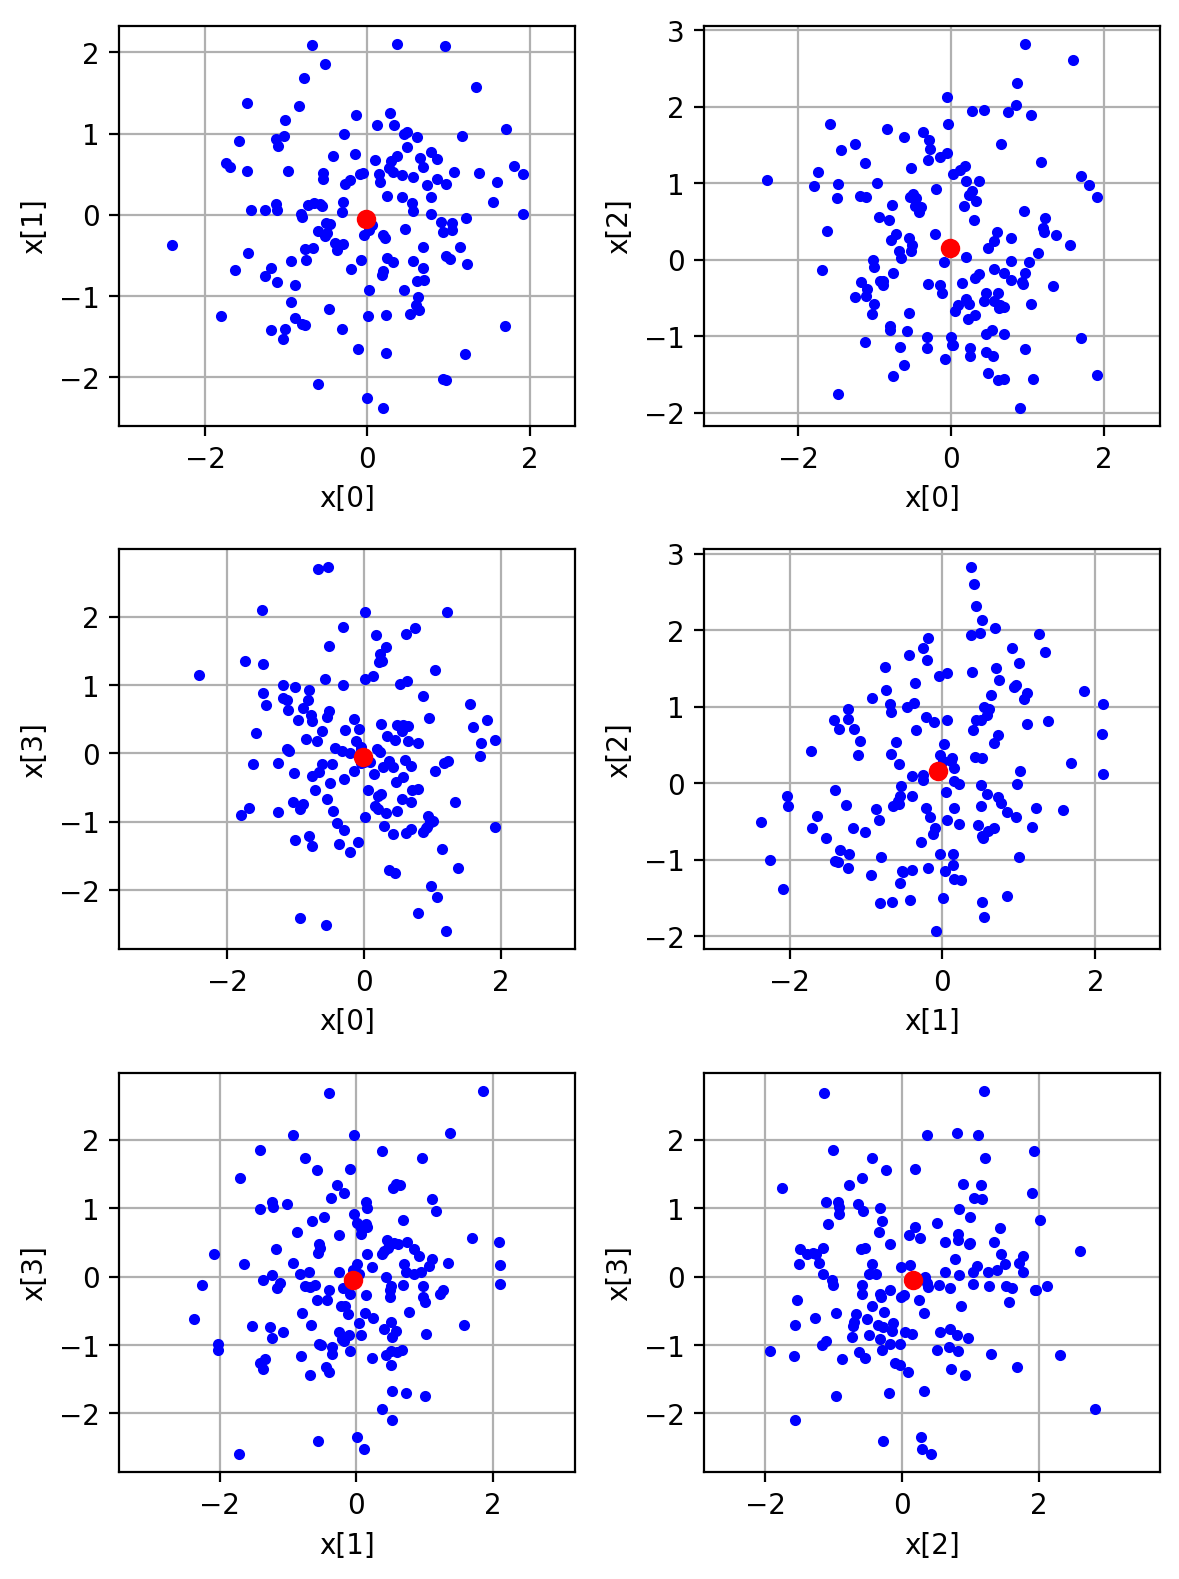

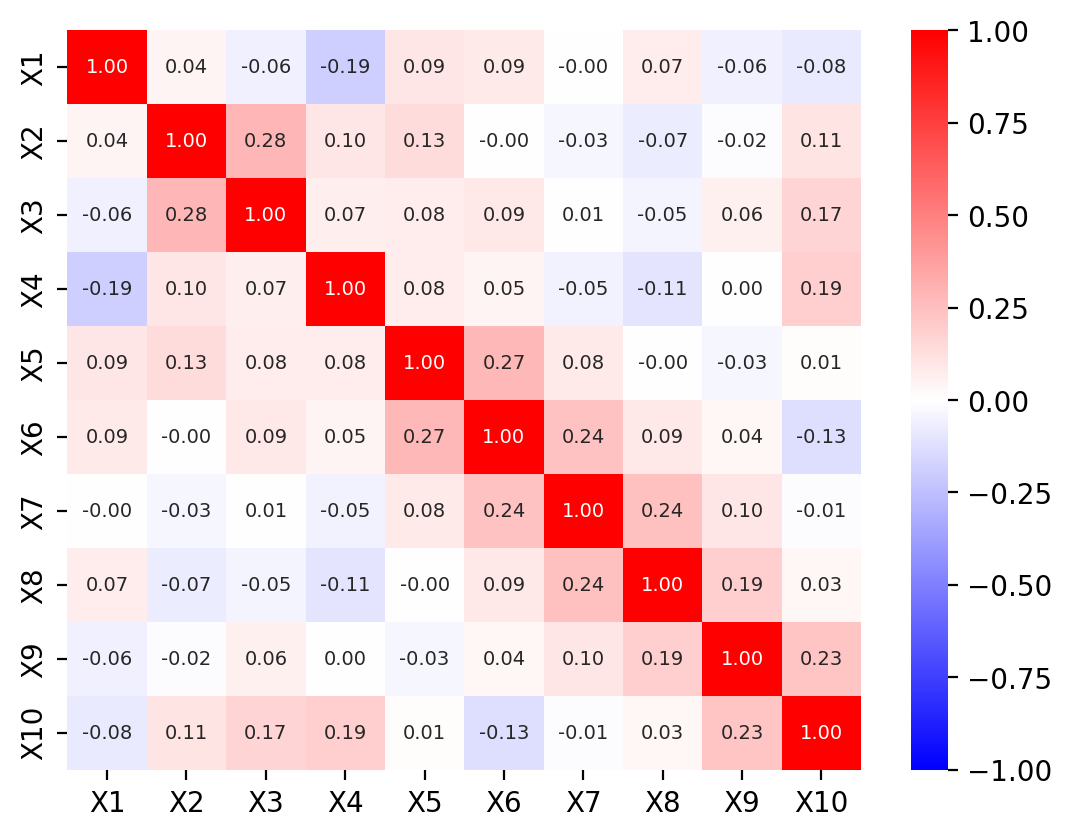

In [73]:

mu = np.mean(x,axis=0)

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(6,8))


plt.subplot(3,2,1)
plt.plot(x[:,0], x[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(x[:,0], x[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(x[:,0], x[:,3], 'b.')
plt.plot(mu[0], mu[3], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(x[:,1], x[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(x[:,1], x[:,3], 'b.')
plt.plot(mu[1], mu[3], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(x[:,2], x[:,3], 'b.')
plt.plot(mu[2], mu[3
                   ], 'ro')
plt.xlabel('x[2]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)
fig.tight_layout()
plt.show()
cols = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']

# mind the transpose of x
# here we look at the correlations among the first 10 features
sns.heatmap(np.corrcoef(np.transpose(x[:,:10])),cmap='bwr',vmin=-1,vmax=1,annot=True,fmt='.2f',annot_kws={"size": 7},xticklabels=cols,yticklabels=cols)
plt.show()

In [74]:
rho =0.2
p = 20
n = 150
vcor = []
for i in range(p):
  vcor.append(rho**i)
beta =np.array([-1,2,3,0,0,0,0,2,-1,4])
beta = beta.reshape(-1,1)
betastar = np.concatenate([beta,np.repeat(0,p-len(beta)).reshape(-1,1)],axis=0)

EN_errors = []
SL_errors = []
scad_errors = []

for _ in range(200):

  # x, y = make_correlated_features(n,p,rho)
  if torch.cuda.is_available():
    device='cuda'
  else:
    device= 'cpu'

  x = torch.tensor(x,device=device)
  y = torch.tensor(y,device=device)

  #ElasticNet
  EN_model = ElasticNet(input_size=x.shape[1], alpha=0.1, l1_ratio=0.5)
  EN_model.fit(x, y, num_epochs=1000, learning_rate=0.01)
  beta_en = EN_model.get_coefficients().detach().numpy().flatten()
  EN_errors.append(mse(betastar, beta_en))

  #sqrtLasso
  SL_model=sqrtLasso(input_size=x.shape[1],alpha=0.1)
  SL_model.fit(x,y,num_epochs=1000,learning_rate=0.01)
  beta_sl = SL_model.get_coefficients().detach().numpy().flatten()
  SL_errors.append(mse(betastar, beta_sl))

  #SCAD
  scad_model = SCAD(input_size=x.shape[1],alpha=0.1)
  scad_model.fit(x, y)
  beta_scad = scad_model.get_coefficients().detach().numpy().flatten()
  scad_errors.append(mse(betastar, beta_scad))


Epoch [100/1000], Loss: 3.821641709162736
Epoch [200/1000], Loss: 2.6251386511704533
Epoch [300/1000], Loss: 2.4332851461954537
Epoch [400/1000], Loss: 2.3904948747723758
Epoch [500/1000], Loss: 2.3791503639177947
Epoch [600/1000], Loss: 2.3758906708827308
Epoch [700/1000], Loss: 2.3748807158742062
Epoch [800/1000], Loss: 2.374519993902193
Epoch [900/1000], Loss: 2.374425113043154
Epoch [1000/1000], Loss: 2.3743557639627246
Epoch [100/1000], Loss: 53.69190893487917
Epoch [200/1000], Loss: 34.04132674635846
Epoch [300/1000], Loss: 21.957883540937566
Epoch [400/1000], Loss: 18.38982263656839
Epoch [500/1000], Loss: 17.874537745387443
Epoch [600/1000], Loss: 17.831176059713965
Epoch [700/1000], Loss: 17.82838733779154
Epoch [800/1000], Loss: 17.828524038866625
Epoch [900/1000], Loss: 17.828461457417955
Epoch [1000/1000], Loss: 17.828418625438168
Epoch [10/100], Loss: 54.76643498512208
Epoch [20/100], Loss: 54.76355081904882
Epoch [30/100], Loss: 54.760666841078134
Epoch [40/100], Loss: 54

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6471744477767554
Epoch [300/1000], Loss: 2.4388967920675833
Epoch [400/1000], Loss: 2.3919031094361394
Epoch [500/1000], Loss: 2.379563322167792
Epoch [600/1000], Loss: 2.376025770899303
Epoch [700/1000], Loss: 2.37492602750398
Epoch [800/1000], Loss: 2.3745612740633395
Epoch [900/1000], Loss: 2.374442784692758
Epoch [1000/1000], Loss: 2.374370482805455
Epoch [100/1000], Loss: 51.462247387417456
Epoch [200/1000], Loss: 32.0994325594626
Epoch [300/1000], Loss: 20.866629264826695
Epoch [400/1000], Loss: 18.1459985891714
Epoch [500/1000], Loss: 17.84753648219409
Epoch [600/1000], Loss: 17.82915509381687
Epoch [700/1000], Loss: 17.828370266872778
Epoch [800/1000], Loss: 17.828307070439887
Epoch [900/1000], Loss: 17.82834866628482
Epoch [1000/1000], Loss: 17.82834825428282
Epoch [10/100], Loss: 52.32272675240728
Epoch [20/100], Loss: 52.32023004687813
Epoch [30/100], Loss: 52.317733486725004
Epoch [40/100], Loss: 52.31523707193856
Epoch [50/100], Loss: 52.312740802

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.667327117966587
Epoch [300/1000], Loss: 2.4452942135366555
Epoch [400/1000], Loss: 2.3936263902637704
Epoch [500/1000], Loss: 2.3801296872975306
Epoch [600/1000], Loss: 2.3762058454804613
Epoch [700/1000], Loss: 2.3750044272468624
Epoch [800/1000], Loss: 2.374595188781813
Epoch [900/1000], Loss: 2.374436274968961
Epoch [1000/1000], Loss: 2.3743881649289413
Epoch [100/1000], Loss: 53.60274761989582
Epoch [200/1000], Loss: 33.89011896073859
Epoch [300/1000], Loss: 21.773122451490693
Epoch [400/1000], Loss: 18.28008093649656
Epoch [500/1000], Loss: 17.854423594689656
Epoch [600/1000], Loss: 17.829280588395335
Epoch [700/1000], Loss: 17.828323081804278
Epoch [800/1000], Loss: 17.828536769340033
Epoch [900/1000], Loss: 17.82846459098976
Epoch [1000/1000], Loss: 17.82840940333883
Epoch [10/100], Loss: 52.71925889010514
Epoch [20/100], Loss: 52.71654959169953
Epoch [30/100], Loss: 52.71384047107069
Epoch [40/100], Loss: 52.71113152820628
Epoch [50/100], Loss: 52.7084

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6598836418326304
Epoch [300/1000], Loss: 2.442307846102887
Epoch [400/1000], Loss: 2.392546066342825
Epoch [500/1000], Loss: 2.3797849400105537
Epoch [600/1000], Loss: 2.3761234231330364
Epoch [700/1000], Loss: 2.374962401189894
Epoch [800/1000], Loss: 2.3745790044066295
Epoch [900/1000], Loss: 2.3744329345907067
Epoch [1000/1000], Loss: 2.3743834501205785
Epoch [100/1000], Loss: 54.923951331703506
Epoch [200/1000], Loss: 35.324140876379744
Epoch [300/1000], Loss: 22.546097742804523
Epoch [400/1000], Loss: 18.467952459735436
Epoch [500/1000], Loss: 17.877455501463924
Epoch [600/1000], Loss: 17.831260986459583
Epoch [700/1000], Loss: 17.828794213870196
Epoch [800/1000], Loss: 17.828364819361987
Epoch [900/1000], Loss: 17.828402408868456
Epoch [1000/1000], Loss: 17.828349322070245
Epoch [10/100], Loss: 49.62586375356845
Epoch [20/100], Loss: 49.62335640782199
Epoch [30/100], Loss: 49.62084922313019
Epoch [40/100], Loss: 49.61834219948186
Epoch [50/100], Loss: 49

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.820415706946642
Epoch [200/1000], Loss: 2.622934407090708
Epoch [300/1000], Loss: 2.432300845086937
Epoch [400/1000], Loss: 2.390257694898713
Epoch [500/1000], Loss: 2.3790676806692312
Epoch [600/1000], Loss: 2.375856970790135
Epoch [700/1000], Loss: 2.3748482435256704
Epoch [800/1000], Loss: 2.3745042881685405
Epoch [900/1000], Loss: 2.374407042255407
Epoch [1000/1000], Loss: 2.3743655026016763
Epoch [100/1000], Loss: 51.00424376245364
Epoch [200/1000], Loss: 31.82234308308445
Epoch [300/1000], Loss: 20.986172400891327
Epoch [400/1000], Loss: 18.15178490039122
Epoch [500/1000], Loss: 17.84487100405648
Epoch [600/1000], Loss: 17.82897816790449
Epoch [700/1000], Loss: 17.828418870352465
Epoch [800/1000], Loss: 17.828294084784602
Epoch [900/1000], Loss: 17.828407581910646
Epoch [1000/1000], Loss: 17.828328451566883
Epoch [10/100], Loss: 53.70432249161113
Epoch [20/100], Loss: 53.70124546218875
Epoch [30/100], Loss: 53.69816862454653
Epoch [40/100], Loss: 53.6950

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4322884894394843
Epoch [400/1000], Loss: 2.389865742316724
Epoch [500/1000], Loss: 2.3789275110143038
Epoch [600/1000], Loss: 2.3758065817156733
Epoch [700/1000], Loss: 2.3748346509207066
Epoch [800/1000], Loss: 2.374523721401894
Epoch [900/1000], Loss: 2.3744173599668965
Epoch [1000/1000], Loss: 2.374377552835547
Epoch [100/1000], Loss: 49.651550548247414
Epoch [200/1000], Loss: 30.93029769836491
Epoch [300/1000], Loss: 20.613794154639077
Epoch [400/1000], Loss: 18.130504351993025
Epoch [500/1000], Loss: 17.84769146555747
Epoch [600/1000], Loss: 17.82930982134034
Epoch [700/1000], Loss: 17.828350890644813
Epoch [800/1000], Loss: 17.828379628264365
Epoch [900/1000], Loss: 17.8283737052068
Epoch [1000/1000], Loss: 17.828433247689464
Epoch [10/100], Loss: 55.06501307352851
Epoch [20/100], Loss: 55.06252761098132
Epoch [30/100], Loss: 55.06004229706256
Epoch [40/100], Loss: 55.05755713176234
Epoch [50/100], Loss: 55.05507211507074
Epoch [60/100], Loss: 55.0525872

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9872546882722224
Epoch [200/1000], Loss: 2.667140438184906
Epoch [300/1000], Loss: 2.4447198550097466
Epoch [400/1000], Loss: 2.393418992493294
Epoch [500/1000], Loss: 2.3800050281974268
Epoch [600/1000], Loss: 2.3761333811311025
Epoch [700/1000], Loss: 2.374956435885415
Epoch [800/1000], Loss: 2.3745793640187016
Epoch [900/1000], Loss: 2.3744356747244746
Epoch [1000/1000], Loss: 2.374388156593226
Epoch [100/1000], Loss: 51.986724844891086
Epoch [200/1000], Loss: 32.35835190491771
Epoch [300/1000], Loss: 20.865621943525465
Epoch [400/1000], Loss: 18.129411777448592
Epoch [500/1000], Loss: 17.845507423985406
Epoch [600/1000], Loss: 17.828943788966416
Epoch [700/1000], Loss: 17.82845521780166
Epoch [800/1000], Loss: 17.828273307022556
Epoch [900/1000], Loss: 17.82841155838589
Epoch [1000/1000], Loss: 17.828312405988655
Epoch [10/100], Loss: 48.42449561317959
Epoch [20/100], Loss: 48.422701644534605
Epoch [30/100], Loss: 48.42090778477226
Epoch [40/100], Loss: 48

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4403840656267857
Epoch [400/1000], Loss: 2.3918829491031532
Epoch [500/1000], Loss: 2.379552531327375
Epoch [600/1000], Loss: 2.3760218892188965
Epoch [700/1000], Loss: 2.374924233244019
Epoch [800/1000], Loss: 2.3745557894264544
Epoch [900/1000], Loss: 2.3744302538795123
Epoch [1000/1000], Loss: 2.3743897114481896
Epoch [100/1000], Loss: 52.8466255013938
Epoch [200/1000], Loss: 33.77700349668916
Epoch [300/1000], Loss: 22.355708154684343
Epoch [400/1000], Loss: 18.531831665082045
Epoch [500/1000], Loss: 17.89167937475792
Epoch [600/1000], Loss: 17.83250118788109
Epoch [700/1000], Loss: 17.828581485582145
Epoch [800/1000], Loss: 17.828394611295312
Epoch [900/1000], Loss: 17.828272859215563
Epoch [1000/1000], Loss: 17.828365814974607
Epoch [10/100], Loss: 49.00656366676808
Epoch [20/100], Loss: 49.00457958776712
Epoch [30/100], Loss: 49.00259563111976
Epoch [40/100], Loss: 49.00061179681777
Epoch [50/100], Loss: 48.998628084852946
Epoch [60/100], Loss: 48.99664

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.444771988146364
Epoch [400/1000], Loss: 2.393188162190942
Epoch [500/1000], Loss: 2.3799775702783963
Epoch [600/1000], Loss: 2.376162175235775
Epoch [700/1000], Loss: 2.374972960864599
Epoch [800/1000], Loss: 2.3745916837349723
Epoch [900/1000], Loss: 2.374438208987348
Epoch [1000/1000], Loss: 2.374399772457786
Epoch [100/1000], Loss: 49.717747697206434
Epoch [200/1000], Loss: 31.242669748283184
Epoch [300/1000], Loss: 21.021270976561457
Epoch [400/1000], Loss: 18.23060428840736
Epoch [500/1000], Loss: 17.858522320948886
Epoch [600/1000], Loss: 17.830004056324697
Epoch [700/1000], Loss: 17.828427512078864
Epoch [800/1000], Loss: 17.828278616326013
Epoch [900/1000], Loss: 17.828313051358442
Epoch [1000/1000], Loss: 17.828285744631668
Epoch [10/100], Loss: 50.61275707152353
Epoch [20/100], Loss: 50.61009016084609
Epoch [30/100], Loss: 50.60742342194254
Epoch [40/100], Loss: 50.60475685480113
Epoch [50/100], Loss: 50.60209045941011
Epoch [60/100], Loss: 50.599424

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4469331919117625
Epoch [400/1000], Loss: 2.39412234527133
Epoch [500/1000], Loss: 2.3801363625680767
Epoch [600/1000], Loss: 2.376141228957
Epoch [700/1000], Loss: 2.374955631236573
Epoch [800/1000], Loss: 2.374563014524571
Epoch [900/1000], Loss: 2.3744268109239726
Epoch [1000/1000], Loss: 2.3743916521530433
Epoch [100/1000], Loss: 53.490904480875
Epoch [200/1000], Loss: 34.364190399428146
Epoch [300/1000], Loss: 22.568441775906155
Epoch [400/1000], Loss: 18.60008972766697
Epoch [500/1000], Loss: 17.903344873004556
Epoch [600/1000], Loss: 17.8337204505354
Epoch [700/1000], Loss: 17.828601513882965
Epoch [800/1000], Loss: 17.828343106402983
Epoch [900/1000], Loss: 17.828402692313144
Epoch [1000/1000], Loss: 17.828436951978183
Epoch [10/100], Loss: 50.233798369196734
Epoch [20/100], Loss: 50.23109777713308
Epoch [30/100], Loss: 50.22839735082882
Epoch [40/100], Loss: 50.22569709027306
Epoch [50/100], Loss: 50.22299699545486
Epoch [60/100], Loss: 50.220297066363

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.442383953667141
Epoch [400/1000], Loss: 2.392968524416508
Epoch [500/1000], Loss: 2.379847984443534
Epoch [600/1000], Loss: 2.3760918638533113
Epoch [700/1000], Loss: 2.374931308260739
Epoch [800/1000], Loss: 2.374562178713748
Epoch [900/1000], Loss: 2.3744160599294064
Epoch [1000/1000], Loss: 2.374386748853581
Epoch [100/1000], Loss: 53.1765385834258
Epoch [200/1000], Loss: 34.23766010986401
Epoch [300/1000], Loss: 22.473598190114142
Epoch [400/1000], Loss: 18.568748948253642
Epoch [500/1000], Loss: 17.899409280106312
Epoch [600/1000], Loss: 17.83364356043137
Epoch [700/1000], Loss: 17.82859138313488
Epoch [800/1000], Loss: 17.82845711930699
Epoch [900/1000], Loss: 17.828486569786566
Epoch [1000/1000], Loss: 17.828414917146237
Epoch [10/100], Loss: 52.59919995567867
Epoch [20/100], Loss: 52.596475184160184
Epoch [30/100], Loss: 52.59375059812696
Epoch [40/100], Loss: 52.591026197565654
Epoch [50/100], Loss: 52.58830198246295
Epoch [60/100], Loss: 52.585577952

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.442452900191608
Epoch [400/1000], Loss: 2.3926864961321614
Epoch [500/1000], Loss: 2.379767398060098
Epoch [600/1000], Loss: 2.376034639097737
Epoch [700/1000], Loss: 2.3749080690342104
Epoch [800/1000], Loss: 2.374543193158761
Epoch [900/1000], Loss: 2.3744141783096158
Epoch [1000/1000], Loss: 2.3743738997278605
Epoch [100/1000], Loss: 54.758354304668664
Epoch [200/1000], Loss: 35.53024003183405
Epoch [300/1000], Loss: 23.13677353035221
Epoch [400/1000], Loss: 18.61329230248891
Epoch [500/1000], Loss: 17.886095379736023
Epoch [600/1000], Loss: 17.831779628974893
Epoch [700/1000], Loss: 17.82850340907594
Epoch [800/1000], Loss: 17.82826973019214
Epoch [900/1000], Loss: 17.828526235373555
Epoch [1000/1000], Loss: 17.828481539086642
Epoch [10/100], Loss: 52.41864793847712
Epoch [20/100], Loss: 52.41557271997512
Epoch [30/100], Loss: 52.41249769945771
Epoch [40/100], Loss: 52.409422876911435
Epoch [50/100], Loss: 52.406348252322815
Epoch [60/100], Loss: 52.403273

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.869222567279217
Epoch [200/1000], Loss: 2.6538446892213035
Epoch [300/1000], Loss: 2.440790499572918
Epoch [400/1000], Loss: 2.3923546888871794
Epoch [500/1000], Loss: 2.379695961986525
Epoch [600/1000], Loss: 2.376039681449014
Epoch [700/1000], Loss: 2.37491182745374
Epoch [800/1000], Loss: 2.3745569981617107
Epoch [900/1000], Loss: 2.3744169838062836
Epoch [1000/1000], Loss: 2.3743869424515194
Epoch [100/1000], Loss: 53.82258122124207
Epoch [200/1000], Loss: 34.712601001619966
Epoch [300/1000], Loss: 22.75138489796544
Epoch [400/1000], Loss: 18.524090893210968
Epoch [500/1000], Loss: 17.876732677163353
Epoch [600/1000], Loss: 17.830680787958336
Epoch [700/1000], Loss: 17.828481958861715
Epoch [800/1000], Loss: 17.82846526495494
Epoch [900/1000], Loss: 17.828397476523183
Epoch [1000/1000], Loss: 17.828281881909284
Epoch [10/100], Loss: 47.192280928476485
Epoch [20/100], Loss: 47.1903402815766
Epoch [30/100], Loss: 47.18839976062712
Epoch [40/100], Loss: 47.18

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6283804993339053
Epoch [300/1000], Loss: 2.433088327917673
Epoch [400/1000], Loss: 2.390275835316776
Epoch [500/1000], Loss: 2.379050217239334
Epoch [600/1000], Loss: 2.3758112532817868
Epoch [700/1000], Loss: 2.3748413914421023
Epoch [800/1000], Loss: 2.3745131508418504
Epoch [900/1000], Loss: 2.374409931774222
Epoch [1000/1000], Loss: 2.374374726238352
Epoch [100/1000], Loss: 53.18164353336671
Epoch [200/1000], Loss: 33.647238044481334
Epoch [300/1000], Loss: 21.724539920345194
Epoch [400/1000], Loss: 18.266478906760675
Epoch [500/1000], Loss: 17.852261771334653
Epoch [600/1000], Loss: 17.829291410124526
Epoch [700/1000], Loss: 17.828308818778744
Epoch [800/1000], Loss: 17.828405217591264
Epoch [900/1000], Loss: 17.82845981918483
Epoch [1000/1000], Loss: 17.828364430273524
Epoch [10/100], Loss: 52.484722014699614
Epoch [20/100], Loss: 52.48235842419815
Epoch [30/100], Loss: 52.479994987377296
Epoch [40/100], Loss: 52.47763170422645
Epoch [50/100], Loss: 52.4

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.633847880586198
Epoch [300/1000], Loss: 2.432076494952841
Epoch [400/1000], Loss: 2.389741809854472
Epoch [500/1000], Loss: 2.3788626133848707
Epoch [600/1000], Loss: 2.375783674406688
Epoch [700/1000], Loss: 2.374836748769468
Epoch [800/1000], Loss: 2.374512968622044
Epoch [900/1000], Loss: 2.3744054907011094
Epoch [1000/1000], Loss: 2.3743789399911694
Epoch [100/1000], Loss: 50.12999214231367
Epoch [200/1000], Loss: 30.91187152827846
Epoch [300/1000], Loss: 20.358233792972385
Epoch [400/1000], Loss: 18.083784174138216
Epoch [500/1000], Loss: 17.84470220433301
Epoch [600/1000], Loss: 17.829219225690444
Epoch [700/1000], Loss: 17.828448987806635
Epoch [800/1000], Loss: 17.828290610878334
Epoch [900/1000], Loss: 17.82842724908695
Epoch [1000/1000], Loss: 17.82830728779254
Epoch [10/100], Loss: 48.348038819460044
Epoch [20/100], Loss: 48.3454967571259
Epoch [30/100], Loss: 48.34295484938152
Epoch [40/100], Loss: 48.34041309621656
Epoch [50/100], Loss: 48.3378714

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6475744247470145
Epoch [300/1000], Loss: 2.4397529422733495
Epoch [400/1000], Loss: 2.3920512972876677
Epoch [500/1000], Loss: 2.3796146082424916
Epoch [600/1000], Loss: 2.376045948237207
Epoch [700/1000], Loss: 2.3749356690262777
Epoch [800/1000], Loss: 2.3745613549228746
Epoch [900/1000], Loss: 2.3744217089851
Epoch [1000/1000], Loss: 2.374382049334631
Epoch [100/1000], Loss: 53.17302810991192
Epoch [200/1000], Loss: 33.89475447391305
Epoch [300/1000], Loss: 22.03042229115767
Epoch [400/1000], Loss: 18.358247585696564
Epoch [500/1000], Loss: 17.863102945024487
Epoch [600/1000], Loss: 17.830019275855335
Epoch [700/1000], Loss: 17.828515529761905
Epoch [800/1000], Loss: 17.82836035359471
Epoch [900/1000], Loss: 17.828347252406434
Epoch [1000/1000], Loss: 17.828323593223313
Epoch [10/100], Loss: 51.57589520063001
Epoch [20/100], Loss: 51.57303132279824
Epoch [30/100], Loss: 51.57016761391975
Epoch [40/100], Loss: 51.56730407398341
Epoch [50/100], Loss: 51.56444

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4402752994635097
Epoch [400/1000], Loss: 2.392037867667012
Epoch [500/1000], Loss: 2.379638259952131
Epoch [600/1000], Loss: 2.3760595592963694
Epoch [700/1000], Loss: 2.374945074322536
Epoch [800/1000], Loss: 2.374559094226686
Epoch [900/1000], Loss: 2.3744269989700575
Epoch [1000/1000], Loss: 2.3743746119035096
Epoch [100/1000], Loss: 53.23552846341051
Epoch [200/1000], Loss: 33.565249564544764
Epoch [300/1000], Loss: 21.595331646884603
Epoch [400/1000], Loss: 18.291436336448374
Epoch [500/1000], Loss: 17.862580833594894
Epoch [600/1000], Loss: 17.830258494787227
Epoch [700/1000], Loss: 17.82844385577745
Epoch [800/1000], Loss: 17.828515371378046
Epoch [900/1000], Loss: 17.828422779311452
Epoch [1000/1000], Loss: 17.828313962785835
Epoch [10/100], Loss: 51.71160908651294
Epoch [20/100], Loss: 51.708716712670665
Epoch [30/100], Loss: 51.705824524308184
Epoch [40/100], Loss: 51.702932521412514
Epoch [50/100], Loss: 51.70004070397072
Epoch [60/100], Loss: 51.69

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6234650038193013
Epoch [300/1000], Loss: 2.432779252899337
Epoch [400/1000], Loss: 2.3903376148027866
Epoch [500/1000], Loss: 2.3791397303235486
Epoch [600/1000], Loss: 2.3759050990652932
Epoch [700/1000], Loss: 2.37489129852749
Epoch [800/1000], Loss: 2.3745306905006234
Epoch [900/1000], Loss: 2.3744217637810765
Epoch [1000/1000], Loss: 2.374380904197906
Epoch [100/1000], Loss: 53.66699372761657
Epoch [200/1000], Loss: 34.14965619021414
Epoch [300/1000], Loss: 22.12898691429615
Epoch [400/1000], Loss: 18.40543448080948
Epoch [500/1000], Loss: 17.871461825333213
Epoch [600/1000], Loss: 17.83064062048218
Epoch [700/1000], Loss: 17.82848859160398
Epoch [800/1000], Loss: 17.828295927972402
Epoch [900/1000], Loss: 17.828438887972354
Epoch [1000/1000], Loss: 17.82832110050495
Epoch [10/100], Loss: 52.557634473478345
Epoch [20/100], Loss: 52.55523332047428
Epoch [30/100], Loss: 52.55283231715458
Epoch [40/100], Loss: 52.55043146350924
Epoch [50/100], Loss: 52.548030

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.678267147041744
Epoch [300/1000], Loss: 2.4467156480046652
Epoch [400/1000], Loss: 2.393828933177387
Epoch [500/1000], Loss: 2.3800541382653555
Epoch [600/1000], Loss: 2.376120615143648
Epoch [700/1000], Loss: 2.3749516939896034
Epoch [800/1000], Loss: 2.3745516429529214
Epoch [900/1000], Loss: 2.3744333739435826
Epoch [1000/1000], Loss: 2.3743754262071404
Epoch [100/1000], Loss: 51.61472568024092
Epoch [200/1000], Loss: 32.3031222319533
Epoch [300/1000], Loss: 20.998279763108368
Epoch [400/1000], Loss: 18.150714104407985
Epoch [500/1000], Loss: 17.846591947985637
Epoch [600/1000], Loss: 17.829003432325738
Epoch [700/1000], Loss: 17.828419643355744
Epoch [800/1000], Loss: 17.82833366375168
Epoch [900/1000], Loss: 17.828356514263138
Epoch [1000/1000], Loss: 17.82829192589537
Epoch [10/100], Loss: 51.36802333068986
Epoch [20/100], Loss: 51.36523776245496
Epoch [30/100], Loss: 51.36245237079039
Epoch [40/100], Loss: 51.35966715568421
Epoch [50/100], Loss: 51.3568

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6578637787639128
Epoch [300/1000], Loss: 2.4396545855988174
Epoch [400/1000], Loss: 2.391896055825052
Epoch [500/1000], Loss: 2.3794803967504334
Epoch [600/1000], Loss: 2.375994967564794
Epoch [700/1000], Loss: 2.374909400917133
Epoch [800/1000], Loss: 2.3745364901257178
Epoch [900/1000], Loss: 2.3744297751081804
Epoch [1000/1000], Loss: 2.3743749412092914
Epoch [100/1000], Loss: 49.68248790490145
Epoch [200/1000], Loss: 30.879449014456334
Epoch [300/1000], Loss: 20.613853931991848
Epoch [400/1000], Loss: 18.129673594798778
Epoch [500/1000], Loss: 17.84741394484355
Epoch [600/1000], Loss: 17.829371398673437
Epoch [700/1000], Loss: 17.82837996993796
Epoch [800/1000], Loss: 17.828377359961365
Epoch [900/1000], Loss: 17.828336390237535
Epoch [1000/1000], Loss: 17.828388734740223
Epoch [10/100], Loss: 49.50061163035946
Epoch [20/100], Loss: 49.49807470695919
Epoch [30/100], Loss: 49.49553793176644
Epoch [40/100], Loss: 49.49300130477155
Epoch [50/100], Loss: 49.49

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6476037166828323
Epoch [300/1000], Loss: 2.438175439659897
Epoch [400/1000], Loss: 2.3913845209604174
Epoch [500/1000], Loss: 2.379378416764733
Epoch [600/1000], Loss: 2.375960639595207
Epoch [700/1000], Loss: 2.374900463809664
Epoch [800/1000], Loss: 2.3745370298085478
Epoch [900/1000], Loss: 2.3744206769737946
Epoch [1000/1000], Loss: 2.374391244807243
Epoch [100/1000], Loss: 56.01915746344503
Epoch [200/1000], Loss: 36.273629683592645
Epoch [300/1000], Loss: 23.097473717892235
Epoch [400/1000], Loss: 18.600964130671194
Epoch [500/1000], Loss: 17.893119949013233
Epoch [600/1000], Loss: 17.832416635638012
Epoch [700/1000], Loss: 17.828535632917202
Epoch [800/1000], Loss: 17.828396213391553
Epoch [900/1000], Loss: 17.8284572413781
Epoch [1000/1000], Loss: 17.82829497469967
Epoch [10/100], Loss: 49.735349309780844
Epoch [20/100], Loss: 49.7331945225965
Epoch [30/100], Loss: 49.731039866607055
Epoch [40/100], Loss: 49.72888534180389
Epoch [50/100], Loss: 49.7267

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6390487802831593
Epoch [300/1000], Loss: 2.4372734869793202
Epoch [400/1000], Loss: 2.391524820756239
Epoch [500/1000], Loss: 2.3794880159124707
Epoch [600/1000], Loss: 2.37600896193881
Epoch [700/1000], Loss: 2.374925971142037
Epoch [800/1000], Loss: 2.374579448499147
Epoch [900/1000], Loss: 2.3744367476351345
Epoch [1000/1000], Loss: 2.374372924304776
Epoch [100/1000], Loss: 52.703557653442545
Epoch [200/1000], Loss: 33.05333948834419
Epoch [300/1000], Loss: 21.203307324189105
Epoch [400/1000], Loss: 18.167938859896775
Epoch [500/1000], Loss: 17.84570333301922
Epoch [600/1000], Loss: 17.82884038344509
Epoch [700/1000], Loss: 17.828566416358814
Epoch [800/1000], Loss: 17.82848428614907
Epoch [900/1000], Loss: 17.828350632083435
Epoch [1000/1000], Loss: 17.828442826619728
Epoch [10/100], Loss: 51.017889281534906
Epoch [20/100], Loss: 51.01557770759814
Epoch [30/100], Loss: 51.0132662791067
Epoch [40/100], Loss: 51.010954996050714
Epoch [50/100], Loss: 51.00864

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.61676505019474
Epoch [300/1000], Loss: 2.431083658970628
Epoch [400/1000], Loss: 2.3899252339243993
Epoch [500/1000], Loss: 2.3790130122021185
Epoch [600/1000], Loss: 2.375862539757382
Epoch [700/1000], Loss: 2.3748900602633807
Epoch [800/1000], Loss: 2.374531837437293
Epoch [900/1000], Loss: 2.3744087187785663
Epoch [1000/1000], Loss: 2.3743958796658067
Epoch [100/1000], Loss: 50.46897151426158
Epoch [200/1000], Loss: 31.679978369567284
Epoch [300/1000], Loss: 21.166725572515848
Epoch [400/1000], Loss: 18.221113109939186
Epoch [500/1000], Loss: 17.85373748746489
Epoch [600/1000], Loss: 17.829598996473788
Epoch [700/1000], Loss: 17.82840468203355
Epoch [800/1000], Loss: 17.828284400249572
Epoch [900/1000], Loss: 17.82831907800567
Epoch [1000/1000], Loss: 17.82829299517084
Epoch [10/100], Loss: 47.64434883042979
Epoch [20/100], Loss: 47.641873930046394
Epoch [30/100], Loss: 47.63939918354223
Epoch [40/100], Loss: 47.63692459090655
Epoch [50/100], Loss: 47.63445

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4454163426495263
Epoch [400/1000], Loss: 2.393338665993854
Epoch [500/1000], Loss: 2.3799813787097595
Epoch [600/1000], Loss: 2.376115879423347
Epoch [700/1000], Loss: 2.3749632425596734
Epoch [800/1000], Loss: 2.3745728559265817
Epoch [900/1000], Loss: 2.3744422092950206
Epoch [1000/1000], Loss: 2.3743750175442506
Epoch [100/1000], Loss: 54.00919430597201
Epoch [200/1000], Loss: 33.75361307987872
Epoch [300/1000], Loss: 21.4496528042632
Epoch [400/1000], Loss: 18.233319349841075
Epoch [500/1000], Loss: 17.85503918813701
Epoch [600/1000], Loss: 17.829681298351627
Epoch [700/1000], Loss: 17.828341234599666
Epoch [800/1000], Loss: 17.82853915723267
Epoch [900/1000], Loss: 17.82845824950903
Epoch [1000/1000], Loss: 17.82841015294053
Epoch [10/100], Loss: 56.54321504603265
Epoch [20/100], Loss: 56.5401758703064
Epoch [30/100], Loss: 56.537136879244926
Epoch [40/100], Loss: 56.534098072836045
Epoch [50/100], Loss: 56.53105945106755
Epoch [60/100], Loss: 56.52802101

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.870343241023522
Epoch [200/1000], Loss: 2.6299901585472627
Epoch [300/1000], Loss: 2.43294183075039
Epoch [400/1000], Loss: 2.3901364825520224
Epoch [500/1000], Loss: 2.3789863259296107
Epoch [600/1000], Loss: 2.375789999793459
Epoch [700/1000], Loss: 2.374810538994043
Epoch [800/1000], Loss: 2.374522276239757
Epoch [900/1000], Loss: 2.374396077369325
Epoch [1000/1000], Loss: 2.3743900740935056
Epoch [100/1000], Loss: 52.96816497174192
Epoch [200/1000], Loss: 33.96188882677953
Epoch [300/1000], Loss: 22.316359177034077
Epoch [400/1000], Loss: 18.501551548172163
Epoch [500/1000], Loss: 17.88693134042849
Epoch [600/1000], Loss: 17.831993770788642
Epoch [700/1000], Loss: 17.828523513834135
Epoch [800/1000], Loss: 17.828518220808917
Epoch [900/1000], Loss: 17.828464425434895
Epoch [1000/1000], Loss: 17.828275456806285
Epoch [10/100], Loss: 50.987697628342424
Epoch [20/100], Loss: 50.985363083463426
Epoch [30/100], Loss: 50.98302867581902
Epoch [40/100], Loss: 50.9

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9687108551989203
Epoch [200/1000], Loss: 2.648884394996332
Epoch [300/1000], Loss: 2.4378494159106996
Epoch [400/1000], Loss: 2.391125272727629
Epoch [500/1000], Loss: 2.3793433466368645
Epoch [600/1000], Loss: 2.3759418542035275
Epoch [700/1000], Loss: 2.3748790328732707
Epoch [800/1000], Loss: 2.3745372096862156
Epoch [900/1000], Loss: 2.3744104100470946
Epoch [1000/1000], Loss: 2.3743862126655024
Epoch [100/1000], Loss: 51.71870900198055
Epoch [200/1000], Loss: 32.562631566111946
Epoch [300/1000], Loss: 21.46301882486295
Epoch [400/1000], Loss: 18.328188204878284
Epoch [500/1000], Loss: 17.87055687229578
Epoch [600/1000], Loss: 17.830944620119954
Epoch [700/1000], Loss: 17.828472960060633
Epoch [800/1000], Loss: 17.828516318298032
Epoch [900/1000], Loss: 17.828438121028015
Epoch [1000/1000], Loss: 17.828293213369438
Epoch [10/100], Loss: 56.619405876229465
Epoch [20/100], Loss: 56.615957992486145
Epoch [30/100], Loss: 56.61251032525687
Epoch [40/100], Loss:

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6469179013990236
Epoch [300/1000], Loss: 2.4386718376181795
Epoch [400/1000], Loss: 2.391907800233077
Epoch [500/1000], Loss: 2.3795614477930487
Epoch [600/1000], Loss: 2.376002450635193
Epoch [700/1000], Loss: 2.3749119968692383
Epoch [800/1000], Loss: 2.374562393326583
Epoch [900/1000], Loss: 2.374424169630399
Epoch [1000/1000], Loss: 2.374385829296294
Epoch [100/1000], Loss: 53.23377465108676
Epoch [200/1000], Loss: 33.93253294246334
Epoch [300/1000], Loss: 21.996830450631297
Epoch [400/1000], Loss: 18.397056131867238
Epoch [500/1000], Loss: 17.873989843585672
Epoch [600/1000], Loss: 17.83103245773449
Epoch [700/1000], Loss: 17.828532165196282
Epoch [800/1000], Loss: 17.828305883078016
Epoch [900/1000], Loss: 17.828466443675214
Epoch [1000/1000], Loss: 17.82850261582783
Epoch [10/100], Loss: 53.559629322477555
Epoch [20/100], Loss: 53.55637637361288
Epoch [30/100], Loss: 53.55312362676649
Epoch [40/100], Loss: 53.54987108192479
Epoch [50/100], Loss: 53.5466

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.667363138043813
Epoch [300/1000], Loss: 2.444505075598859
Epoch [400/1000], Loss: 2.3936490739456087
Epoch [500/1000], Loss: 2.38010521752515
Epoch [600/1000], Loss: 2.376175616257421
Epoch [700/1000], Loss: 2.374984531461667
Epoch [800/1000], Loss: 2.374574242417602
Epoch [900/1000], Loss: 2.3744264683667593
Epoch [1000/1000], Loss: 2.3743767339512107
Epoch [100/1000], Loss: 53.30955027041681
Epoch [200/1000], Loss: 34.38728321122454
Epoch [300/1000], Loss: 22.63279713175248
Epoch [400/1000], Loss: 18.5127560175177
Epoch [500/1000], Loss: 17.8780765266363
Epoch [600/1000], Loss: 17.83090972932748
Epoch [700/1000], Loss: 17.828371894635307
Epoch [800/1000], Loss: 17.828303493575948
Epoch [900/1000], Loss: 17.82838916708957
Epoch [1000/1000], Loss: 17.82830467231375
Epoch [10/100], Loss: 49.02796788401152
Epoch [20/100], Loss: 49.02525771473515
Epoch [30/100], Loss: 49.022547733369095
Epoch [40/100], Loss: 49.0198379398996
Epoch [50/100], Loss: 49.0171283343128

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6545458866828646
Epoch [300/1000], Loss: 2.4400362654578824
Epoch [400/1000], Loss: 2.3920647988866857
Epoch [500/1000], Loss: 2.3795623830992927
Epoch [600/1000], Loss: 2.3759897363612508
Epoch [700/1000], Loss: 2.3749035731938477
Epoch [800/1000], Loss: 2.3745653223867893
Epoch [900/1000], Loss: 2.374428559630708
Epoch [1000/1000], Loss: 2.374381217310011
Epoch [100/1000], Loss: 50.8852118962136
Epoch [200/1000], Loss: 31.963002527443656
Epoch [300/1000], Loss: 21.220722675127938
Epoch [400/1000], Loss: 18.24126192539597
Epoch [500/1000], Loss: 17.857886395102177
Epoch [600/1000], Loss: 17.829910819724773
Epoch [700/1000], Loss: 17.82834979581737
Epoch [800/1000], Loss: 17.828261398563633
Epoch [900/1000], Loss: 17.82838699475527
Epoch [1000/1000], Loss: 17.828316226258426
Epoch [10/100], Loss: 51.914149681439255
Epoch [20/100], Loss: 51.91123747462445
Epoch [30/100], Loss: 51.90832544607534
Epoch [40/100], Loss: 51.90541359578018
Epoch [50/100], Loss: 51.90

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6394503949784704
Epoch [300/1000], Loss: 2.43570819705863
Epoch [400/1000], Loss: 2.391050523162341
Epoch [500/1000], Loss: 2.3793145901725903
Epoch [600/1000], Loss: 2.375951667707625
Epoch [700/1000], Loss: 2.3749008673070313
Epoch [800/1000], Loss: 2.3745461009017115
Epoch [900/1000], Loss: 2.374430533585566
Epoch [1000/1000], Loss: 2.3743659313571186
Epoch [100/1000], Loss: 50.52405950146686
Epoch [200/1000], Loss: 31.612688968942717
Epoch [300/1000], Loss: 20.9088796568741
Epoch [400/1000], Loss: 18.158872267996994
Epoch [500/1000], Loss: 17.84802002796751
Epoch [600/1000], Loss: 17.829320824391402
Epoch [700/1000], Loss: 17.828398033901216
Epoch [800/1000], Loss: 17.82863111553615
Epoch [900/1000], Loss: 17.828588775501515
Epoch [1000/1000], Loss: 17.828555718210332
Epoch [10/100], Loss: 53.3697074889005
Epoch [20/100], Loss: 53.36654160466409
Epoch [30/100], Loss: 53.363375914120525
Epoch [40/100], Loss: 53.360210417256845
Epoch [50/100], Loss: 53.35704

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6208069635565563
Epoch [300/1000], Loss: 2.4318901543847193
Epoch [400/1000], Loss: 2.390079527266382
Epoch [500/1000], Loss: 2.3790033732912867
Epoch [600/1000], Loss: 2.375813152787064
Epoch [700/1000], Loss: 2.374828160010858
Epoch [800/1000], Loss: 2.3745414172904495
Epoch [900/1000], Loss: 2.374424202857082
Epoch [1000/1000], Loss: 2.3743715412685478
Epoch [100/1000], Loss: 50.71086581099305
Epoch [200/1000], Loss: 31.168756245695057
Epoch [300/1000], Loss: 20.292743762693878
Epoch [400/1000], Loss: 18.050736155252174
Epoch [500/1000], Loss: 17.8403347699668
Epoch [600/1000], Loss: 17.8287369121457
Epoch [700/1000], Loss: 17.828547844573716
Epoch [800/1000], Loss: 17.828444935909292
Epoch [900/1000], Loss: 17.82830592017885
Epoch [1000/1000], Loss: 17.8284033060025
Epoch [10/100], Loss: 52.34472927982008
Epoch [20/100], Loss: 52.34214442639638
Epoch [30/100], Loss: 52.339559727528126
Epoch [40/100], Loss: 52.3369751832053
Epoch [50/100], Loss: 52.33439079

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.435257389257961
Epoch [400/1000], Loss: 2.390875953702566
Epoch [500/1000], Loss: 2.3792381464105863
Epoch [600/1000], Loss: 2.37588203980877
Epoch [700/1000], Loss: 2.3748544978385198
Epoch [800/1000], Loss: 2.374519727598841
Epoch [900/1000], Loss: 2.374409326606484
Epoch [1000/1000], Loss: 2.374373323466733
Epoch [100/1000], Loss: 49.98000526271167
Epoch [200/1000], Loss: 31.440378212674794
Epoch [300/1000], Loss: 21.037793485308516
Epoch [400/1000], Loss: 18.199858099536463
Epoch [500/1000], Loss: 17.852274687354235
Epoch [600/1000], Loss: 17.829500147425204
Epoch [700/1000], Loss: 17.82845751170956
Epoch [800/1000], Loss: 17.82841078358541
Epoch [900/1000], Loss: 17.828299015611062
Epoch [1000/1000], Loss: 17.828397333662554
Epoch [10/100], Loss: 49.75832612808545
Epoch [20/100], Loss: 49.756161987914396
Epoch [30/100], Loss: 49.75399797903748
Epoch [40/100], Loss: 49.75183410144591
Epoch [50/100], Loss: 49.74967035513089
Epoch [60/100], Loss: 49.74750674

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6658208848431793
Epoch [300/1000], Loss: 2.44465465369081
Epoch [400/1000], Loss: 2.393479650264188
Epoch [500/1000], Loss: 2.380061577642856
Epoch [600/1000], Loss: 2.3762196896974195
Epoch [700/1000], Loss: 2.375005467258687
Epoch [800/1000], Loss: 2.374582654400288
Epoch [900/1000], Loss: 2.3744451845741548
Epoch [1000/1000], Loss: 2.3743777312664287
Epoch [100/1000], Loss: 53.14061161508699
Epoch [200/1000], Loss: 33.622147608526326
Epoch [300/1000], Loss: 21.63581710497717
Epoch [400/1000], Loss: 18.27207252206716
Epoch [500/1000], Loss: 17.856978172697115
Epoch [600/1000], Loss: 17.830035481341714
Epoch [700/1000], Loss: 17.82831863471108
Epoch [800/1000], Loss: 17.828487169804383
Epoch [900/1000], Loss: 17.828447344915105
Epoch [1000/1000], Loss: 17.828413408322216
Epoch [10/100], Loss: 54.25487010419059
Epoch [20/100], Loss: 54.25182554939745
Epoch [30/100], Loss: 54.24878118204008
Epoch [40/100], Loss: 54.24573700210604
Epoch [50/100], Loss: 54.242693

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.656174222893711
Epoch [300/1000], Loss: 2.440883432159898
Epoch [400/1000], Loss: 2.392201794746958
Epoch [500/1000], Loss: 2.379636054072698
Epoch [600/1000], Loss: 2.376033408614223
Epoch [700/1000], Loss: 2.3749355525351863
Epoch [800/1000], Loss: 2.3745461743633562
Epoch [900/1000], Loss: 2.3744353191365875
Epoch [1000/1000], Loss: 2.3743789678629574
Epoch [100/1000], Loss: 52.59655049932242
Epoch [200/1000], Loss: 33.18554049052808
Epoch [300/1000], Loss: 21.535414367911965
Epoch [400/1000], Loss: 18.320403656809788
Epoch [500/1000], Loss: 17.868802621423598
Epoch [600/1000], Loss: 17.830719867712197
Epoch [700/1000], Loss: 17.828472427104813
Epoch [800/1000], Loss: 17.828340443347848
Epoch [900/1000], Loss: 17.828443649473524
Epoch [1000/1000], Loss: 17.828403021682846
Epoch [10/100], Loss: 49.92775782300328
Epoch [20/100], Loss: 49.924910082780166
Epoch [30/100], Loss: 49.92206252906029
Epoch [40/100], Loss: 49.91921516183042
Epoch [50/100], Loss: 49.91

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.651086712445445
Epoch [300/1000], Loss: 2.439265686181743
Epoch [400/1000], Loss: 2.3916870690067773
Epoch [500/1000], Loss: 2.379446512089656
Epoch [600/1000], Loss: 2.375945787123182
Epoch [700/1000], Loss: 2.3748791205528583
Epoch [800/1000], Loss: 2.3745457228385654
Epoch [900/1000], Loss: 2.3744246939584333
Epoch [1000/1000], Loss: 2.3743691948380086
Epoch [100/1000], Loss: 55.18131019335142
Epoch [200/1000], Loss: 35.54371617515142
Epoch [300/1000], Loss: 22.805317234674728
Epoch [400/1000], Loss: 18.55842845147776
Epoch [500/1000], Loss: 17.889488942639005
Epoch [600/1000], Loss: 17.83196624847863
Epoch [700/1000], Loss: 17.8285708943699
Epoch [800/1000], Loss: 17.82827311868367
Epoch [900/1000], Loss: 17.828372095935073
Epoch [1000/1000], Loss: 17.828309880791707
Epoch [10/100], Loss: 54.710112758963476
Epoch [20/100], Loss: 54.707337155303776
Epoch [30/100], Loss: 54.70456172489486
Epoch [40/100], Loss: 54.70178646772492
Epoch [50/100], Loss: 54.69901

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6693983599767472
Epoch [300/1000], Loss: 2.4452840127874302
Epoch [400/1000], Loss: 2.3933457895399988
Epoch [500/1000], Loss: 2.379949706768441
Epoch [600/1000], Loss: 2.3761319692529392
Epoch [700/1000], Loss: 2.374949978324557
Epoch [800/1000], Loss: 2.3745878122071713
Epoch [900/1000], Loss: 2.3744371799537305
Epoch [1000/1000], Loss: 2.3743927951803148
Epoch [100/1000], Loss: 54.84882759794838
Epoch [200/1000], Loss: 35.18849701862485
Epoch [300/1000], Loss: 22.615459800898
Epoch [400/1000], Loss: 18.496425067170414
Epoch [500/1000], Loss: 17.879598080707357
Epoch [600/1000], Loss: 17.8312899757665
Epoch [700/1000], Loss: 17.82851390654357
Epoch [800/1000], Loss: 17.82841950350343
Epoch [900/1000], Loss: 17.82827295288092
Epoch [1000/1000], Loss: 17.828393817250152
Epoch [10/100], Loss: 46.77709864215344
Epoch [20/100], Loss: 46.77451685720423
Epoch [30/100], Loss: 46.77193523660513
Epoch [40/100], Loss: 46.76935378034503
Epoch [50/100], Loss: 46.76677248

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6463369440413245
Epoch [300/1000], Loss: 2.4382865830712754
Epoch [400/1000], Loss: 2.391404890069052
Epoch [500/1000], Loss: 2.3794374701161316
Epoch [600/1000], Loss: 2.375954773735157
Epoch [700/1000], Loss: 2.3748996735343093
Epoch [800/1000], Loss: 2.3745483646872017
Epoch [900/1000], Loss: 2.3744153463357733
Epoch [1000/1000], Loss: 2.3743945264183317
Epoch [100/1000], Loss: 52.41471927294807
Epoch [200/1000], Loss: 32.79316620497835
Epoch [300/1000], Loss: 20.995951010643694
Epoch [400/1000], Loss: 18.120322789294587
Epoch [500/1000], Loss: 17.841931926733245
Epoch [600/1000], Loss: 17.82873084688766
Epoch [700/1000], Loss: 17.828320978981306
Epoch [800/1000], Loss: 17.828411258825753
Epoch [900/1000], Loss: 17.828313615282482
Epoch [1000/1000], Loss: 17.828343482919575
Epoch [10/100], Loss: 52.10783387437803
Epoch [20/100], Loss: 52.10513342357535
Epoch [30/100], Loss: 52.10243315575156
Epoch [40/100], Loss: 52.099733070893464
Epoch [50/100], Loss: 52.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6413563322480966
Epoch [300/1000], Loss: 2.436689142478709
Epoch [400/1000], Loss: 2.3912342151520223
Epoch [500/1000], Loss: 2.3793224821996715
Epoch [600/1000], Loss: 2.3759065029606647
Epoch [700/1000], Loss: 2.374883676624018
Epoch [800/1000], Loss: 2.374545153292901
Epoch [900/1000], Loss: 2.3744219481376447
Epoch [1000/1000], Loss: 2.374382488159308
Epoch [100/1000], Loss: 51.5362335181917
Epoch [200/1000], Loss: 32.01000832223817
Epoch [300/1000], Loss: 20.82037385296034
Epoch [400/1000], Loss: 18.13517656525258
Epoch [500/1000], Loss: 17.846032815719642
Epoch [600/1000], Loss: 17.8290728438074
Epoch [700/1000], Loss: 17.828449508126056
Epoch [800/1000], Loss: 17.828375880516365
Epoch [900/1000], Loss: 17.828316879806458
Epoch [1000/1000], Loss: 17.828407733861827
Epoch [10/100], Loss: 51.13411690040914
Epoch [20/100], Loss: 51.13176041025751
Epoch [30/100], Loss: 51.129404068488896
Epoch [40/100], Loss: 51.127047875093204
Epoch [50/100], Loss: 51.12469

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6880454710866015
Epoch [300/1000], Loss: 2.4497878906869124
Epoch [400/1000], Loss: 2.394675271043525
Epoch [500/1000], Loss: 2.38039648296909
Epoch [600/1000], Loss: 2.3762602579560763
Epoch [700/1000], Loss: 2.3749976158413073
Epoch [800/1000], Loss: 2.3745778981847696
Epoch [900/1000], Loss: 2.3744300344760934
Epoch [1000/1000], Loss: 2.3743771955400614
Epoch [100/1000], Loss: 50.05555628813147
Epoch [200/1000], Loss: 30.884475758633005
Epoch [300/1000], Loss: 20.342542025802338
Epoch [400/1000], Loss: 18.06677619215521
Epoch [500/1000], Loss: 17.84152319146553
Epoch [600/1000], Loss: 17.829219002847378
Epoch [700/1000], Loss: 17.828362046082702
Epoch [800/1000], Loss: 17.828356657303416
Epoch [900/1000], Loss: 17.82843407469518
Epoch [1000/1000], Loss: 17.82842162289168
Epoch [10/100], Loss: 49.98534144843634
Epoch [20/100], Loss: 49.98258916748034
Epoch [30/100], Loss: 49.97983704830553
Epoch [40/100], Loss: 49.97708509090136
Epoch [50/100], Loss: 49.9743

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.61830052430979
Epoch [300/1000], Loss: 2.430833445447135
Epoch [400/1000], Loss: 2.389823096201999
Epoch [500/1000], Loss: 2.378988408867305
Epoch [600/1000], Loss: 2.375837840608687
Epoch [700/1000], Loss: 2.374862079327208
Epoch [800/1000], Loss: 2.3745215294654503
Epoch [900/1000], Loss: 2.3744258227438606
Epoch [1000/1000], Loss: 2.3743585340592204
Epoch [100/1000], Loss: 55.83003227351498
Epoch [200/1000], Loss: 35.73051732420352
Epoch [300/1000], Loss: 22.5344062715736
Epoch [400/1000], Loss: 18.42050423946841
Epoch [500/1000], Loss: 17.869167388008577
Epoch [600/1000], Loss: 17.83034679144128
Epoch [700/1000], Loss: 17.828362533590543
Epoch [800/1000], Loss: 17.828556058236337
Epoch [900/1000], Loss: 17.828489228394204
Epoch [1000/1000], Loss: 17.82841517097944
Epoch [10/100], Loss: 52.09359459253107
Epoch [20/100], Loss: 52.091281287758285
Epoch [30/100], Loss: 52.08896812100531
Epoch [40/100], Loss: 52.08665509226303
Epoch [50/100], Loss: 52.084342201

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.835212171770684
Epoch [200/1000], Loss: 2.6323182289063354
Epoch [300/1000], Loss: 2.4349461866087454
Epoch [400/1000], Loss: 2.3908552717208327
Epoch [500/1000], Loss: 2.379218890204277
Epoch [600/1000], Loss: 2.3758973418918834
Epoch [700/1000], Loss: 2.374879538918089
Epoch [800/1000], Loss: 2.3745245961389525
Epoch [900/1000], Loss: 2.374395400278348
Epoch [1000/1000], Loss: 2.374388760591379
Epoch [100/1000], Loss: 53.710728180078114
Epoch [200/1000], Loss: 33.83974234634699
Epoch [300/1000], Loss: 21.545926948110893
Epoch [400/1000], Loss: 18.216396978343603
Epoch [500/1000], Loss: 17.848607324280984
Epoch [600/1000], Loss: 17.829161447661818
Epoch [700/1000], Loss: 17.828578909327273
Epoch [800/1000], Loss: 17.828495457311284
Epoch [900/1000], Loss: 17.828287993472692
Epoch [1000/1000], Loss: 17.8284262894116
Epoch [10/100], Loss: 50.94308438777041
Epoch [20/100], Loss: 50.94030530724386
Epoch [30/100], Loss: 50.937526397082
Epoch [40/100], Loss: 50.934

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.7810774981488082
Epoch [200/1000], Loss: 2.6334437698042494
Epoch [300/1000], Loss: 2.436037543199231
Epoch [400/1000], Loss: 2.3911170663647603
Epoch [500/1000], Loss: 2.379346933003511
Epoch [600/1000], Loss: 2.3759153818624132
Epoch [700/1000], Loss: 2.3748820219047073
Epoch [800/1000], Loss: 2.3745412633158356
Epoch [900/1000], Loss: 2.374414732832803
Epoch [1000/1000], Loss: 2.374388947540414
Epoch [100/1000], Loss: 54.111644618228
Epoch [200/1000], Loss: 34.393219878603915
Epoch [300/1000], Loss: 22.106973518362697
Epoch [400/1000], Loss: 18.359008937369417
Epoch [500/1000], Loss: 17.862864667305086
Epoch [600/1000], Loss: 17.83009025189661
Epoch [700/1000], Loss: 17.828570831465253
Epoch [800/1000], Loss: 17.828308199214543
Epoch [900/1000], Loss: 17.82849932650236
Epoch [1000/1000], Loss: 17.828451713793406
Epoch [10/100], Loss: 49.60825125199638
Epoch [20/100], Loss: 49.60542760229334
Epoch [30/100], Loss: 49.602604134867065
Epoch [40/100], Loss: 49.5

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.439975224117217
Epoch [400/1000], Loss: 2.391889649374277
Epoch [500/1000], Loss: 2.3795573299191926
Epoch [600/1000], Loss: 2.375992218801135
Epoch [700/1000], Loss: 2.374900858398953
Epoch [800/1000], Loss: 2.37453805978725
Epoch [900/1000], Loss: 2.374420509401263
Epoch [1000/1000], Loss: 2.3743833085170705
Epoch [100/1000], Loss: 50.00106461351821
Epoch [200/1000], Loss: 31.31363905800321
Epoch [300/1000], Loss: 20.916345382446032
Epoch [400/1000], Loss: 18.19650036067659
Epoch [500/1000], Loss: 17.854324918879694
Epoch [600/1000], Loss: 17.829685431907663
Epoch [700/1000], Loss: 17.828345640343052
Epoch [800/1000], Loss: 17.828405083443094
Epoch [900/1000], Loss: 17.82841874987765
Epoch [1000/1000], Loss: 17.82838392893771
Epoch [10/100], Loss: 50.81539962176272
Epoch [20/100], Loss: 50.81255709806909
Epoch [30/100], Loss: 50.809714742118786
Epoch [40/100], Loss: 50.806872553900725
Epoch [50/100], Loss: 50.80403053340377
Epoch [60/100], Loss: 50.801188680

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.0432972882784455
Epoch [200/1000], Loss: 2.6664841723753065
Epoch [300/1000], Loss: 2.442857299621485
Epoch [400/1000], Loss: 2.3928003804420483
Epoch [500/1000], Loss: 2.379793000363507
Epoch [600/1000], Loss: 2.3760964293334452
Epoch [700/1000], Loss: 2.3749559891728174
Epoch [800/1000], Loss: 2.374561083277228
Epoch [900/1000], Loss: 2.374424759633912
Epoch [1000/1000], Loss: 2.3743796954536824
Epoch [100/1000], Loss: 51.055955092272015
Epoch [200/1000], Loss: 31.36349986481452
Epoch [300/1000], Loss: 20.393424730476962
Epoch [400/1000], Loss: 18.061572329160363
Epoch [500/1000], Loss: 17.840455468552975
Epoch [600/1000], Loss: 17.829112426575996
Epoch [700/1000], Loss: 17.828343411198013
Epoch [800/1000], Loss: 17.828396719720352
Epoch [900/1000], Loss: 17.82833457813261
Epoch [1000/1000], Loss: 17.82849943761806
Epoch [10/100], Loss: 50.553810825663085
Epoch [20/100], Loss: 50.55144364414825
Epoch [30/100], Loss: 50.54907659733376
Epoch [40/100], Loss: 50

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8461297577611386
Epoch [200/1000], Loss: 2.636120838390841
Epoch [300/1000], Loss: 2.436298658726923
Epoch [400/1000], Loss: 2.3914294254425075
Epoch [500/1000], Loss: 2.3794815645633296
Epoch [600/1000], Loss: 2.3759911634269564
Epoch [700/1000], Loss: 2.374909207091471
Epoch [800/1000], Loss: 2.3745460019877855
Epoch [900/1000], Loss: 2.3744272845549226
Epoch [1000/1000], Loss: 2.3743785158492865
Epoch [100/1000], Loss: 52.141580352518574
Epoch [200/1000], Loss: 32.800666634421866
Epoch [300/1000], Loss: 21.465322872194996
Epoch [400/1000], Loss: 18.28520967033497
Epoch [500/1000], Loss: 17.861746350945495
Epoch [600/1000], Loss: 17.83018450543795
Epoch [700/1000], Loss: 17.828511866487887
Epoch [800/1000], Loss: 17.828273633230925
Epoch [900/1000], Loss: 17.82842510359934
Epoch [1000/1000], Loss: 17.828317866601388
Epoch [10/100], Loss: 48.73953244110952
Epoch [20/100], Loss: 48.736833280228
Epoch [30/100], Loss: 48.73413428445011
Epoch [40/100], Loss: 48.7

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9524030973990776
Epoch [200/1000], Loss: 2.6424577047107682
Epoch [300/1000], Loss: 2.4344615279111768
Epoch [400/1000], Loss: 2.390531198588655
Epoch [500/1000], Loss: 2.3791028622751105
Epoch [600/1000], Loss: 2.375823676143492
Epoch [700/1000], Loss: 2.374855563160172
Epoch [800/1000], Loss: 2.374530612115162
Epoch [900/1000], Loss: 2.37442242481039
Epoch [1000/1000], Loss: 2.3743656827937425
Epoch [100/1000], Loss: 50.36849632967042
Epoch [200/1000], Loss: 31.34121026057705
Epoch [300/1000], Loss: 20.829542863534705
Epoch [400/1000], Loss: 18.180462167309912
Epoch [500/1000], Loss: 17.853230767265707
Epoch [600/1000], Loss: 17.829806550667843
Epoch [700/1000], Loss: 17.828515597430293
Epoch [800/1000], Loss: 17.82824682951806
Epoch [900/1000], Loss: 17.828461972482437
Epoch [1000/1000], Loss: 17.82841634237081
Epoch [10/100], Loss: 51.279880675508466
Epoch [20/100], Loss: 51.27749958929775
Epoch [30/100], Loss: 51.275118643404454
Epoch [40/100], Loss: 51.2

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.037604396267427
Epoch [200/1000], Loss: 2.6770625554985203
Epoch [300/1000], Loss: 2.4460674422962754
Epoch [400/1000], Loss: 2.393916330738339
Epoch [500/1000], Loss: 2.380166089235013
Epoch [600/1000], Loss: 2.376187452571071
Epoch [700/1000], Loss: 2.3749514438509873
Epoch [800/1000], Loss: 2.3745667151755763
Epoch [900/1000], Loss: 2.3744302917516142
Epoch [1000/1000], Loss: 2.3743666912084302
Epoch [100/1000], Loss: 53.1000179536408
Epoch [200/1000], Loss: 33.71866863230659
Epoch [300/1000], Loss: 22.02346735120682
Epoch [400/1000], Loss: 18.433625715310992
Epoch [500/1000], Loss: 17.881121109138054
Epoch [600/1000], Loss: 17.831531524376743
Epoch [700/1000], Loss: 17.82846418754724
Epoch [800/1000], Loss: 17.828354222583265
Epoch [900/1000], Loss: 17.82834582150741
Epoch [1000/1000], Loss: 17.828454482208645
Epoch [10/100], Loss: 51.95785755443965
Epoch [20/100], Loss: 51.95487353173417
Epoch [30/100], Loss: 51.95188970085561
Epoch [40/100], Loss: 51.948

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9966139450174767
Epoch [200/1000], Loss: 2.6515203062021806
Epoch [300/1000], Loss: 2.437574869971302
Epoch [400/1000], Loss: 2.3911572469625293
Epoch [500/1000], Loss: 2.379280851489029
Epoch [600/1000], Loss: 2.375844947631295
Epoch [700/1000], Loss: 2.3748315598566876
Epoch [800/1000], Loss: 2.374527684172457
Epoch [900/1000], Loss: 2.3744230746562462
Epoch [1000/1000], Loss: 2.374359910673453
Epoch [100/1000], Loss: 52.623003650692716
Epoch [200/1000], Loss: 32.958393520336145
Epoch [300/1000], Loss: 21.186163707685118
Epoch [400/1000], Loss: 18.19609940438809
Epoch [500/1000], Loss: 17.852162951430547
Epoch [600/1000], Loss: 17.829502767293285
Epoch [700/1000], Loss: 17.828411387940537
Epoch [800/1000], Loss: 17.82840662535511
Epoch [900/1000], Loss: 17.828356912634657
Epoch [1000/1000], Loss: 17.828479040703776
Epoch [10/100], Loss: 48.97335125098244
Epoch [20/100], Loss: 48.970787880918124
Epoch [30/100], Loss: 48.96822467750226
Epoch [40/100], Loss: 48

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4381161350785474
Epoch [400/1000], Loss: 2.391638192263649
Epoch [500/1000], Loss: 2.379492275589758
Epoch [600/1000], Loss: 2.376005140105214
Epoch [700/1000], Loss: 2.3749234780538746
Epoch [800/1000], Loss: 2.374561323587609
Epoch [900/1000], Loss: 2.374425321033706
Epoch [1000/1000], Loss: 2.3743839652622127
Epoch [100/1000], Loss: 51.521115909951384
Epoch [200/1000], Loss: 32.32869482792201
Epoch [300/1000], Loss: 21.084965988457004
Epoch [400/1000], Loss: 18.172264988237647
Epoch [500/1000], Loss: 17.84764333533621
Epoch [600/1000], Loss: 17.829164242504493
Epoch [700/1000], Loss: 17.82846304165796
Epoch [800/1000], Loss: 17.82837002986318
Epoch [900/1000], Loss: 17.828412018519305
Epoch [1000/1000], Loss: 17.828306233357278
Epoch [10/100], Loss: 50.8929345440852
Epoch [20/100], Loss: 50.89071561220942
Epoch [30/100], Loss: 50.88849681575941
Epoch [40/100], Loss: 50.8862781547261
Epoch [50/100], Loss: 50.8840596291004
Epoch [60/100], Loss: 50.88184123887

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.780141336914156
Epoch [200/1000], Loss: 2.621168385077711
Epoch [300/1000], Loss: 2.4327865065966185
Epoch [400/1000], Loss: 2.390401336580707
Epoch [500/1000], Loss: 2.379106895361426
Epoch [600/1000], Loss: 2.3758334024584142
Epoch [700/1000], Loss: 2.374839920077843
Epoch [800/1000], Loss: 2.374527334556726
Epoch [900/1000], Loss: 2.374419511019253
Epoch [1000/1000], Loss: 2.374361647555377
Epoch [100/1000], Loss: 50.16877490377365
Epoch [200/1000], Loss: 31.520162499084446
Epoch [300/1000], Loss: 20.89574364239998
Epoch [400/1000], Loss: 18.14117107811356
Epoch [500/1000], Loss: 17.844920689486386
Epoch [600/1000], Loss: 17.82926732880628
Epoch [700/1000], Loss: 17.82838259386115
Epoch [800/1000], Loss: 17.82835037776087
Epoch [900/1000], Loss: 17.82828720997692
Epoch [1000/1000], Loss: 17.828383405828706
Epoch [10/100], Loss: 49.41596295092597
Epoch [20/100], Loss: 49.41383094247543
Epoch [30/100], Loss: 49.41169906278873
Epoch [40/100], Loss: 49.40956731

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.445275169814831
Epoch [400/1000], Loss: 2.3932093832988603
Epoch [500/1000], Loss: 2.379863700272994
Epoch [600/1000], Loss: 2.37605817075029
Epoch [700/1000], Loss: 2.374911997127148
Epoch [800/1000], Loss: 2.374549810171907
Epoch [900/1000], Loss: 2.374412063653005
Epoch [1000/1000], Loss: 2.3743902636253718
Epoch [100/1000], Loss: 51.103731826590696
Epoch [200/1000], Loss: 32.084050743162976
Epoch [300/1000], Loss: 21.159825653451044
Epoch [400/1000], Loss: 18.247575345918666
Epoch [500/1000], Loss: 17.8602906039061
Epoch [600/1000], Loss: 17.83007161848129
Epoch [700/1000], Loss: 17.828418618502067
Epoch [800/1000], Loss: 17.82832436369361
Epoch [900/1000], Loss: 17.8284245950014
Epoch [1000/1000], Loss: 17.828357114918163
Epoch [10/100], Loss: 50.18157758500239
Epoch [20/100], Loss: 50.17882924489812
Epoch [30/100], Loss: 50.176081090878824
Epoch [40/100], Loss: 50.17333312293112
Epoch [50/100], Loss: 50.17058534104161
Epoch [60/100], Loss: 50.16783774519

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4480701408778156
Epoch [400/1000], Loss: 2.3941849097363703
Epoch [500/1000], Loss: 2.3802219176960158
Epoch [600/1000], Loss: 2.3761940192550077
Epoch [700/1000], Loss: 2.374985584043098
Epoch [800/1000], Loss: 2.3745813677667913
Epoch [900/1000], Loss: 2.3744558946178773
Epoch [1000/1000], Loss: 2.374371381522037
Epoch [100/1000], Loss: 54.17296742277822
Epoch [200/1000], Loss: 34.70292208705245
Epoch [300/1000], Loss: 22.326048816004803
Epoch [400/1000], Loss: 18.43422302442102
Epoch [500/1000], Loss: 17.874256203317817
Epoch [600/1000], Loss: 17.831142235765522
Epoch [700/1000], Loss: 17.828417319790894
Epoch [800/1000], Loss: 17.828508837309244
Epoch [900/1000], Loss: 17.828278138802993
Epoch [1000/1000], Loss: 17.828454822117955
Epoch [10/100], Loss: 49.85730428106078
Epoch [20/100], Loss: 49.85495768946514
Epoch [30/100], Loss: 49.85261124246676
Epoch [40/100], Loss: 49.850264940055915
Epoch [50/100], Loss: 49.84791878222288
Epoch [60/100], Loss: 49.845

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4382044974383694
Epoch [400/1000], Loss: 2.3917848027535316
Epoch [500/1000], Loss: 2.3795378554149544
Epoch [600/1000], Loss: 2.3759990859335485
Epoch [700/1000], Loss: 2.3749109246970086
Epoch [800/1000], Loss: 2.374528225863215
Epoch [900/1000], Loss: 2.3744251931848517
Epoch [1000/1000], Loss: 2.3743735447445125
Epoch [100/1000], Loss: 50.229349561039136
Epoch [200/1000], Loss: 31.583178181082943
Epoch [300/1000], Loss: 20.97326713548827
Epoch [400/1000], Loss: 18.197464952488346
Epoch [500/1000], Loss: 17.853629193390844
Epoch [600/1000], Loss: 17.829689132330607
Epoch [700/1000], Loss: 17.82844584145397
Epoch [800/1000], Loss: 17.828307298473376
Epoch [900/1000], Loss: 17.82834938173992
Epoch [1000/1000], Loss: 17.828349286530297
Epoch [10/100], Loss: 50.81706549504998
Epoch [20/100], Loss: 50.814343829120105
Epoch [30/100], Loss: 50.811622325044546
Epoch [40/100], Loss: 50.80890098281302
Epoch [50/100], Loss: 50.80617980241523
Epoch [60/100], Loss: 50.8

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4303835407451313
Epoch [400/1000], Loss: 2.3894976211073953
Epoch [500/1000], Loss: 2.3787959600420585
Epoch [600/1000], Loss: 2.375740809730453
Epoch [700/1000], Loss: 2.374811304512869
Epoch [800/1000], Loss: 2.374511997164684
Epoch [900/1000], Loss: 2.3744028291624244
Epoch [1000/1000], Loss: 2.3743788787711497
Epoch [100/1000], Loss: 55.19509447935169
Epoch [200/1000], Loss: 35.694177652358384
Epoch [300/1000], Loss: 22.912145340074336
Epoch [400/1000], Loss: 18.5348615983046
Epoch [500/1000], Loss: 17.879285919167252
Epoch [600/1000], Loss: 17.830970233750154
Epoch [700/1000], Loss: 17.82880900913655
Epoch [800/1000], Loss: 17.82856389023837
Epoch [900/1000], Loss: 17.828474985129848
Epoch [1000/1000], Loss: 17.828326951734777
Epoch [10/100], Loss: 52.70105785242934
Epoch [20/100], Loss: 52.698315255201216
Epoch [30/100], Loss: 52.695572838738784
Epoch [40/100], Loss: 52.692830603029265
Epoch [50/100], Loss: 52.69008854805982
Epoch [60/100], Loss: 52.6873

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.443505317772408
Epoch [400/1000], Loss: 2.393186764927144
Epoch [500/1000], Loss: 2.379917685004663
Epoch [600/1000], Loss: 2.3760843371147162
Epoch [700/1000], Loss: 2.3749443674721196
Epoch [800/1000], Loss: 2.3745634276082557
Epoch [900/1000], Loss: 2.3744461104992842
Epoch [1000/1000], Loss: 2.3743741176715627
Epoch [100/1000], Loss: 51.695081721164485
Epoch [200/1000], Loss: 32.04924460882797
Epoch [300/1000], Loss: 20.853626030538976
Epoch [400/1000], Loss: 18.16901142856836
Epoch [500/1000], Loss: 17.85176523163263
Epoch [600/1000], Loss: 17.829505926879573
Epoch [700/1000], Loss: 17.82841733114922
Epoch [800/1000], Loss: 17.82829263936882
Epoch [900/1000], Loss: 17.828345997409585
Epoch [1000/1000], Loss: 17.82829719337668
Epoch [10/100], Loss: 58.60561490970556
Epoch [20/100], Loss: 58.60198461877215
Epoch [30/100], Loss: 58.59835456056704
Epoch [40/100], Loss: 58.59472473507452
Epoch [50/100], Loss: 58.59109514227889
Epoch [60/100], Loss: 58.58746578

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4351973941525284
Epoch [400/1000], Loss: 2.390906997679176
Epoch [500/1000], Loss: 2.3792950046574406
Epoch [600/1000], Loss: 2.375931395755442
Epoch [700/1000], Loss: 2.374904646666944
Epoch [800/1000], Loss: 2.3745474616378948
Epoch [900/1000], Loss: 2.3744335359775386
Epoch [1000/1000], Loss: 2.37435843664817
Epoch [100/1000], Loss: 54.35072750619222
Epoch [200/1000], Loss: 34.84295840411802
Epoch [300/1000], Loss: 22.55714012289977
Epoch [400/1000], Loss: 18.53105353664807
Epoch [500/1000], Loss: 17.888751715511976
Epoch [600/1000], Loss: 17.832056355344662
Epoch [700/1000], Loss: 17.828559193973664
Epoch [800/1000], Loss: 17.828286349464932
Epoch [900/1000], Loss: 17.828328380155956
Epoch [1000/1000], Loss: 17.828313458756487
Epoch [10/100], Loss: 52.124944818952784
Epoch [20/100], Loss: 52.122278460442345
Epoch [30/100], Loss: 52.119612269544305
Epoch [40/100], Loss: 52.11694624624732
Epoch [50/100], Loss: 52.114280390540046
Epoch [60/100], Loss: 52.1116

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4285557234262907
Epoch [400/1000], Loss: 2.3887289715370033
Epoch [500/1000], Loss: 2.3785846186125204
Epoch [600/1000], Loss: 2.3756830525615364
Epoch [700/1000], Loss: 2.3748252463682356
Epoch [800/1000], Loss: 2.3745200756070677
Epoch [900/1000], Loss: 2.3744210208851273
Epoch [1000/1000], Loss: 2.374365825039118
Epoch [100/1000], Loss: 51.89197565909314
Epoch [200/1000], Loss: 32.97816735154816
Epoch [300/1000], Loss: 21.8642245532758
Epoch [400/1000], Loss: 18.405057736752607
Epoch [500/1000], Loss: 17.87639608837673
Epoch [600/1000], Loss: 17.831331213425237
Epoch [700/1000], Loss: 17.82842455231273
Epoch [800/1000], Loss: 17.82844401112786
Epoch [900/1000], Loss: 17.828430045101726
Epoch [1000/1000], Loss: 17.828387306461888
Epoch [10/100], Loss: 54.398566109162275
Epoch [20/100], Loss: 54.39533807809851
Epoch [30/100], Loss: 54.392110250790125
Epoch [40/100], Loss: 54.388882627223424
Epoch [50/100], Loss: 54.38565520738466
Epoch [60/100], Loss: 54.3824

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.02784005424847
Epoch [200/1000], Loss: 2.6661881126921894
Epoch [300/1000], Loss: 2.443032855742464
Epoch [400/1000], Loss: 2.3929199045878997
Epoch [500/1000], Loss: 2.379818993799239
Epoch [600/1000], Loss: 2.3760621525437724
Epoch [700/1000], Loss: 2.3749170238822637
Epoch [800/1000], Loss: 2.3745587071196743
Epoch [900/1000], Loss: 2.3744208330769023
Epoch [1000/1000], Loss: 2.3743891232800833
Epoch [100/1000], Loss: 49.93023883855743
Epoch [200/1000], Loss: 30.60937174592463
Epoch [300/1000], Loss: 20.30472610027299
Epoch [400/1000], Loss: 18.064801468113167
Epoch [500/1000], Loss: 17.84139575443005
Epoch [600/1000], Loss: 17.82883307207579
Epoch [700/1000], Loss: 17.82873856067735
Epoch [800/1000], Loss: 17.82861278261829
Epoch [900/1000], Loss: 17.82852442449186
Epoch [1000/1000], Loss: 17.828352514711337
Epoch [10/100], Loss: 51.51938572192201
Epoch [20/100], Loss: 51.51667311602624
Epoch [30/100], Loss: 51.513960678434586
Epoch [40/100], Loss: 51.5112

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6384273405600656
Epoch [300/1000], Loss: 2.437008291107695
Epoch [400/1000], Loss: 2.3914024482982628
Epoch [500/1000], Loss: 2.3793745234935453
Epoch [600/1000], Loss: 2.3759647692770782
Epoch [700/1000], Loss: 2.37488886153958
Epoch [800/1000], Loss: 2.3745408015359653
Epoch [900/1000], Loss: 2.3744134622617343
Epoch [1000/1000], Loss: 2.374392708786753
Epoch [100/1000], Loss: 53.684532200281105
Epoch [200/1000], Loss: 33.84978151079713
Epoch [300/1000], Loss: 21.557751171815166
Epoch [400/1000], Loss: 18.254471807119742
Epoch [500/1000], Loss: 17.85681909517339
Epoch [600/1000], Loss: 17.829736053675354
Epoch [700/1000], Loss: 17.828651764290406
Epoch [800/1000], Loss: 17.828502783872338
Epoch [900/1000], Loss: 17.828313707987924
Epoch [1000/1000], Loss: 17.82849886703015
Epoch [10/100], Loss: 51.833328653467845
Epoch [20/100], Loss: 51.83078705407898
Epoch [30/100], Loss: 51.82824561036934
Epoch [40/100], Loss: 51.82570432232828
Epoch [50/100], Loss: 51.82

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6486361093997193
Epoch [300/1000], Loss: 2.437841950922974
Epoch [400/1000], Loss: 2.391331854808815
Epoch [500/1000], Loss: 2.37938074505304
Epoch [600/1000], Loss: 2.375946444515611
Epoch [700/1000], Loss: 2.374902662662564
Epoch [800/1000], Loss: 2.3745701100162586
Epoch [900/1000], Loss: 2.3744415929427762
Epoch [1000/1000], Loss: 2.374369057135994
Epoch [100/1000], Loss: 54.409376821515956
Epoch [200/1000], Loss: 34.828972805023966
Epoch [300/1000], Loss: 22.571538026205126
Epoch [400/1000], Loss: 18.469288128201782
Epoch [500/1000], Loss: 17.87207272780923
Epoch [600/1000], Loss: 17.83065850105335
Epoch [700/1000], Loss: 17.82856832671596
Epoch [800/1000], Loss: 17.828492876435558
Epoch [900/1000], Loss: 17.82835654570547
Epoch [1000/1000], Loss: 17.828522790639134
Epoch [10/100], Loss: 51.38792513241437
Epoch [20/100], Loss: 51.3853072217985
Epoch [30/100], Loss: 51.38268946686809
Epoch [40/100], Loss: 51.38007186761291
Epoch [50/100], Loss: 51.37745442

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6277252998015843
Epoch [300/1000], Loss: 2.433734963774516
Epoch [400/1000], Loss: 2.3904903764697574
Epoch [500/1000], Loss: 2.3791634296200743
Epoch [600/1000], Loss: 2.375895253579671
Epoch [700/1000], Loss: 2.3748739801610528
Epoch [800/1000], Loss: 2.3745527902448096
Epoch [900/1000], Loss: 2.3744194303605974
Epoch [1000/1000], Loss: 2.374378082436814
Epoch [100/1000], Loss: 54.0021234348466
Epoch [200/1000], Loss: 34.54294425039391
Epoch [300/1000], Loss: 22.43129803387158
Epoch [400/1000], Loss: 18.428604697665307
Epoch [500/1000], Loss: 17.866684639679118
Epoch [600/1000], Loss: 17.830003788922035
Epoch [700/1000], Loss: 17.828436235346253
Epoch [800/1000], Loss: 17.82835746362573
Epoch [900/1000], Loss: 17.82844638974673
Epoch [1000/1000], Loss: 17.82846221242502
Epoch [10/100], Loss: 52.867678925000014
Epoch [20/100], Loss: 52.86468346031904
Epoch [30/100], Loss: 52.861688177017626
Epoch [40/100], Loss: 52.85869307508364
Epoch [50/100], Loss: 52.8556

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6724832005218007
Epoch [300/1000], Loss: 2.4454040095535063
Epoch [400/1000], Loss: 2.393378659871771
Epoch [500/1000], Loss: 2.3799900614868568
Epoch [600/1000], Loss: 2.3761802266070706
Epoch [700/1000], Loss: 2.3749685833361704
Epoch [800/1000], Loss: 2.374582202809961
Epoch [900/1000], Loss: 2.374427770163029
Epoch [1000/1000], Loss: 2.374390106746853
Epoch [100/1000], Loss: 54.05579316181315
Epoch [200/1000], Loss: 34.66281007276786
Epoch [300/1000], Loss: 22.5169884384189
Epoch [400/1000], Loss: 18.500987600216106
Epoch [500/1000], Loss: 17.881627960568604
Epoch [600/1000], Loss: 17.831365349359267
Epoch [700/1000], Loss: 17.828423521904824
Epoch [800/1000], Loss: 17.82838295849577
Epoch [900/1000], Loss: 17.82832741834599
Epoch [1000/1000], Loss: 17.82846967188013
Epoch [10/100], Loss: 46.08476218630741
Epoch [20/100], Loss: 46.082785174591365
Epoch [30/100], Loss: 46.080808278052544
Epoch [40/100], Loss: 46.07883149668352
Epoch [50/100], Loss: 46.07685

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6468825523470674
Epoch [300/1000], Loss: 2.4389720645201054
Epoch [400/1000], Loss: 2.391423844298269
Epoch [500/1000], Loss: 2.3793816055614507
Epoch [600/1000], Loss: 2.375952686711785
Epoch [700/1000], Loss: 2.374885678266767
Epoch [800/1000], Loss: 2.3745530094468057
Epoch [900/1000], Loss: 2.3744380276112422
Epoch [1000/1000], Loss: 2.374367683744855
Epoch [100/1000], Loss: 49.427255931526425
Epoch [200/1000], Loss: 30.552841757238028
Epoch [300/1000], Loss: 20.48903903000233
Epoch [400/1000], Loss: 18.120824161655275
Epoch [500/1000], Loss: 17.847746725899718
Epoch [600/1000], Loss: 17.82934832885012
Epoch [700/1000], Loss: 17.828369403975085
Epoch [800/1000], Loss: 17.828428273067473
Epoch [900/1000], Loss: 17.828451046818937
Epoch [1000/1000], Loss: 17.828290399358615
Epoch [10/100], Loss: 46.677995899533485
Epoch [20/100], Loss: 46.67524376149063
Epoch [30/100], Loss: 46.672491792143894
Epoch [40/100], Loss: 46.66973999148191
Epoch [50/100], Loss: 46.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.656846678087744
Epoch [300/1000], Loss: 2.4412775469649013
Epoch [400/1000], Loss: 2.391707957944141
Epoch [500/1000], Loss: 2.379459205926595
Epoch [600/1000], Loss: 2.375976466818715
Epoch [700/1000], Loss: 2.3749067680427274
Epoch [800/1000], Loss: 2.3745533873892697
Epoch [900/1000], Loss: 2.3744098637932876
Epoch [1000/1000], Loss: 2.374383740059141
Epoch [100/1000], Loss: 54.8150417307974
Epoch [200/1000], Loss: 35.30340203997588
Epoch [300/1000], Loss: 22.909910850947153
Epoch [400/1000], Loss: 18.623221001199123
Epoch [500/1000], Loss: 17.899103680344346
Epoch [600/1000], Loss: 17.833204787667547
Epoch [700/1000], Loss: 17.82854212452008
Epoch [800/1000], Loss: 17.828330818437006
Epoch [900/1000], Loss: 17.828347842324494
Epoch [1000/1000], Loss: 17.82836363511467
Epoch [10/100], Loss: 46.16729502819029
Epoch [20/100], Loss: 46.165485784440634
Epoch [30/100], Loss: 46.16367664538424
Epoch [40/100], Loss: 46.16186761101429
Epoch [50/100], Loss: 46.16005

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4333326226827143
Epoch [400/1000], Loss: 2.3904777709403215
Epoch [500/1000], Loss: 2.379117282622123
Epoch [600/1000], Loss: 2.3758279345536946
Epoch [700/1000], Loss: 2.37485188328682
Epoch [800/1000], Loss: 2.3745208218527516
Epoch [900/1000], Loss: 2.3744131306590974
Epoch [1000/1000], Loss: 2.374369396273706
Epoch [100/1000], Loss: 53.633155199582234
Epoch [200/1000], Loss: 34.316300916287375
Epoch [300/1000], Loss: 22.40819297012708
Epoch [400/1000], Loss: 18.511655984584667
Epoch [500/1000], Loss: 17.88692847542883
Epoch [600/1000], Loss: 17.83203421847138
Epoch [700/1000], Loss: 17.828486125777616
Epoch [800/1000], Loss: 17.828335478979316
Epoch [900/1000], Loss: 17.82832650465137
Epoch [1000/1000], Loss: 17.828364207821224
Epoch [10/100], Loss: 50.6703840196466
Epoch [20/100], Loss: 50.667956031837164
Epoch [30/100], Loss: 50.665528192989576
Epoch [40/100], Loss: 50.66310050309414
Epoch [50/100], Loss: 50.660672962141135
Epoch [60/100], Loss: 50.65824

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8994961657480425
Epoch [200/1000], Loss: 2.6352678065608135
Epoch [300/1000], Loss: 2.4352942583332835
Epoch [400/1000], Loss: 2.3908693276588653
Epoch [500/1000], Loss: 2.379146624629006
Epoch [600/1000], Loss: 2.375851947475276
Epoch [700/1000], Loss: 2.3748500009687006
Epoch [800/1000], Loss: 2.3745226356792712
Epoch [900/1000], Loss: 2.3744138412096905
Epoch [1000/1000], Loss: 2.3743851571089194
Epoch [100/1000], Loss: 52.59949130766659
Epoch [200/1000], Loss: 33.00418092980333
Epoch [300/1000], Loss: 21.5479892441945
Epoch [400/1000], Loss: 18.329485671340308
Epoch [500/1000], Loss: 17.869229296581736
Epoch [600/1000], Loss: 17.83100191145268
Epoch [700/1000], Loss: 17.828533008254283
Epoch [800/1000], Loss: 17.828288565349844
Epoch [900/1000], Loss: 17.828403189007997
Epoch [1000/1000], Loss: 17.828303312821223
Epoch [10/100], Loss: 52.05088040829206
Epoch [20/100], Loss: 52.048145751828365
Epoch [30/100], Loss: 52.04541126628039
Epoch [40/100], Loss: 52

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9993557619445
Epoch [200/1000], Loss: 2.659712918749336
Epoch [300/1000], Loss: 2.4416611785006586
Epoch [400/1000], Loss: 2.3926830295147896
Epoch [500/1000], Loss: 2.379785839868873
Epoch [600/1000], Loss: 2.376087405795305
Epoch [700/1000], Loss: 2.3749305345430027
Epoch [800/1000], Loss: 2.374552745052748
Epoch [900/1000], Loss: 2.374430540793576
Epoch [1000/1000], Loss: 2.374389403607491
Epoch [100/1000], Loss: 55.62430918289844
Epoch [200/1000], Loss: 35.74605142564346
Epoch [300/1000], Loss: 22.94748529421409
Epoch [400/1000], Loss: 18.633362363487898
Epoch [500/1000], Loss: 17.903758910656418
Epoch [600/1000], Loss: 17.833543964420933
Epoch [700/1000], Loss: 17.828593471891946
Epoch [800/1000], Loss: 17.828366814013503
Epoch [900/1000], Loss: 17.828419432764747
Epoch [1000/1000], Loss: 17.828415624311056
Epoch [10/100], Loss: 55.13807270147215
Epoch [20/100], Loss: 55.134845219145596
Epoch [30/100], Loss: 55.13161793528799
Epoch [40/100], Loss: 55.1283

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.647476785183904
Epoch [300/1000], Loss: 2.4387628243000665
Epoch [400/1000], Loss: 2.3919907238258
Epoch [500/1000], Loss: 2.3796001688957373
Epoch [600/1000], Loss: 2.376048578996947
Epoch [700/1000], Loss: 2.374944791407689
Epoch [800/1000], Loss: 2.3745685825968996
Epoch [900/1000], Loss: 2.374431777633177
Epoch [1000/1000], Loss: 2.374369458303929
Epoch [100/1000], Loss: 52.880812627986586
Epoch [200/1000], Loss: 33.390444104805525
Epoch [300/1000], Loss: 21.802968384062027
Epoch [400/1000], Loss: 18.36157958885105
Epoch [500/1000], Loss: 17.869952108152148
Epoch [600/1000], Loss: 17.830692492995578
Epoch [700/1000], Loss: 17.828496007443484
Epoch [800/1000], Loss: 17.82834192213313
Epoch [900/1000], Loss: 17.8282579938562
Epoch [1000/1000], Loss: 17.82845773300493
Epoch [10/100], Loss: 54.57124232537267
Epoch [20/100], Loss: 54.56790590013512
Epoch [30/100], Loss: 54.56456969141463
Epoch [40/100], Loss: 54.56123369919624
Epoch [50/100], Loss: 54.557897923

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.620000634861106
Epoch [300/1000], Loss: 2.431745055322147
Epoch [400/1000], Loss: 2.3898681730417115
Epoch [500/1000], Loss: 2.378929642288762
Epoch [600/1000], Loss: 2.37581093749475
Epoch [700/1000], Loss: 2.3748458608442915
Epoch [800/1000], Loss: 2.3745187590442525
Epoch [900/1000], Loss: 2.3744128586311235
Epoch [1000/1000], Loss: 2.374375164327849
Epoch [100/1000], Loss: 51.96089001046337
Epoch [200/1000], Loss: 32.57415212094618
Epoch [300/1000], Loss: 21.196070801515837
Epoch [400/1000], Loss: 18.220883245576914
Epoch [500/1000], Loss: 17.855514707405327
Epoch [600/1000], Loss: 17.829685229187007
Epoch [700/1000], Loss: 17.82842933135017
Epoch [800/1000], Loss: 17.828283053743167
Epoch [900/1000], Loss: 17.828360933163616
Epoch [1000/1000], Loss: 17.828379612380544
Epoch [10/100], Loss: 52.31626077172424
Epoch [20/100], Loss: 52.31366169219022
Epoch [30/100], Loss: 52.31106276688004
Epoch [40/100], Loss: 52.308463995783285
Epoch [50/100], Loss: 52.3058

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.629576331276887
Epoch [300/1000], Loss: 2.4326807645485955
Epoch [400/1000], Loss: 2.390203008959423
Epoch [500/1000], Loss: 2.3790830958348854
Epoch [600/1000], Loss: 2.375858099834788
Epoch [700/1000], Loss: 2.3748663882178085
Epoch [800/1000], Loss: 2.374519226340767
Epoch [900/1000], Loss: 2.374414487346159
Epoch [1000/1000], Loss: 2.3743740905487423
Epoch [100/1000], Loss: 52.087435781327606
Epoch [200/1000], Loss: 33.12879647604155
Epoch [300/1000], Loss: 22.040880379168104
Epoch [400/1000], Loss: 18.47495084038303
Epoch [500/1000], Loss: 17.88730627758036
Epoch [600/1000], Loss: 17.832496561466332
Epoch [700/1000], Loss: 17.828545131444066
Epoch [800/1000], Loss: 17.82831488069731
Epoch [900/1000], Loss: 17.828363687931414
Epoch [1000/1000], Loss: 17.828337254869407
Epoch [10/100], Loss: 55.94772919133368
Epoch [20/100], Loss: 55.94503625701983
Epoch [30/100], Loss: 55.94234349802295
Epoch [40/100], Loss: 55.9396509143308
Epoch [50/100], Loss: 55.936958

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6736180091335537
Epoch [300/1000], Loss: 2.4448503698160042
Epoch [400/1000], Loss: 2.3934004551502706
Epoch [500/1000], Loss: 2.37997974990387
Epoch [600/1000], Loss: 2.3761490058609205
Epoch [700/1000], Loss: 2.374954947953393
Epoch [800/1000], Loss: 2.374580177438187
Epoch [900/1000], Loss: 2.3744306650070577
Epoch [1000/1000], Loss: 2.374394805630991
Epoch [100/1000], Loss: 54.156914069549885
Epoch [200/1000], Loss: 34.83022977742689
Epoch [300/1000], Loss: 22.656694275159737
Epoch [400/1000], Loss: 18.501592693927947
Epoch [500/1000], Loss: 17.87665778195385
Epoch [600/1000], Loss: 17.83081188038545
Epoch [700/1000], Loss: 17.828448182374547
Epoch [800/1000], Loss: 17.828823330335013
Epoch [900/1000], Loss: 17.828388558774947
Epoch [1000/1000], Loss: 17.828343917087057
Epoch [10/100], Loss: 54.74865460513149
Epoch [20/100], Loss: 54.7459066175146
Epoch [30/100], Loss: 54.74315879738487
Epoch [40/100], Loss: 54.74041114473135
Epoch [50/100], Loss: 54.73766

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4486254068841817
Epoch [400/1000], Loss: 2.3943518246524764
Epoch [500/1000], Loss: 2.3802653835311434
Epoch [600/1000], Loss: 2.37623562089457
Epoch [700/1000], Loss: 2.374994532219705
Epoch [800/1000], Loss: 2.3745773022410557
Epoch [900/1000], Loss: 2.374430648737258
Epoch [1000/1000], Loss: 2.374378369047073
Epoch [100/1000], Loss: 52.25882738059303
Epoch [200/1000], Loss: 32.82986034230069
Epoch [300/1000], Loss: 21.269475484430494
Epoch [400/1000], Loss: 18.19711955559213
Epoch [500/1000], Loss: 17.848949935817092
Epoch [600/1000], Loss: 17.829498636950422
Epoch [700/1000], Loss: 17.828404243401195
Epoch [800/1000], Loss: 17.828345705436124
Epoch [900/1000], Loss: 17.828306786013975
Epoch [1000/1000], Loss: 17.82839740000832
Epoch [10/100], Loss: 52.90555942904201
Epoch [20/100], Loss: 52.90266470237223
Epoch [30/100], Loss: 52.8997701434028
Epoch [40/100], Loss: 52.89687575212273
Epoch [50/100], Loss: 52.89398152852107
Epoch [60/100], Loss: 52.891087472

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9505475750274797
Epoch [200/1000], Loss: 2.651892238347153
Epoch [300/1000], Loss: 2.4404557705513774
Epoch [400/1000], Loss: 2.3923481570532346
Epoch [500/1000], Loss: 2.379623089636388
Epoch [600/1000], Loss: 2.37603752741144
Epoch [700/1000], Loss: 2.374918543496025
Epoch [800/1000], Loss: 2.374530689820524
Epoch [900/1000], Loss: 2.3744145330360067
Epoch [1000/1000], Loss: 2.3743922622397378
Epoch [100/1000], Loss: 52.37766935475536
Epoch [200/1000], Loss: 33.054337432916846
Epoch [300/1000], Loss: 21.36655035312824
Epoch [400/1000], Loss: 18.20622483591702
Epoch [500/1000], Loss: 17.84883497524496
Epoch [600/1000], Loss: 17.82912297017545
Epoch [700/1000], Loss: 17.82830037644148
Epoch [800/1000], Loss: 17.828279146863892
Epoch [900/1000], Loss: 17.82831149181271
Epoch [1000/1000], Loss: 17.8282781488182
Epoch [10/100], Loss: 53.794292887310725
Epoch [20/100], Loss: 53.791849166720795
Epoch [30/100], Loss: 53.78940559711794
Epoch [40/100], Loss: 53.786962

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.063810395130365
Epoch [200/1000], Loss: 2.671221375680586
Epoch [300/1000], Loss: 2.4441240917593525
Epoch [400/1000], Loss: 2.392639555802805
Epoch [500/1000], Loss: 2.37981160098901
Epoch [600/1000], Loss: 2.3761084620585864
Epoch [700/1000], Loss: 2.374964596894867
Epoch [800/1000], Loss: 2.374562181507738
Epoch [900/1000], Loss: 2.374434814947608
Epoch [1000/1000], Loss: 2.3743693428371135
Epoch [100/1000], Loss: 54.06924625601519
Epoch [200/1000], Loss: 34.441688882287934
Epoch [300/1000], Loss: 22.17340457623908
Epoch [400/1000], Loss: 18.43421693735611
Epoch [500/1000], Loss: 17.878413669331756
Epoch [600/1000], Loss: 17.83147916896377
Epoch [700/1000], Loss: 17.82841657862436
Epoch [800/1000], Loss: 17.82841070505238
Epoch [900/1000], Loss: 17.8283337847343
Epoch [1000/1000], Loss: 17.828361418338684
Epoch [10/100], Loss: 50.99944066724497
Epoch [20/100], Loss: 50.99633378904689
Epoch [30/100], Loss: 50.99322710731832
Epoch [40/100], Loss: 50.990120622

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.949788717450958
Epoch [200/1000], Loss: 2.6653101592213124
Epoch [300/1000], Loss: 2.444933665527084
Epoch [400/1000], Loss: 2.393755309983406
Epoch [500/1000], Loss: 2.3801023390737917
Epoch [600/1000], Loss: 2.37612633317017
Epoch [700/1000], Loss: 2.374934770793467
Epoch [800/1000], Loss: 2.3745427709031786
Epoch [900/1000], Loss: 2.374427303359631
Epoch [1000/1000], Loss: 2.374387688663087
Epoch [100/1000], Loss: 55.136180030435206
Epoch [200/1000], Loss: 35.80351471030245
Epoch [300/1000], Loss: 23.00564235368613
Epoch [400/1000], Loss: 18.563581283385115
Epoch [500/1000], Loss: 17.882794489993632
Epoch [600/1000], Loss: 17.83107510135409
Epoch [700/1000], Loss: 17.82838385434046
Epoch [800/1000], Loss: 17.82836527795155
Epoch [900/1000], Loss: 17.828259076272264
Epoch [1000/1000], Loss: 17.82831335195861
Epoch [10/100], Loss: 47.745110542519285
Epoch [20/100], Loss: 47.7426236286881
Epoch [30/100], Loss: 47.74013687682269
Epoch [40/100], Loss: 47.7376502

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9118428639549068
Epoch [200/1000], Loss: 2.6480184589099864
Epoch [300/1000], Loss: 2.4394155901647396
Epoch [400/1000], Loss: 2.392063190083137
Epoch [500/1000], Loss: 2.379640490116286
Epoch [600/1000], Loss: 2.3760733456785195
Epoch [700/1000], Loss: 2.3749691774990787
Epoch [800/1000], Loss: 2.3745580607496093
Epoch [900/1000], Loss: 2.3744352117279437
Epoch [1000/1000], Loss: 2.3743752373272233
Epoch [100/1000], Loss: 49.32513506300373
Epoch [200/1000], Loss: 30.84998127087124
Epoch [300/1000], Loss: 20.74947077839248
Epoch [400/1000], Loss: 18.146782300012497
Epoch [500/1000], Loss: 17.847919896062926
Epoch [600/1000], Loss: 17.829240117514676
Epoch [700/1000], Loss: 17.828480593207612
Epoch [800/1000], Loss: 17.828423241560603
Epoch [900/1000], Loss: 17.828300974988654
Epoch [1000/1000], Loss: 17.82840810776178
Epoch [10/100], Loss: 50.08198435775148
Epoch [20/100], Loss: 50.07871987233418
Epoch [30/100], Loss: 50.07545558858975
Epoch [40/100], Loss: 50

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6453951436164824
Epoch [300/1000], Loss: 2.437156408345619
Epoch [400/1000], Loss: 2.391173036653769
Epoch [500/1000], Loss: 2.3793497247125313
Epoch [600/1000], Loss: 2.3759707673276544
Epoch [700/1000], Loss: 2.374902601855234
Epoch [800/1000], Loss: 2.374567113340621
Epoch [900/1000], Loss: 2.3744508026652924
Epoch [1000/1000], Loss: 2.3743702021884188
Epoch [100/1000], Loss: 50.52509997429264
Epoch [200/1000], Loss: 31.440524330964326
Epoch [300/1000], Loss: 20.576103244594137
Epoch [400/1000], Loss: 18.08068189509946
Epoch [500/1000], Loss: 17.84057969298901
Epoch [600/1000], Loss: 17.82885145215967
Epoch [700/1000], Loss: 17.828457347873588
Epoch [800/1000], Loss: 17.828258911761694
Epoch [900/1000], Loss: 17.828415490200808
Epoch [1000/1000], Loss: 17.828348516391525
Epoch [10/100], Loss: 54.22098307495756
Epoch [20/100], Loss: 54.21793650152572
Epoch [30/100], Loss: 54.214890115396855
Epoch [40/100], Loss: 54.2118439165582
Epoch [50/100], Loss: 54.2087

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.623786087445796
Epoch [300/1000], Loss: 2.4326396918579007
Epoch [400/1000], Loss: 2.3901246373594596
Epoch [500/1000], Loss: 2.3789490664721185
Epoch [600/1000], Loss: 2.3757773078913518
Epoch [700/1000], Loss: 2.374809065691736
Epoch [800/1000], Loss: 2.374527786926535
Epoch [900/1000], Loss: 2.3744003437790075
Epoch [1000/1000], Loss: 2.374386824522207
Epoch [100/1000], Loss: 50.69600691332155
Epoch [200/1000], Loss: 31.462244943506978
Epoch [300/1000], Loss: 20.690961337663268
Epoch [400/1000], Loss: 18.134064395389824
Epoch [500/1000], Loss: 17.84773138257971
Epoch [600/1000], Loss: 17.829177871008845
Epoch [700/1000], Loss: 17.828375113112223
Epoch [800/1000], Loss: 17.828488390850673
Epoch [900/1000], Loss: 17.82844061092899
Epoch [1000/1000], Loss: 17.82826712989612
Epoch [10/100], Loss: 52.23951837069504
Epoch [20/100], Loss: 52.23658784907936
Epoch [30/100], Loss: 52.2336575178895
Epoch [40/100], Loss: 52.230727377112196
Epoch [50/100], Loss: 52.2277

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6391892503760035
Epoch [300/1000], Loss: 2.4357118300128167
Epoch [400/1000], Loss: 2.390973174149549
Epoch [500/1000], Loss: 2.3792763344276766
Epoch [600/1000], Loss: 2.3759211552424744
Epoch [700/1000], Loss: 2.374906552387527
Epoch [800/1000], Loss: 2.3745299035994063
Epoch [900/1000], Loss: 2.374428860896093
Epoch [1000/1000], Loss: 2.3743739124166465
Epoch [100/1000], Loss: 53.47689521347471
Epoch [200/1000], Loss: 34.30943291035234
Epoch [300/1000], Loss: 22.556301230566532
Epoch [400/1000], Loss: 18.532227692330938
Epoch [500/1000], Loss: 17.886059928913568
Epoch [600/1000], Loss: 17.831861691377416
Epoch [700/1000], Loss: 17.82848138669443
Epoch [800/1000], Loss: 17.828286423828057
Epoch [900/1000], Loss: 17.82833188470646
Epoch [1000/1000], Loss: 17.828337217718254
Epoch [10/100], Loss: 53.40082567302943
Epoch [20/100], Loss: 53.39832448488377
Epoch [30/100], Loss: 53.395823451891516
Epoch [40/100], Loss: 53.39332257404222
Epoch [50/100], Loss: 53.39

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.023784628134681
Epoch [200/1000], Loss: 2.6766133063709265
Epoch [300/1000], Loss: 2.4466713209656348
Epoch [400/1000], Loss: 2.3939296886880848
Epoch [500/1000], Loss: 2.3801704535756856
Epoch [600/1000], Loss: 2.3762129496739206
Epoch [700/1000], Loss: 2.3749724202843545
Epoch [800/1000], Loss: 2.3745920247048544
Epoch [900/1000], Loss: 2.374456523828027
Epoch [1000/1000], Loss: 2.374375400644575
Epoch [100/1000], Loss: 51.533238614039966
Epoch [200/1000], Loss: 32.45995050561203
Epoch [300/1000], Loss: 21.455062364564025
Epoch [400/1000], Loss: 18.282727323374434
Epoch [500/1000], Loss: 17.860660059894393
Epoch [600/1000], Loss: 17.8304271198316
Epoch [700/1000], Loss: 17.828581627916563
Epoch [800/1000], Loss: 17.828474232696642
Epoch [900/1000], Loss: 17.82831887363075
Epoch [1000/1000], Loss: 17.828456089287172
Epoch [10/100], Loss: 52.297248447627894
Epoch [20/100], Loss: 52.294757553835
Epoch [30/100], Loss: 52.29226681190376
Epoch [40/100], Loss: 52.2

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.648774468064012
Epoch [300/1000], Loss: 2.4414259526248383
Epoch [400/1000], Loss: 2.3929740381493443
Epoch [500/1000], Loss: 2.3799616210202923
Epoch [600/1000], Loss: 2.376146032701909
Epoch [700/1000], Loss: 2.3749847097102035
Epoch [800/1000], Loss: 2.3745747345884536
Epoch [900/1000], Loss: 2.3744236092330477
Epoch [1000/1000], Loss: 2.374394188067252
Epoch [100/1000], Loss: 53.37777778343587
Epoch [200/1000], Loss: 33.46002304585684
Epoch [300/1000], Loss: 21.194996338002834
Epoch [400/1000], Loss: 18.144063937683264
Epoch [500/1000], Loss: 17.843351828652676
Epoch [600/1000], Loss: 17.82914386733293
Epoch [700/1000], Loss: 17.82838104923614
Epoch [800/1000], Loss: 17.82853287263709
Epoch [900/1000], Loss: 17.828452235416663
Epoch [1000/1000], Loss: 17.828340823219808
Epoch [10/100], Loss: 55.41991082772323
Epoch [20/100], Loss: 55.41674744286995
Epoch [30/100], Loss: 55.41358425815211
Epoch [40/100], Loss: 55.41042127355615
Epoch [50/100], Loss: 55.4072

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.43522273899622
Epoch [400/1000], Loss: 2.391015956972644
Epoch [500/1000], Loss: 2.379285255592779
Epoch [600/1000], Loss: 2.375904464457328
Epoch [700/1000], Loss: 2.3748673729974024
Epoch [800/1000], Loss: 2.3745539400640285
Epoch [900/1000], Loss: 2.3744227675300373
Epoch [1000/1000], Loss: 2.3743848829602237
Epoch [100/1000], Loss: 53.87489673700198
Epoch [200/1000], Loss: 34.828969057770834
Epoch [300/1000], Loss: 22.843351576151946
Epoch [400/1000], Loss: 18.6028118322803
Epoch [500/1000], Loss: 17.89439472583046
Epoch [600/1000], Loss: 17.83279121799658
Epoch [700/1000], Loss: 17.82858047842037
Epoch [800/1000], Loss: 17.82835846916275
Epoch [900/1000], Loss: 17.82850567522498
Epoch [1000/1000], Loss: 17.828437970743444
Epoch [10/100], Loss: 51.748317904100375
Epoch [20/100], Loss: 51.74569153029146
Epoch [30/100], Loss: 51.743065323941025
Epoch [40/100], Loss: 51.740439285037425
Epoch [50/100], Loss: 51.737813413569086
Epoch [60/100], Loss: 51.73518770

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.445401477471708
Epoch [400/1000], Loss: 2.393463363096144
Epoch [500/1000], Loss: 2.3800022892855432
Epoch [600/1000], Loss: 2.376151220942205
Epoch [700/1000], Loss: 2.374952671967953
Epoch [800/1000], Loss: 2.3745587328660918
Epoch [900/1000], Loss: 2.3744306553117154
Epoch [1000/1000], Loss: 2.3743633872517016
Epoch [100/1000], Loss: 55.044672290497864
Epoch [200/1000], Loss: 35.36893375411393
Epoch [300/1000], Loss: 22.465844982688402
Epoch [400/1000], Loss: 18.41034827525464
Epoch [500/1000], Loss: 17.867598826674058
Epoch [600/1000], Loss: 17.83009169945522
Epoch [700/1000], Loss: 17.828361817936287
Epoch [800/1000], Loss: 17.828430687967426
Epoch [900/1000], Loss: 17.828412062613964
Epoch [1000/1000], Loss: 17.828336574999007
Epoch [10/100], Loss: 48.473859484473564
Epoch [20/100], Loss: 48.471660610952604
Epoch [30/100], Loss: 48.46946186802735
Epoch [40/100], Loss: 48.46726325568913
Epoch [50/100], Loss: 48.46506477392928
Epoch [60/100], Loss: 48.4628

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4302650797065963
Epoch [400/1000], Loss: 2.3895587493171435
Epoch [500/1000], Loss: 2.3788052106890447
Epoch [600/1000], Loss: 2.3757451443059843
Epoch [700/1000], Loss: 2.3748112127083774
Epoch [800/1000], Loss: 2.3744968961234307
Epoch [900/1000], Loss: 2.374391356935363
Epoch [1000/1000], Loss: 2.374381593868003
Epoch [100/1000], Loss: 53.724626261384294
Epoch [200/1000], Loss: 34.93533209864169
Epoch [300/1000], Loss: 23.112354487599564
Epoch [400/1000], Loss: 18.71669526155498
Epoch [500/1000], Loss: 17.912209690424433
Epoch [600/1000], Loss: 17.834244687346178
Epoch [700/1000], Loss: 17.82872494379326
Epoch [800/1000], Loss: 17.828370929846557
Epoch [900/1000], Loss: 17.828303271490356
Epoch [1000/1000], Loss: 17.82837115033019
Epoch [10/100], Loss: 51.817994148112234
Epoch [20/100], Loss: 51.815338938017646
Epoch [30/100], Loss: 51.812683897458186
Epoch [40/100], Loss: 51.810029026422136
Epoch [50/100], Loss: 51.80737432489783
Epoch [60/100], Loss: 51.8

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4343432466333392
Epoch [400/1000], Loss: 2.3906948502497976
Epoch [500/1000], Loss: 2.3791679919743416
Epoch [600/1000], Loss: 2.3758393611493887
Epoch [700/1000], Loss: 2.3748275540764308
Epoch [800/1000], Loss: 2.3745283585868786
Epoch [900/1000], Loss: 2.3744112970644267
Epoch [1000/1000], Loss: 2.3743894789679687
Epoch [100/1000], Loss: 50.342719323927284
Epoch [200/1000], Loss: 31.535563848432165
Epoch [300/1000], Loss: 21.133798922966253
Epoch [400/1000], Loss: 18.220452665721805
Epoch [500/1000], Loss: 17.855264509865513
Epoch [600/1000], Loss: 17.829667222134994
Epoch [700/1000], Loss: 17.828618111928893
Epoch [800/1000], Loss: 17.8284491348365
Epoch [900/1000], Loss: 17.82826877898238
Epoch [1000/1000], Loss: 17.828479973108937
Epoch [10/100], Loss: 47.5385988607388
Epoch [20/100], Loss: 47.53619397543132
Epoch [30/100], Loss: 47.53378924020954
Epoch [40/100], Loss: 47.53138465506327
Epoch [50/100], Loss: 47.52898021998229
Epoch [60/100], Loss: 47.526

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.805341788367187
Epoch [200/1000], Loss: 2.632347175594865
Epoch [300/1000], Loss: 2.436821483466898
Epoch [400/1000], Loss: 2.391424360805553
Epoch [500/1000], Loss: 2.3794099864478246
Epoch [600/1000], Loss: 2.3759314573660593
Epoch [700/1000], Loss: 2.3748947643411134
Epoch [800/1000], Loss: 2.3745404884063674
Epoch [900/1000], Loss: 2.374443088749138
Epoch [1000/1000], Loss: 2.374373620597743
Epoch [100/1000], Loss: 47.865618881890526
Epoch [200/1000], Loss: 29.826322121896023
Epoch [300/1000], Loss: 20.368984617386992
Epoch [400/1000], Loss: 18.100961386645892
Epoch [500/1000], Loss: 17.84591869674129
Epoch [600/1000], Loss: 17.829122713578204
Epoch [700/1000], Loss: 17.828507561254348
Epoch [800/1000], Loss: 17.828406106844277
Epoch [900/1000], Loss: 17.82833052598164
Epoch [1000/1000], Loss: 17.82834670221496
Epoch [10/100], Loss: 54.27859043632452
Epoch [20/100], Loss: 54.2752896147472
Epoch [30/100], Loss: 54.27198900443227
Epoch [40/100], Loss: 54.268

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.905963489597214
Epoch [200/1000], Loss: 2.6532709587353405
Epoch [300/1000], Loss: 2.441101639744494
Epoch [400/1000], Loss: 2.3925984483667104
Epoch [500/1000], Loss: 2.3797751078534506
Epoch [600/1000], Loss: 2.3760979941046
Epoch [700/1000], Loss: 2.3749588560304837
Epoch [800/1000], Loss: 2.3745610756382387
Epoch [900/1000], Loss: 2.3744130422195338
Epoch [1000/1000], Loss: 2.374393487108061
Epoch [100/1000], Loss: 52.45585400499782
Epoch [200/1000], Loss: 33.16969713107316
Epoch [300/1000], Loss: 21.603676674439264
Epoch [400/1000], Loss: 18.28732071208408
Epoch [500/1000], Loss: 17.85978993038111
Epoch [600/1000], Loss: 17.830063690853663
Epoch [700/1000], Loss: 17.828426416396432
Epoch [800/1000], Loss: 17.828331552638375
Epoch [900/1000], Loss: 17.828485521307087
Epoch [1000/1000], Loss: 17.828441301702437
Epoch [10/100], Loss: 53.56230537296769
Epoch [20/100], Loss: 53.55892278104008
Epoch [30/100], Loss: 53.55554041231126
Epoch [40/100], Loss: 53.552

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.436931570366183
Epoch [400/1000], Loss: 2.3916375477195766
Epoch [500/1000], Loss: 2.3795335921508673
Epoch [600/1000], Loss: 2.375972710968256
Epoch [700/1000], Loss: 2.3748858782627607
Epoch [800/1000], Loss: 2.3745484384883584
Epoch [900/1000], Loss: 2.374419485380807
Epoch [1000/1000], Loss: 2.374369954584742
Epoch [100/1000], Loss: 54.005180254094704
Epoch [200/1000], Loss: 34.31915170406418
Epoch [300/1000], Loss: 21.938039123323474
Epoch [400/1000], Loss: 18.324338655607757
Epoch [500/1000], Loss: 17.861821037090383
Epoch [600/1000], Loss: 17.82992400064308
Epoch [700/1000], Loss: 17.828426231516502
Epoch [800/1000], Loss: 17.82836220115247
Epoch [900/1000], Loss: 17.828416223419353
Epoch [1000/1000], Loss: 17.82843017632811
Epoch [10/100], Loss: 48.66915753457316
Epoch [20/100], Loss: 48.66693541939413
Epoch [30/100], Loss: 48.664713455259076
Epoch [40/100], Loss: 48.662491642157136
Epoch [50/100], Loss: 48.66026998007743
Epoch [60/100], Loss: 48.65804

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9910811478402177
Epoch [200/1000], Loss: 2.664529240736983
Epoch [300/1000], Loss: 2.4432833485220504
Epoch [400/1000], Loss: 2.393194729233855
Epoch [500/1000], Loss: 2.379921127514722
Epoch [600/1000], Loss: 2.376066252362288
Epoch [700/1000], Loss: 2.3749243877289556
Epoch [800/1000], Loss: 2.3745274310139317
Epoch [900/1000], Loss: 2.3744118643717886
Epoch [1000/1000], Loss: 2.37436027863218
Epoch [100/1000], Loss: 51.23774082169713
Epoch [200/1000], Loss: 31.855483872451625
Epoch [300/1000], Loss: 20.627611689140696
Epoch [400/1000], Loss: 18.078741447639054
Epoch [500/1000], Loss: 17.84013494014986
Epoch [600/1000], Loss: 17.828970025991055
Epoch [700/1000], Loss: 17.82831923141316
Epoch [800/1000], Loss: 17.828449424980487
Epoch [900/1000], Loss: 17.828357633224332
Epoch [1000/1000], Loss: 17.828355970529213
Epoch [10/100], Loss: 51.86727646740467
Epoch [20/100], Loss: 51.86452680194546
Epoch [30/100], Loss: 51.86177729917604
Epoch [40/100], Loss: 51.85

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.432017024209269
Epoch [400/1000], Loss: 2.3900279906471362
Epoch [500/1000], Loss: 2.37903588115737
Epoch [600/1000], Loss: 2.375843953659423
Epoch [700/1000], Loss: 2.374856344397176
Epoch [800/1000], Loss: 2.374528910896884
Epoch [900/1000], Loss: 2.3744132222646823
Epoch [1000/1000], Loss: 2.374380837349543
Epoch [100/1000], Loss: 49.97881526254593
Epoch [200/1000], Loss: 30.60163437336269
Epoch [300/1000], Loss: 20.247507623035986
Epoch [400/1000], Loss: 18.078355060139753
Epoch [500/1000], Loss: 17.84471849067711
Epoch [600/1000], Loss: 17.82905612883613
Epoch [700/1000], Loss: 17.82841558550734
Epoch [800/1000], Loss: 17.828402803794585
Epoch [900/1000], Loss: 17.82835891261993
Epoch [1000/1000], Loss: 17.828309367316766
Epoch [10/100], Loss: 53.28379542897689
Epoch [20/100], Loss: 53.281006014589515
Epoch [30/100], Loss: 53.27821677466213
Epoch [40/100], Loss: 53.27542770918287
Epoch [50/100], Loss: 53.27263881813996
Epoch [60/100], Loss: 53.26985010152

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4429892553471797
Epoch [400/1000], Loss: 2.393061221035154
Epoch [500/1000], Loss: 2.3799172906200368
Epoch [600/1000], Loss: 2.3761061333419247
Epoch [700/1000], Loss: 2.3749557408225224
Epoch [800/1000], Loss: 2.374553439645819
Epoch [900/1000], Loss: 2.3744376703217167
Epoch [1000/1000], Loss: 2.3743576393165333
Epoch [100/1000], Loss: 50.9669985817861
Epoch [200/1000], Loss: 32.24293273595038
Epoch [300/1000], Loss: 21.192252543260338
Epoch [400/1000], Loss: 18.17329428373725
Epoch [500/1000], Loss: 17.844820696788254
Epoch [600/1000], Loss: 17.828879892620993
Epoch [700/1000], Loss: 17.828361377128473
Epoch [800/1000], Loss: 17.828465373155655
Epoch [900/1000], Loss: 17.828301211026993
Epoch [1000/1000], Loss: 17.82839595985331
Epoch [10/100], Loss: 49.511946928077755
Epoch [20/100], Loss: 49.50964354146659
Epoch [30/100], Loss: 49.50734030509197
Epoch [40/100], Loss: 49.50503721894327
Epoch [50/100], Loss: 49.50273428300984
Epoch [60/100], Loss: 49.50043

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.008915173638464
Epoch [200/1000], Loss: 2.672034113840734
Epoch [300/1000], Loss: 2.446048007057719
Epoch [400/1000], Loss: 2.3937014674187216
Epoch [500/1000], Loss: 2.380128558612557
Epoch [600/1000], Loss: 2.3762007561776954
Epoch [700/1000], Loss: 2.3749905922007732
Epoch [800/1000], Loss: 2.374559574309939
Epoch [900/1000], Loss: 2.3744204677729783
Epoch [1000/1000], Loss: 2.374375574841736
Epoch [100/1000], Loss: 54.39519321537936
Epoch [200/1000], Loss: 34.80156593600075
Epoch [300/1000], Loss: 22.48652536702042
Epoch [400/1000], Loss: 18.545748432730978
Epoch [500/1000], Loss: 17.896469015656432
Epoch [600/1000], Loss: 17.833002803078383
Epoch [700/1000], Loss: 17.8285507756638
Epoch [800/1000], Loss: 17.82836846254677
Epoch [900/1000], Loss: 17.828288936798366
Epoch [1000/1000], Loss: 17.82836516999742
Epoch [10/100], Loss: 51.18180691433878
Epoch [20/100], Loss: 51.17896120271382
Epoch [30/100], Loss: 51.17611567825086
Epoch [40/100], Loss: 51.173270

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.018290768896345
Epoch [200/1000], Loss: 2.67147608893839
Epoch [300/1000], Loss: 2.446240010503225
Epoch [400/1000], Loss: 2.394004223942212
Epoch [500/1000], Loss: 2.380168780507418
Epoch [600/1000], Loss: 2.3761846998366245
Epoch [700/1000], Loss: 2.3749740112194866
Epoch [800/1000], Loss: 2.374569388493044
Epoch [900/1000], Loss: 2.3744190465475143
Epoch [1000/1000], Loss: 2.3743697401737176
Epoch [100/1000], Loss: 52.5430003615493
Epoch [200/1000], Loss: 33.47291098364397
Epoch [300/1000], Loss: 21.69966189472431
Epoch [400/1000], Loss: 18.290933664903907
Epoch [500/1000], Loss: 17.858163648151695
Epoch [600/1000], Loss: 17.829857344926083
Epoch [700/1000], Loss: 17.828454464107782
Epoch [800/1000], Loss: 17.828328499077763
Epoch [900/1000], Loss: 17.828405629234705
Epoch [1000/1000], Loss: 17.828385533662665
Epoch [10/100], Loss: 53.82151152899889
Epoch [20/100], Loss: 53.81836463763662
Epoch [30/100], Loss: 53.815217940036206
Epoch [40/100], Loss: 53.812

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.0643891689606475
Epoch [200/1000], Loss: 2.6694048271880257
Epoch [300/1000], Loss: 2.444104107184401
Epoch [400/1000], Loss: 2.393190403903133
Epoch [500/1000], Loss: 2.3799222565152993
Epoch [600/1000], Loss: 2.3760816316080886
Epoch [700/1000], Loss: 2.3749318158915775
Epoch [800/1000], Loss: 2.3745266292729896
Epoch [900/1000], Loss: 2.3744099554745812
Epoch [1000/1000], Loss: 2.374381073854174
Epoch [100/1000], Loss: 50.6739928827224
Epoch [200/1000], Loss: 32.247098449560916
Epoch [300/1000], Loss: 21.75416342260039
Epoch [400/1000], Loss: 18.404550101700895
Epoch [500/1000], Loss: 17.878145324232417
Epoch [600/1000], Loss: 17.83149265854429
Epoch [700/1000], Loss: 17.828431198911794
Epoch [800/1000], Loss: 17.828349813588968
Epoch [900/1000], Loss: 17.828270351646996
Epoch [1000/1000], Loss: 17.82831909029972
Epoch [10/100], Loss: 48.72767233382195
Epoch [20/100], Loss: 48.725220063939155
Epoch [30/100], Loss: 48.72276795354857
Epoch [40/100], Loss: 48.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6398568405382354
Epoch [300/1000], Loss: 2.438694012220123
Epoch [400/1000], Loss: 2.3921055947196477
Epoch [500/1000], Loss: 2.3796417724649617
Epoch [600/1000], Loss: 2.3760298582703143
Epoch [700/1000], Loss: 2.374919314418303
Epoch [800/1000], Loss: 2.374562729274558
Epoch [900/1000], Loss: 2.3744220831356966
Epoch [1000/1000], Loss: 2.374381942610576
Epoch [100/1000], Loss: 51.69321876068349
Epoch [200/1000], Loss: 32.234707958062316
Epoch [300/1000], Loss: 20.837939292477323
Epoch [400/1000], Loss: 18.10557534707732
Epoch [500/1000], Loss: 17.84089795253514
Epoch [600/1000], Loss: 17.828709249818093
Epoch [700/1000], Loss: 17.828313502518164
Epoch [800/1000], Loss: 17.828392176966307
Epoch [900/1000], Loss: 17.828353215234806
Epoch [1000/1000], Loss: 17.82831524149896
Epoch [10/100], Loss: 54.65038641352936
Epoch [20/100], Loss: 54.647387978549354
Epoch [30/100], Loss: 54.64438973505934
Epoch [40/100], Loss: 54.64139168304619
Epoch [50/100], Loss: 54.638

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.7884979361601214
Epoch [200/1000], Loss: 2.6243182016610174
Epoch [300/1000], Loss: 2.4337636845069643
Epoch [400/1000], Loss: 2.390642291575216
Epoch [500/1000], Loss: 2.3792193451376615
Epoch [600/1000], Loss: 2.3759413266931384
Epoch [700/1000], Loss: 2.3748951888540466
Epoch [800/1000], Loss: 2.3745557643047404
Epoch [900/1000], Loss: 2.3744260684763248
Epoch [1000/1000], Loss: 2.3743849182519075
Epoch [100/1000], Loss: 53.253717810213004
Epoch [200/1000], Loss: 33.49618757769599
Epoch [300/1000], Loss: 21.558261084667183
Epoch [400/1000], Loss: 18.2680632807303
Epoch [500/1000], Loss: 17.857452300062956
Epoch [600/1000], Loss: 17.829817838581647
Epoch [700/1000], Loss: 17.828453985062254
Epoch [800/1000], Loss: 17.828408791964144
Epoch [900/1000], Loss: 17.82829482296792
Epoch [1000/1000], Loss: 17.82839880550072
Epoch [10/100], Loss: 52.59028023680369
Epoch [20/100], Loss: 52.58753846349136
Epoch [30/100], Loss: 52.584796849052196
Epoch [40/100], Loss: 5

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.610709008443628
Epoch [300/1000], Loss: 2.4291986177425895
Epoch [400/1000], Loss: 2.3892077503883864
Epoch [500/1000], Loss: 2.3787455788174565
Epoch [600/1000], Loss: 2.3757564894931025
Epoch [700/1000], Loss: 2.3748458949958167
Epoch [800/1000], Loss: 2.3745408617090527
Epoch [900/1000], Loss: 2.3744061093639113
Epoch [1000/1000], Loss: 2.37438830078073
Epoch [100/1000], Loss: 53.1487741734039
Epoch [200/1000], Loss: 33.45074463289825
Epoch [300/1000], Loss: 21.556375332685164
Epoch [400/1000], Loss: 18.252516018737456
Epoch [500/1000], Loss: 17.85396897023373
Epoch [600/1000], Loss: 17.82937496640333
Epoch [700/1000], Loss: 17.82835093791926
Epoch [800/1000], Loss: 17.828257872683103
Epoch [900/1000], Loss: 17.82839456377706
Epoch [1000/1000], Loss: 17.828313157393218
Epoch [10/100], Loss: 50.98017774901668
Epoch [20/100], Loss: 50.97759054135038
Epoch [30/100], Loss: 50.97500349297765
Epoch [40/100], Loss: 50.97241660388806
Epoch [50/100], Loss: 50.969829

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.636597060565988
Epoch [300/1000], Loss: 2.435672765892438
Epoch [400/1000], Loss: 2.3910873823918264
Epoch [500/1000], Loss: 2.3793317250057617
Epoch [600/1000], Loss: 2.375915539781709
Epoch [700/1000], Loss: 2.374896354638759
Epoch [800/1000], Loss: 2.3745436594996305
Epoch [900/1000], Loss: 2.3744162676637117
Epoch [1000/1000], Loss: 2.374387368009594
Epoch [100/1000], Loss: 52.82630403128598
Epoch [200/1000], Loss: 33.14987555014165
Epoch [300/1000], Loss: 21.510780067472105
Epoch [400/1000], Loss: 18.279568962032414
Epoch [500/1000], Loss: 17.859987223471755
Epoch [600/1000], Loss: 17.829989745692885
Epoch [700/1000], Loss: 17.828377442257683
Epoch [800/1000], Loss: 17.82828883616379
Epoch [900/1000], Loss: 17.828334711588198
Epoch [1000/1000], Loss: 17.82832091162899
Epoch [10/100], Loss: 54.65925811771804
Epoch [20/100], Loss: 54.65669216176437
Epoch [30/100], Loss: 54.65412636841688
Epoch [40/100], Loss: 54.65156073766465
Epoch [50/100], Loss: 54.64899

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.676910056740711
Epoch [300/1000], Loss: 2.4458177078770724
Epoch [400/1000], Loss: 2.393753478210721
Epoch [500/1000], Loss: 2.3800663111815594
Epoch [600/1000], Loss: 2.37609746048136
Epoch [700/1000], Loss: 2.3749296276497556
Epoch [800/1000], Loss: 2.374542834363428
Epoch [900/1000], Loss: 2.3744239288096796
Epoch [1000/1000], Loss: 2.374368036567742
Epoch [100/1000], Loss: 53.99797049963478
Epoch [200/1000], Loss: 34.83585322181877
Epoch [300/1000], Loss: 22.785739006092484
Epoch [400/1000], Loss: 18.592710158455375
Epoch [500/1000], Loss: 17.893946529343534
Epoch [600/1000], Loss: 17.832600809973425
Epoch [700/1000], Loss: 17.82851806179989
Epoch [800/1000], Loss: 17.828403674242367
Epoch [900/1000], Loss: 17.82862045285889
Epoch [1000/1000], Loss: 17.82860572664776
Epoch [10/100], Loss: 53.30521180007996
Epoch [20/100], Loss: 53.30235892857121
Epoch [30/100], Loss: 53.299506236733784
Epoch [40/100], Loss: 53.29665372455514
Epoch [50/100], Loss: 53.293801

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.673332341429993
Epoch [300/1000], Loss: 2.4464291655386856
Epoch [400/1000], Loss: 2.3940031071119763
Epoch [500/1000], Loss: 2.380161572983715
Epoch [600/1000], Loss: 2.3761800142494964
Epoch [700/1000], Loss: 2.3749926653871327
Epoch [800/1000], Loss: 2.374589911870924
Epoch [900/1000], Loss: 2.3744407549510935
Epoch [1000/1000], Loss: 2.3743724153296735
Epoch [100/1000], Loss: 53.17275925233231
Epoch [200/1000], Loss: 33.68750895768185
Epoch [300/1000], Loss: 22.02465061757402
Epoch [400/1000], Loss: 18.4030972631422
Epoch [500/1000], Loss: 17.873242353194644
Epoch [600/1000], Loss: 17.830837486309136
Epoch [700/1000], Loss: 17.82838933155505
Epoch [800/1000], Loss: 17.828453509109398
Epoch [900/1000], Loss: 17.828288216900653
Epoch [1000/1000], Loss: 17.828400460376418
Epoch [10/100], Loss: 52.372701340588016
Epoch [20/100], Loss: 52.36979693485797
Epoch [30/100], Loss: 52.36689271331872
Epoch [40/100], Loss: 52.36398867595739
Epoch [50/100], Loss: 52.3610

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.647445307502108
Epoch [300/1000], Loss: 2.4394745675148846
Epoch [400/1000], Loss: 2.3920689277126908
Epoch [500/1000], Loss: 2.3796000350159896
Epoch [600/1000], Loss: 2.3760085682629937
Epoch [700/1000], Loss: 2.37490365359145
Epoch [800/1000], Loss: 2.3745447615423956
Epoch [900/1000], Loss: 2.3744432980500436
Epoch [1000/1000], Loss: 2.374364998768046
Epoch [100/1000], Loss: 52.56809181422273
Epoch [200/1000], Loss: 33.72696194634606
Epoch [300/1000], Loss: 22.19315148567616
Epoch [400/1000], Loss: 18.422515642793226
Epoch [500/1000], Loss: 17.871455810176922
Epoch [600/1000], Loss: 17.830669919020604
Epoch [700/1000], Loss: 17.828569795718053
Epoch [800/1000], Loss: 17.82853726908436
Epoch [900/1000], Loss: 17.82849880006593
Epoch [1000/1000], Loss: 17.828436749486976
Epoch [10/100], Loss: 55.443041819839706
Epoch [20/100], Loss: 55.43996474656048
Epoch [30/100], Loss: 55.43688786705619
Epoch [40/100], Loss: 55.43381118131363
Epoch [50/100], Loss: 55.4307

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.436802660443112
Epoch [400/1000], Loss: 2.391451491072846
Epoch [500/1000], Loss: 2.3794144131873196
Epoch [600/1000], Loss: 2.3759591185602043
Epoch [700/1000], Loss: 2.374870324915265
Epoch [800/1000], Loss: 2.3745452874871953
Epoch [900/1000], Loss: 2.3744099693105793
Epoch [1000/1000], Loss: 2.374384128751155
Epoch [100/1000], Loss: 51.669960280706164
Epoch [200/1000], Loss: 32.67010507076606
Epoch [300/1000], Loss: 21.405435808241993
Epoch [400/1000], Loss: 18.20875329744241
Epoch [500/1000], Loss: 17.846784991025565
Epoch [600/1000], Loss: 17.828783089658323
Epoch [700/1000], Loss: 17.828328091380946
Epoch [800/1000], Loss: 17.828354779025414
Epoch [900/1000], Loss: 17.828285828291918
Epoch [1000/1000], Loss: 17.828389223669433
Epoch [10/100], Loss: 50.46784056841033
Epoch [20/100], Loss: 50.46498047051644
Epoch [30/100], Loss: 50.46212054688464
Epoch [40/100], Loss: 50.45926079750351
Epoch [50/100], Loss: 50.45640122236162
Epoch [60/100], Loss: 50.45354

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4420882732361084
Epoch [400/1000], Loss: 2.3926412368350416
Epoch [500/1000], Loss: 2.379806219792414
Epoch [600/1000], Loss: 2.3760842255620735
Epoch [700/1000], Loss: 2.374959194939991
Epoch [800/1000], Loss: 2.3745633013771483
Epoch [900/1000], Loss: 2.374422738450992
Epoch [1000/1000], Loss: 2.3743855787058026
Epoch [100/1000], Loss: 50.64361810222205
Epoch [200/1000], Loss: 31.666353994381257
Epoch [300/1000], Loss: 20.953921567787827
Epoch [400/1000], Loss: 18.180437544328754
Epoch [500/1000], Loss: 17.8515435138147
Epoch [600/1000], Loss: 17.829496075829727
Epoch [700/1000], Loss: 17.828451441181308
Epoch [800/1000], Loss: 17.828334981273517
Epoch [900/1000], Loss: 17.82836004810609
Epoch [1000/1000], Loss: 17.828293496438615
Epoch [10/100], Loss: 55.189889335324324
Epoch [20/100], Loss: 55.18660220935095
Epoch [30/100], Loss: 55.1833152895547
Epoch [40/100], Loss: 55.18002857592157
Epoch [50/100], Loss: 55.17674206843756
Epoch [60/100], Loss: 55.173455

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.941646488458185
Epoch [200/1000], Loss: 2.642264262894569
Epoch [300/1000], Loss: 2.4355682002671304
Epoch [400/1000], Loss: 2.390812276933339
Epoch [500/1000], Loss: 2.3792006462492883
Epoch [600/1000], Loss: 2.3758846567199043
Epoch [700/1000], Loss: 2.3748564868482904
Epoch [800/1000], Loss: 2.3745489182039337
Epoch [900/1000], Loss: 2.3744128249297813
Epoch [1000/1000], Loss: 2.3743832262398956
Epoch [100/1000], Loss: 53.36401262008145
Epoch [200/1000], Loss: 34.50572173893979
Epoch [300/1000], Loss: 22.729793884270773
Epoch [400/1000], Loss: 18.602311720887357
Epoch [500/1000], Loss: 17.897577846367643
Epoch [600/1000], Loss: 17.83325429860405
Epoch [700/1000], Loss: 17.828729756603835
Epoch [800/1000], Loss: 17.828281178988817
Epoch [900/1000], Loss: 17.82841996862138
Epoch [1000/1000], Loss: 17.828361229049033
Epoch [10/100], Loss: 54.738863211371815
Epoch [20/100], Loss: 54.73600153224411
Epoch [30/100], Loss: 54.73314003215441
Epoch [40/100], Loss: 54

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.048407407231137
Epoch [200/1000], Loss: 2.6709685330449435
Epoch [300/1000], Loss: 2.443991843900151
Epoch [400/1000], Loss: 2.3931022742311443
Epoch [500/1000], Loss: 2.379851895779884
Epoch [600/1000], Loss: 2.376048582202383
Epoch [700/1000], Loss: 2.374918377755866
Epoch [800/1000], Loss: 2.374536534983668
Epoch [900/1000], Loss: 2.3744109405936245
Epoch [1000/1000], Loss: 2.3743891004437345
Epoch [100/1000], Loss: 52.3157902900554
Epoch [200/1000], Loss: 32.897191074133424
Epoch [300/1000], Loss: 21.242777063957544
Epoch [400/1000], Loss: 18.199019903239474
Epoch [500/1000], Loss: 17.85090387402126
Epoch [600/1000], Loss: 17.829373632838017
Epoch [700/1000], Loss: 17.828360651281447
Epoch [800/1000], Loss: 17.828319913360758
Epoch [900/1000], Loss: 17.828392147119573
Epoch [1000/1000], Loss: 17.828322950651398
Epoch [10/100], Loss: 54.25841038188521
Epoch [20/100], Loss: 54.25555478680138
Epoch [30/100], Loss: 54.25269937186271
Epoch [40/100], Loss: 54.24

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4380631337535696
Epoch [400/1000], Loss: 2.3917321769454456
Epoch [500/1000], Loss: 2.379497660252566
Epoch [600/1000], Loss: 2.3759597626786144
Epoch [700/1000], Loss: 2.3748957132394564
Epoch [800/1000], Loss: 2.374539334526769
Epoch [900/1000], Loss: 2.374423322812226
Epoch [1000/1000], Loss: 2.3743715031168273
Epoch [100/1000], Loss: 49.30014701823865
Epoch [200/1000], Loss: 30.914624798782704
Epoch [300/1000], Loss: 20.973806093509964
Epoch [400/1000], Loss: 18.22671382619309
Epoch [500/1000], Loss: 17.859051230158254
Epoch [600/1000], Loss: 17.830076469815637
Epoch [700/1000], Loss: 17.82885024642059
Epoch [800/1000], Loss: 17.8284067035234
Epoch [900/1000], Loss: 17.828442988935723
Epoch [1000/1000], Loss: 17.8282853027332
Epoch [10/100], Loss: 51.0620198331916
Epoch [20/100], Loss: 51.05961494435241
Epoch [30/100], Loss: 51.05721019575867
Epoch [40/100], Loss: 51.054805587401276
Epoch [50/100], Loss: 51.05240111927117
Epoch [60/100], Loss: 51.049996791

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4277231141668256
Epoch [400/1000], Loss: 2.38873450240075
Epoch [500/1000], Loss: 2.378609148696717
Epoch [600/1000], Loss: 2.3757053449817684
Epoch [700/1000], Loss: 2.3748149626767567
Epoch [800/1000], Loss: 2.374511645636553
Epoch [900/1000], Loss: 2.3744163756195764
Epoch [1000/1000], Loss: 2.3743686895947578
Epoch [100/1000], Loss: 53.15200193469826
Epoch [200/1000], Loss: 34.119938090945894
Epoch [300/1000], Loss: 22.425080847742812
Epoch [400/1000], Loss: 18.468419348495438
Epoch [500/1000], Loss: 17.874768797054116
Epoch [600/1000], Loss: 17.830960964622697
Epoch [700/1000], Loss: 17.828650714241995
Epoch [800/1000], Loss: 17.828488768680174
Epoch [900/1000], Loss: 17.82842132969299
Epoch [1000/1000], Loss: 17.828326965042024
Epoch [10/100], Loss: 49.31282419094123
Epoch [20/100], Loss: 49.31025071147195
Epoch [30/100], Loss: 49.307677400846615
Epoch [40/100], Loss: 49.30510425905344
Epoch [50/100], Loss: 49.302531286080615
Epoch [60/100], Loss: 49.299

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6580194092407536
Epoch [300/1000], Loss: 2.4412495315370686
Epoch [400/1000], Loss: 2.3927663387809837
Epoch [500/1000], Loss: 2.3798561775043936
Epoch [600/1000], Loss: 2.376075616422096
Epoch [700/1000], Loss: 2.3749391930730117
Epoch [800/1000], Loss: 2.3745360395791035
Epoch [900/1000], Loss: 2.374419800858293
Epoch [1000/1000], Loss: 2.374361547870109
Epoch [100/1000], Loss: 55.162937959797084
Epoch [200/1000], Loss: 35.85645009867514
Epoch [300/1000], Loss: 23.27282893100109
Epoch [400/1000], Loss: 18.669021613571022
Epoch [500/1000], Loss: 17.896586540848247
Epoch [600/1000], Loss: 17.832581978611316
Epoch [700/1000], Loss: 17.828533752334362
Epoch [800/1000], Loss: 17.82837491696763
Epoch [900/1000], Loss: 17.828354513052584
Epoch [1000/1000], Loss: 17.828513150879235
Epoch [10/100], Loss: 52.278554295271014
Epoch [20/100], Loss: 52.27561322315533
Epoch [30/100], Loss: 52.27267233390585
Epoch [40/100], Loss: 52.26973162751024
Epoch [50/100], Loss: 52.2

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.646352289342854
Epoch [300/1000], Loss: 2.4358683097877334
Epoch [400/1000], Loss: 2.390283435137271
Epoch [500/1000], Loss: 2.3789517886202445
Epoch [600/1000], Loss: 2.3757628966246696
Epoch [700/1000], Loss: 2.3748204494455627
Epoch [800/1000], Loss: 2.374509001046929
Epoch [900/1000], Loss: 2.3744145591011145
Epoch [1000/1000], Loss: 2.374360426820507
Epoch [100/1000], Loss: 51.55673455140436
Epoch [200/1000], Loss: 32.71723031700983
Epoch [300/1000], Loss: 21.720913853734455
Epoch [400/1000], Loss: 18.392734848235303
Epoch [500/1000], Loss: 17.877570006567964
Epoch [600/1000], Loss: 17.83143355878035
Epoch [700/1000], Loss: 17.82844729946508
Epoch [800/1000], Loss: 17.82834782474693
Epoch [900/1000], Loss: 17.828339214988414
Epoch [1000/1000], Loss: 17.828413930458858
Epoch [10/100], Loss: 49.57196254691815
Epoch [20/100], Loss: 49.56898543900082
Epoch [30/100], Loss: 49.566008526566904
Epoch [40/100], Loss: 49.563031809602855
Epoch [50/100], Loss: 49.560

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6533031662353537
Epoch [300/1000], Loss: 2.439917220017133
Epoch [400/1000], Loss: 2.391968512850452
Epoch [500/1000], Loss: 2.379529685382513
Epoch [600/1000], Loss: 2.3759782360746557
Epoch [700/1000], Loss: 2.374901575653835
Epoch [800/1000], Loss: 2.3745448387746446
Epoch [900/1000], Loss: 2.374418848959338
Epoch [1000/1000], Loss: 2.374371877543947
Epoch [100/1000], Loss: 51.06742565688058
Epoch [200/1000], Loss: 32.17230537081241
Epoch [300/1000], Loss: 21.123679697659156
Epoch [400/1000], Loss: 18.21410338220363
Epoch [500/1000], Loss: 17.85509041440335
Epoch [600/1000], Loss: 17.829643420047827
Epoch [700/1000], Loss: 17.82867372180031
Epoch [800/1000], Loss: 17.828367680350794
Epoch [900/1000], Loss: 17.828381430925255
Epoch [1000/1000], Loss: 17.828486575635125
Epoch [10/100], Loss: 47.327294390574295
Epoch [20/100], Loss: 47.32550269405006
Epoch [30/100], Loss: 47.32371110989695
Epoch [40/100], Loss: 47.32191963810721
Epoch [50/100], Loss: 47.320128

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.66639615734757
Epoch [300/1000], Loss: 2.4428672299036283
Epoch [400/1000], Loss: 2.392352074300481
Epoch [500/1000], Loss: 2.379690460009826
Epoch [600/1000], Loss: 2.376056206470209
Epoch [700/1000], Loss: 2.3749408713874676
Epoch [800/1000], Loss: 2.3745707894801242
Epoch [900/1000], Loss: 2.374433213660102
Epoch [1000/1000], Loss: 2.374382784833174
Epoch [100/1000], Loss: 54.27374870864032
Epoch [200/1000], Loss: 35.04863281509489
Epoch [300/1000], Loss: 22.998127892762835
Epoch [400/1000], Loss: 18.61928682004177
Epoch [500/1000], Loss: 17.89180476138602
Epoch [600/1000], Loss: 17.832404079492466
Epoch [700/1000], Loss: 17.828468299370545
Epoch [800/1000], Loss: 17.828576866380903
Epoch [900/1000], Loss: 17.828451613758993
Epoch [1000/1000], Loss: 17.82828630155883
Epoch [10/100], Loss: 50.748119126982346
Epoch [20/100], Loss: 50.74571605763887
Epoch [30/100], Loss: 50.74331314236119
Epoch [40/100], Loss: 50.74091038113867
Epoch [50/100], Loss: 50.7385077

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.429990461535773
Epoch [400/1000], Loss: 2.3893991799074934
Epoch [500/1000], Loss: 2.3787490253898325
Epoch [600/1000], Loss: 2.375758037320214
Epoch [700/1000], Loss: 2.3748204633168344
Epoch [800/1000], Loss: 2.3745393294038544
Epoch [900/1000], Loss: 2.3744175609566467
Epoch [1000/1000], Loss: 2.3743618623590628
Epoch [100/1000], Loss: 53.11184394440943
Epoch [200/1000], Loss: 33.553360264191696
Epoch [300/1000], Loss: 21.531180593283736
Epoch [400/1000], Loss: 18.23171431053843
Epoch [500/1000], Loss: 17.85131459732714
Epoch [600/1000], Loss: 17.829226912930253
Epoch [700/1000], Loss: 17.82850666546186
Epoch [800/1000], Loss: 17.828294421166657
Epoch [900/1000], Loss: 17.82845337946893
Epoch [1000/1000], Loss: 17.82845704963198
Epoch [10/100], Loss: 50.01942136359221
Epoch [20/100], Loss: 50.01694049100165
Epoch [30/100], Loss: 50.01445976417674
Epoch [40/100], Loss: 50.01197918310821
Epoch [50/100], Loss: 50.009498747786736
Epoch [60/100], Loss: 50.007018

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.645744675156986
Epoch [300/1000], Loss: 2.436569454926719
Epoch [400/1000], Loss: 2.3911937361751336
Epoch [500/1000], Loss: 2.379339773206828
Epoch [600/1000], Loss: 2.37592169950896
Epoch [700/1000], Loss: 2.3748604126506345
Epoch [800/1000], Loss: 2.374530689614553
Epoch [900/1000], Loss: 2.3744026060464978
Epoch [1000/1000], Loss: 2.374378406673619
Epoch [100/1000], Loss: 52.198021722142116
Epoch [200/1000], Loss: 33.074757864372714
Epoch [300/1000], Loss: 21.591749956368066
Epoch [400/1000], Loss: 18.248677243717093
Epoch [500/1000], Loss: 17.85083219052097
Epoch [600/1000], Loss: 17.829214296353392
Epoch [700/1000], Loss: 17.828383256635675
Epoch [800/1000], Loss: 17.828288851302492
Epoch [900/1000], Loss: 17.8283756027086
Epoch [1000/1000], Loss: 17.828385118299146
Epoch [10/100], Loss: 54.14347785853103
Epoch [20/100], Loss: 54.14054847414339
Epoch [30/100], Loss: 54.13761928393784
Epoch [40/100], Loss: 54.13469028790044
Epoch [50/100], Loss: 54.131761

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8633784395280744
Epoch [200/1000], Loss: 2.647262762367446
Epoch [300/1000], Loss: 2.4402507667377975
Epoch [400/1000], Loss: 2.3925188084169644
Epoch [500/1000], Loss: 2.3797746912471927
Epoch [600/1000], Loss: 2.3760895799912807
Epoch [700/1000], Loss: 2.3749334584637993
Epoch [800/1000], Loss: 2.3745553690883296
Epoch [900/1000], Loss: 2.374420785250951
Epoch [1000/1000], Loss: 2.3743843507192954
Epoch [100/1000], Loss: 50.60401300269675
Epoch [200/1000], Loss: 31.462060010968628
Epoch [300/1000], Loss: 20.670865867309356
Epoch [400/1000], Loss: 18.109800868576862
Epoch [500/1000], Loss: 17.84363637418097
Epoch [600/1000], Loss: 17.829079722237868
Epoch [700/1000], Loss: 17.828421620858666
Epoch [800/1000], Loss: 17.828368879262637
Epoch [900/1000], Loss: 17.828377171115662
Epoch [1000/1000], Loss: 17.828330421085735
Epoch [10/100], Loss: 50.59708892253199
Epoch [20/100], Loss: 50.59468167352891
Epoch [30/100], Loss: 50.592274582215445
Epoch [40/100], Loss:

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.855184726654806
Epoch [200/1000], Loss: 2.6321216350709116
Epoch [300/1000], Loss: 2.4356060847527816
Epoch [400/1000], Loss: 2.3912412439730915
Epoch [500/1000], Loss: 2.3794632059326295
Epoch [600/1000], Loss: 2.3760568808220475
Epoch [700/1000], Loss: 2.3749473494118023
Epoch [800/1000], Loss: 2.374573691971517
Epoch [900/1000], Loss: 2.374424974596625
Epoch [1000/1000], Loss: 2.37437994011732
Epoch [100/1000], Loss: 51.91957948011715
Epoch [200/1000], Loss: 32.963224563840804
Epoch [300/1000], Loss: 21.742455908580176
Epoch [400/1000], Loss: 18.386284863268322
Epoch [500/1000], Loss: 17.87584123137978
Epoch [600/1000], Loss: 17.831231636284727
Epoch [700/1000], Loss: 17.82853511528473
Epoch [800/1000], Loss: 17.828280793167583
Epoch [900/1000], Loss: 17.82841165091771
Epoch [1000/1000], Loss: 17.8284449422584
Epoch [10/100], Loss: 52.835466096632736
Epoch [20/100], Loss: 52.832328156371815
Epoch [30/100], Loss: 52.82919041950543
Epoch [40/100], Loss: 52.82

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.833702982134315
Epoch [200/1000], Loss: 2.630378938079231
Epoch [300/1000], Loss: 2.4339927080689145
Epoch [400/1000], Loss: 2.3903894586403114
Epoch [500/1000], Loss: 2.3790942896090113
Epoch [600/1000], Loss: 2.375841031191122
Epoch [700/1000], Loss: 2.374853423395021
Epoch [800/1000], Loss: 2.3745315478257867
Epoch [900/1000], Loss: 2.374423688887906
Epoch [1000/1000], Loss: 2.374352903335275
Epoch [100/1000], Loss: 50.68822832246097
Epoch [200/1000], Loss: 31.497395036317112
Epoch [300/1000], Loss: 20.63279911535408
Epoch [400/1000], Loss: 18.128186641746684
Epoch [500/1000], Loss: 17.848873433283213
Epoch [600/1000], Loss: 17.82939369285547
Epoch [700/1000], Loss: 17.82834998489035
Epoch [800/1000], Loss: 17.828397325383587
Epoch [900/1000], Loss: 17.828372700515118
Epoch [1000/1000], Loss: 17.82847833986277
Epoch [10/100], Loss: 54.96940036079259
Epoch [20/100], Loss: 54.96604942978719
Epoch [30/100], Loss: 54.96269870394333
Epoch [40/100], Loss: 54.9593

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.061005151800897
Epoch [200/1000], Loss: 2.6747470184478788
Epoch [300/1000], Loss: 2.4456079780667874
Epoch [400/1000], Loss: 2.3937069914597346
Epoch [500/1000], Loss: 2.3800565420530293
Epoch [600/1000], Loss: 2.3761294985255534
Epoch [700/1000], Loss: 2.3749301518094654
Epoch [800/1000], Loss: 2.3745576111907143
Epoch [900/1000], Loss: 2.3744264210292774
Epoch [1000/1000], Loss: 2.374394065773827
Epoch [100/1000], Loss: 52.536158668997814
Epoch [200/1000], Loss: 33.028020456507704
Epoch [300/1000], Loss: 21.333709919131454
Epoch [400/1000], Loss: 18.21239658709887
Epoch [500/1000], Loss: 17.850775927479418
Epoch [600/1000], Loss: 17.829289384759218
Epoch [700/1000], Loss: 17.828372454626457
Epoch [800/1000], Loss: 17.82833090453295
Epoch [900/1000], Loss: 17.82836806842401
Epoch [1000/1000], Loss: 17.82840178097964
Epoch [10/100], Loss: 49.90326225319744
Epoch [20/100], Loss: 49.900615038038154
Epoch [30/100], Loss: 49.89796799937633
Epoch [40/100], Loss: 4

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9236970274202063
Epoch [200/1000], Loss: 2.64097344861654
Epoch [300/1000], Loss: 2.4356260015534312
Epoch [400/1000], Loss: 2.3908505313084603
Epoch [500/1000], Loss: 2.379192436511797
Epoch [600/1000], Loss: 2.3759026287363643
Epoch [700/1000], Loss: 2.374867799060304
Epoch [800/1000], Loss: 2.3745336211063655
Epoch [900/1000], Loss: 2.3744126513794495
Epoch [1000/1000], Loss: 2.374394317648483
Epoch [100/1000], Loss: 52.22005740909616
Epoch [200/1000], Loss: 32.62192577212212
Epoch [300/1000], Loss: 20.978166318904076
Epoch [400/1000], Loss: 18.12417333968688
Epoch [500/1000], Loss: 17.842221925854172
Epoch [600/1000], Loss: 17.82864572574103
Epoch [700/1000], Loss: 17.828272973094993
Epoch [800/1000], Loss: 17.828336905216084
Epoch [900/1000], Loss: 17.828308690021437
Epoch [1000/1000], Loss: 17.828369299558336
Epoch [10/100], Loss: 50.52679471107655
Epoch [20/100], Loss: 50.524462034277036
Epoch [30/100], Loss: 50.522129499521185
Epoch [40/100], Loss: 50.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.645099978635796
Epoch [300/1000], Loss: 2.4360924939149564
Epoch [400/1000], Loss: 2.3909755990576693
Epoch [500/1000], Loss: 2.379223523089899
Epoch [600/1000], Loss: 2.3758887595393956
Epoch [700/1000], Loss: 2.374869527385948
Epoch [800/1000], Loss: 2.374544087008695
Epoch [900/1000], Loss: 2.3744166615729503
Epoch [1000/1000], Loss: 2.374362810354455
Epoch [100/1000], Loss: 51.1429552119591
Epoch [200/1000], Loss: 32.89650757462439
Epoch [300/1000], Loss: 22.159254659373005
Epoch [400/1000], Loss: 18.525744752434097
Epoch [500/1000], Loss: 17.89510917174573
Epoch [600/1000], Loss: 17.833114164892518
Epoch [700/1000], Loss: 17.82866695432492
Epoch [800/1000], Loss: 17.828480973938795
Epoch [900/1000], Loss: 17.82845704597835
Epoch [1000/1000], Loss: 17.82829354260327
Epoch [10/100], Loss: 52.15567800201492
Epoch [20/100], Loss: 52.15275369278688
Epoch [30/100], Loss: 52.14982957905834
Epoch [40/100], Loss: 52.14690566081528
Epoch [50/100], Loss: 52.14398193

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.052345628521697
Epoch [200/1000], Loss: 2.667472766835618
Epoch [300/1000], Loss: 2.4421421998574937
Epoch [400/1000], Loss: 2.392172477094592
Epoch [500/1000], Loss: 2.379560298719455
Epoch [600/1000], Loss: 2.3759783401160774
Epoch [700/1000], Loss: 2.37490056124231
Epoch [800/1000], Loss: 2.374550412845996
Epoch [900/1000], Loss: 2.374431714438886
Epoch [1000/1000], Loss: 2.3743762814968545
Epoch [100/1000], Loss: 53.64377972770088
Epoch [200/1000], Loss: 34.510509391705945
Epoch [300/1000], Loss: 22.7870495714612
Epoch [400/1000], Loss: 18.63295362336604
Epoch [500/1000], Loss: 17.90319997384113
Epoch [600/1000], Loss: 17.833927174332267
Epoch [700/1000], Loss: 17.828741483024825
Epoch [800/1000], Loss: 17.82827395375783
Epoch [900/1000], Loss: 17.828286477626776
Epoch [1000/1000], Loss: 17.82837805874932
Epoch [10/100], Loss: 50.112331402069486
Epoch [20/100], Loss: 50.10913834145843
Epoch [30/100], Loss: 50.10594548190295
Epoch [40/100], Loss: 50.1027528

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6714168258398736
Epoch [300/1000], Loss: 2.444166128457339
Epoch [400/1000], Loss: 2.393344270911924
Epoch [500/1000], Loss: 2.380005265986976
Epoch [600/1000], Loss: 2.3761308914613304
Epoch [700/1000], Loss: 2.3749777327554638
Epoch [800/1000], Loss: 2.37456499644474
Epoch [900/1000], Loss: 2.3744124748189037
Epoch [1000/1000], Loss: 2.374399054390018
Epoch [100/1000], Loss: 53.17352338703927
Epoch [200/1000], Loss: 33.88148163194978
Epoch [300/1000], Loss: 21.9338659613592
Epoch [400/1000], Loss: 18.317021113898083
Epoch [500/1000], Loss: 17.857059064984018
Epoch [600/1000], Loss: 17.829424732702137
Epoch [700/1000], Loss: 17.82863411747559
Epoch [800/1000], Loss: 17.828290082884077
Epoch [900/1000], Loss: 17.828366932358115
Epoch [1000/1000], Loss: 17.82833923673119
Epoch [10/100], Loss: 55.17482753174371
Epoch [20/100], Loss: 55.171441135940626
Epoch [30/100], Loss: 55.168054951697655
Epoch [40/100], Loss: 55.1646689790006
Epoch [50/100], Loss: 55.1612832

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.433804910233327
Epoch [400/1000], Loss: 2.3902997946085454
Epoch [500/1000], Loss: 2.379096052074086
Epoch [600/1000], Loss: 2.3758421517659096
Epoch [700/1000], Loss: 2.374869159452506
Epoch [800/1000], Loss: 2.374520756760651
Epoch [900/1000], Loss: 2.3744227247365384
Epoch [1000/1000], Loss: 2.3743662857157606
Epoch [100/1000], Loss: 52.54114224441242
Epoch [200/1000], Loss: 32.85534129919223
Epoch [300/1000], Loss: 21.230198843588575
Epoch [400/1000], Loss: 18.1737006912681
Epoch [500/1000], Loss: 17.84520869262988
Epoch [600/1000], Loss: 17.829134029337325
Epoch [700/1000], Loss: 17.828257476640683
Epoch [800/1000], Loss: 17.82826575646652
Epoch [900/1000], Loss: 17.828405974982765
Epoch [1000/1000], Loss: 17.828321068329736
Epoch [10/100], Loss: 52.92986355445174
Epoch [20/100], Loss: 52.9267370407389
Epoch [30/100], Loss: 52.923610719510116
Epoch [40/100], Loss: 52.92048459075272
Epoch [50/100], Loss: 52.91735865445409
Epoch [60/100], Loss: 52.914232910

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6573686530194753
Epoch [300/1000], Loss: 2.4414951023653755
Epoch [400/1000], Loss: 2.3924793824329598
Epoch [500/1000], Loss: 2.3797495213122764
Epoch [600/1000], Loss: 2.376067787936589
Epoch [700/1000], Loss: 2.3749305322304024
Epoch [800/1000], Loss: 2.374573467422607
Epoch [900/1000], Loss: 2.374431410070187
Epoch [1000/1000], Loss: 2.374396801428757
Epoch [100/1000], Loss: 53.76033479045576
Epoch [200/1000], Loss: 33.96632044353411
Epoch [300/1000], Loss: 21.565094376095967
Epoch [400/1000], Loss: 18.21785688159443
Epoch [500/1000], Loss: 17.84981714090318
Epoch [600/1000], Loss: 17.829222805169987
Epoch [700/1000], Loss: 17.828578529205153
Epoch [800/1000], Loss: 17.828308153077195
Epoch [900/1000], Loss: 17.82851088302911
Epoch [1000/1000], Loss: 17.828487064208996
Epoch [10/100], Loss: 54.38768228179522
Epoch [20/100], Loss: 54.38449050223328
Epoch [30/100], Loss: 54.38129891714678
Epoch [40/100], Loss: 54.37810752652304
Epoch [50/100], Loss: 54.37491

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6773199705696236
Epoch [300/1000], Loss: 2.443962733821963
Epoch [400/1000], Loss: 2.3926995612865394
Epoch [500/1000], Loss: 2.3797024970804044
Epoch [600/1000], Loss: 2.3760202476533507
Epoch [700/1000], Loss: 2.374902021785733
Epoch [800/1000], Loss: 2.374549291123418
Epoch [900/1000], Loss: 2.374425530155481
Epoch [1000/1000], Loss: 2.3743721170092558
Epoch [100/1000], Loss: 50.4116123019935
Epoch [200/1000], Loss: 31.81765841958617
Epoch [300/1000], Loss: 21.32028960179939
Epoch [400/1000], Loss: 18.301522675483408
Epoch [500/1000], Loss: 17.867432759591363
Epoch [600/1000], Loss: 17.830729698829856
Epoch [700/1000], Loss: 17.828549353763446
Epoch [800/1000], Loss: 17.828254790300953
Epoch [900/1000], Loss: 17.82846199305102
Epoch [1000/1000], Loss: 17.82840718708366
Epoch [10/100], Loss: 51.62024519735353
Epoch [20/100], Loss: 51.617137326384885
Epoch [30/100], Loss: 51.614029655837484
Epoch [40/100], Loss: 51.610922185697504
Epoch [50/100], Loss: 51.607

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4428239848729074
Epoch [400/1000], Loss: 2.3929441731268515
Epoch [500/1000], Loss: 2.3799197960708733
Epoch [600/1000], Loss: 2.3761525092973854
Epoch [700/1000], Loss: 2.374975625867385
Epoch [800/1000], Loss: 2.374561489103142
Epoch [900/1000], Loss: 2.3744207417693146
Epoch [1000/1000], Loss: 2.374388857480337
Epoch [100/1000], Loss: 52.36457249989654
Epoch [200/1000], Loss: 33.13778517821077
Epoch [300/1000], Loss: 21.680635579190756
Epoch [400/1000], Loss: 18.290696937249677
Epoch [500/1000], Loss: 17.85731793777214
Epoch [600/1000], Loss: 17.829792934923127
Epoch [700/1000], Loss: 17.828430745361
Epoch [800/1000], Loss: 17.828338477994496
Epoch [900/1000], Loss: 17.828396703107263
Epoch [1000/1000], Loss: 17.828359411933125
Epoch [10/100], Loss: 51.38230576338659
Epoch [20/100], Loss: 51.379495431466836
Epoch [30/100], Loss: 51.376685265535286
Epoch [40/100], Loss: 51.37387526558102
Epoch [50/100], Loss: 51.37106543159314
Epoch [60/100], Loss: 51.368255

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8639388433181794
Epoch [200/1000], Loss: 2.6338420063030625
Epoch [300/1000], Loss: 2.4350020493079647
Epoch [400/1000], Loss: 2.3906922651137723
Epoch [500/1000], Loss: 2.379112691032694
Epoch [600/1000], Loss: 2.3758414958436234
Epoch [700/1000], Loss: 2.3748648216326966
Epoch [800/1000], Loss: 2.3745244110414383
Epoch [900/1000], Loss: 2.3744264535495514
Epoch [1000/1000], Loss: 2.37436642847932
Epoch [100/1000], Loss: 50.17094365688531
Epoch [200/1000], Loss: 31.141487115072223
Epoch [300/1000], Loss: 20.787468553596568
Epoch [400/1000], Loss: 18.161437414231422
Epoch [500/1000], Loss: 17.850100089043067
Epoch [600/1000], Loss: 17.829452805461585
Epoch [700/1000], Loss: 17.828333845576353
Epoch [800/1000], Loss: 17.82842651231136
Epoch [900/1000], Loss: 17.82835651241094
Epoch [1000/1000], Loss: 17.828377676172593
Epoch [10/100], Loss: 54.642425071222775
Epoch [20/100], Loss: 54.63923884516256
Epoch [30/100], Loss: 54.63605282583867
Epoch [40/100], Loss: 5

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9527057705059643
Epoch [200/1000], Loss: 2.6373503618581857
Epoch [300/1000], Loss: 2.433543917579928
Epoch [400/1000], Loss: 2.390113291029393
Epoch [500/1000], Loss: 2.37900405006233
Epoch [600/1000], Loss: 2.3758319088636703
Epoch [700/1000], Loss: 2.374859478362123
Epoch [800/1000], Loss: 2.3745296949195387
Epoch [900/1000], Loss: 2.374410309592146
Epoch [1000/1000], Loss: 2.374372123637705
Epoch [100/1000], Loss: 51.32673725872008
Epoch [200/1000], Loss: 31.817176265418667
Epoch [300/1000], Loss: 20.599947191685303
Epoch [400/1000], Loss: 18.10182834588662
Epoch [500/1000], Loss: 17.84517593883804
Epoch [600/1000], Loss: 17.829058372917864
Epoch [700/1000], Loss: 17.828384589596254
Epoch [800/1000], Loss: 17.8282795683892
Epoch [900/1000], Loss: 17.828373373998122
Epoch [1000/1000], Loss: 17.82837628547294
Epoch [10/100], Loss: 51.3369990425533
Epoch [20/100], Loss: 51.334707807013615
Epoch [30/100], Loss: 51.33241670827384
Epoch [40/100], Loss: 51.330125

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.941168585806987
Epoch [200/1000], Loss: 2.6468632153541725
Epoch [300/1000], Loss: 2.4382179317840844
Epoch [400/1000], Loss: 2.391537337805743
Epoch [500/1000], Loss: 2.379423008502112
Epoch [600/1000], Loss: 2.375966914855419
Epoch [700/1000], Loss: 2.3749098135288795
Epoch [800/1000], Loss: 2.374525491369953
Epoch [900/1000], Loss: 2.374418618750153
Epoch [1000/1000], Loss: 2.3743714011671013
Epoch [100/1000], Loss: 56.08762332010336
Epoch [200/1000], Loss: 36.20733966880046
Epoch [300/1000], Loss: 23.138086839147697
Epoch [400/1000], Loss: 18.593039109495294
Epoch [500/1000], Loss: 17.885857497901867
Epoch [600/1000], Loss: 17.83131405199907
Epoch [700/1000], Loss: 17.82841988534143
Epoch [800/1000], Loss: 17.828514706155456
Epoch [900/1000], Loss: 17.828491967735264
Epoch [1000/1000], Loss: 17.828389265086244
Epoch [10/100], Loss: 53.9323123985281
Epoch [20/100], Loss: 53.92909305187894
Epoch [30/100], Loss: 53.9258739045062
Epoch [40/100], Loss: 53.92265

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6532612786432948
Epoch [300/1000], Loss: 2.4392775023794004
Epoch [400/1000], Loss: 2.391753813712203
Epoch [500/1000], Loss: 2.379485056663267
Epoch [600/1000], Loss: 2.3759984408798642
Epoch [700/1000], Loss: 2.374898647967768
Epoch [800/1000], Loss: 2.3745540935657603
Epoch [900/1000], Loss: 2.3744281432876484
Epoch [1000/1000], Loss: 2.3743812232062482
Epoch [100/1000], Loss: 51.67160865105946
Epoch [200/1000], Loss: 33.40828140542893
Epoch [300/1000], Loss: 22.52725449599203
Epoch [400/1000], Loss: 18.62591171722042
Epoch [500/1000], Loss: 17.90806012542596
Epoch [600/1000], Loss: 17.83441836521229
Epoch [700/1000], Loss: 17.828653083256235
Epoch [800/1000], Loss: 17.828295248186972
Epoch [900/1000], Loss: 17.82834839772381
Epoch [1000/1000], Loss: 17.828343581374938
Epoch [10/100], Loss: 51.88107224130399
Epoch [20/100], Loss: 51.87774903431436
Epoch [30/100], Loss: 51.87442603437954
Epoch [40/100], Loss: 51.871103241485706
Epoch [50/100], Loss: 51.86778

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.434403845869435
Epoch [400/1000], Loss: 2.3903257810918936
Epoch [500/1000], Loss: 2.3790221696711438
Epoch [600/1000], Loss: 2.3758280614557545
Epoch [700/1000], Loss: 2.3748312024434703
Epoch [800/1000], Loss: 2.3745354118131674
Epoch [900/1000], Loss: 2.3744102908917677
Epoch [1000/1000], Loss: 2.374376784369211
Epoch [100/1000], Loss: 50.10328355598799
Epoch [200/1000], Loss: 31.2022406205548
Epoch [300/1000], Loss: 20.769375094001706
Epoch [400/1000], Loss: 18.162139012543236
Epoch [500/1000], Loss: 17.850870273373882
Epoch [600/1000], Loss: 17.829383376996937
Epoch [700/1000], Loss: 17.828396898180763
Epoch [800/1000], Loss: 17.828480659335444
Epoch [900/1000], Loss: 17.82849436355312
Epoch [1000/1000], Loss: 17.828445235076032
Epoch [10/100], Loss: 49.7876058544027
Epoch [20/100], Loss: 49.78533043250223
Epoch [30/100], Loss: 49.783055143245875
Epoch [40/100], Loss: 49.78077998662505
Epoch [50/100], Loss: 49.77850496263122
Epoch [60/100], Loss: 49.77623

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.438832178442622
Epoch [400/1000], Loss: 2.3915588735720155
Epoch [500/1000], Loss: 2.3794538255953896
Epoch [600/1000], Loss: 2.3759683167933616
Epoch [700/1000], Loss: 2.3749104323927663
Epoch [800/1000], Loss: 2.3745471743654925
Epoch [900/1000], Loss: 2.3744181602479975
Epoch [1000/1000], Loss: 2.3743774770417487
Epoch [100/1000], Loss: 51.44148580184728
Epoch [200/1000], Loss: 31.757000258877436
Epoch [300/1000], Loss: 20.468357632505786
Epoch [400/1000], Loss: 18.074412451838693
Epoch [500/1000], Loss: 17.842544197245672
Epoch [600/1000], Loss: 17.828973249592316
Epoch [700/1000], Loss: 17.828544168770925
Epoch [800/1000], Loss: 17.828434396834766
Epoch [900/1000], Loss: 17.82839697238887
Epoch [1000/1000], Loss: 17.828583224939667
Epoch [10/100], Loss: 53.3561637961437
Epoch [20/100], Loss: 53.353040997558
Epoch [30/100], Loss: 53.34991839563485
Epoch [40/100], Loss: 53.34679599036059
Epoch [50/100], Loss: 53.34367378172157
Epoch [60/100], Loss: 53.34055

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.427927507748155
Epoch [400/1000], Loss: 2.3890072575463535
Epoch [500/1000], Loss: 2.3787259701397967
Epoch [600/1000], Loss: 2.3757405329222236
Epoch [700/1000], Loss: 2.374808987122358
Epoch [800/1000], Loss: 2.3745064983125554
Epoch [900/1000], Loss: 2.374405408358104
Epoch [1000/1000], Loss: 2.3743754830474666
Epoch [100/1000], Loss: 51.58382397750441
Epoch [200/1000], Loss: 31.964742325497145
Epoch [300/1000], Loss: 20.82364198008862
Epoch [400/1000], Loss: 18.153391097872134
Epoch [500/1000], Loss: 17.84968037356988
Epoch [600/1000], Loss: 17.829256158513065
Epoch [700/1000], Loss: 17.8285573003986
Epoch [800/1000], Loss: 17.82833510589147
Epoch [900/1000], Loss: 17.82851078612467
Epoch [1000/1000], Loss: 17.828479487073313
Epoch [10/100], Loss: 47.53354864084205
Epoch [20/100], Loss: 47.53135992907325
Epoch [30/100], Loss: 47.52917135528303
Epoch [40/100], Loss: 47.52698291946199
Epoch [50/100], Loss: 47.524794621600705
Epoch [60/100], Loss: 47.52260646

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.001100079788681
Epoch [200/1000], Loss: 2.67211176231745
Epoch [300/1000], Loss: 2.445549818625739
Epoch [400/1000], Loss: 2.3936005142338317
Epoch [500/1000], Loss: 2.380112780591582
Epoch [600/1000], Loss: 2.3761907270498286
Epoch [700/1000], Loss: 2.374996890770862
Epoch [800/1000], Loss: 2.374596317889808
Epoch [900/1000], Loss: 2.3744449839421264
Epoch [1000/1000], Loss: 2.3743949445667347
Epoch [100/1000], Loss: 53.93632644534611
Epoch [200/1000], Loss: 34.24433502024446
Epoch [300/1000], Loss: 22.146499659539856
Epoch [400/1000], Loss: 18.444836336947276
Epoch [500/1000], Loss: 17.88169337092921
Epoch [600/1000], Loss: 17.83176493843088
Epoch [700/1000], Loss: 17.828561358686542
Epoch [800/1000], Loss: 17.82833840467063
Epoch [900/1000], Loss: 17.828331084892643
Epoch [1000/1000], Loss: 17.828286826100864
Epoch [10/100], Loss: 54.78741085606042
Epoch [20/100], Loss: 54.784688989819585
Epoch [30/100], Loss: 54.781967290805675
Epoch [40/100], Loss: 54.779

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.875235329164685
Epoch [200/1000], Loss: 2.6387924566842558
Epoch [300/1000], Loss: 2.436392176842576
Epoch [400/1000], Loss: 2.39101589325319
Epoch [500/1000], Loss: 2.379292568085082
Epoch [600/1000], Loss: 2.3759154824388364
Epoch [700/1000], Loss: 2.3748748095278005
Epoch [800/1000], Loss: 2.3745308770187856
Epoch [900/1000], Loss: 2.3744035107968493
Epoch [1000/1000], Loss: 2.3743962043621494
Epoch [100/1000], Loss: 52.372630959537766
Epoch [200/1000], Loss: 33.216219997502606
Epoch [300/1000], Loss: 21.826243023894886
Epoch [400/1000], Loss: 18.34568241612278
Epoch [500/1000], Loss: 17.865323448659552
Epoch [600/1000], Loss: 17.830206918494444
Epoch [700/1000], Loss: 17.82865598315123
Epoch [800/1000], Loss: 17.82847866806118
Epoch [900/1000], Loss: 17.82829599687582
Epoch [1000/1000], Loss: 17.82845515482697
Epoch [10/100], Loss: 53.2360959150798
Epoch [20/100], Loss: 53.23247607247943
Epoch [30/100], Loss: 53.22885646549444
Epoch [40/100], Loss: 53.2252

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.914018313881276
Epoch [200/1000], Loss: 2.6466802540065166
Epoch [300/1000], Loss: 2.4376934462261817
Epoch [400/1000], Loss: 2.3914339850290762
Epoch [500/1000], Loss: 2.3793186426565684
Epoch [600/1000], Loss: 2.3758890497777196
Epoch [700/1000], Loss: 2.3748577894096816
Epoch [800/1000], Loss: 2.374542803682073
Epoch [900/1000], Loss: 2.374419256304878
Epoch [1000/1000], Loss: 2.3743689567679267
Epoch [100/1000], Loss: 53.37322417242457
Epoch [200/1000], Loss: 33.768883860566625
Epoch [300/1000], Loss: 21.516615931654574
Epoch [400/1000], Loss: 18.22800076468496
Epoch [500/1000], Loss: 17.853182039747026
Epoch [600/1000], Loss: 17.82951140917488
Epoch [700/1000], Loss: 17.82846964630209
Epoch [800/1000], Loss: 17.82852920754107
Epoch [900/1000], Loss: 17.828525683241814
Epoch [1000/1000], Loss: 17.828274051465964
Epoch [10/100], Loss: 53.647846909046145
Epoch [20/100], Loss: 53.64453631464034
Epoch [30/100], Loss: 53.64122594067416
Epoch [40/100], Loss: 53.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.631594667762652
Epoch [300/1000], Loss: 2.435474633999317
Epoch [400/1000], Loss: 2.39114581246223
Epoch [500/1000], Loss: 2.37935956566427
Epoch [600/1000], Loss: 2.3759638185713228
Epoch [700/1000], Loss: 2.37490752908357
Epoch [800/1000], Loss: 2.3745721907947828
Epoch [900/1000], Loss: 2.374435868362756
Epoch [1000/1000], Loss: 2.374376455316118
Epoch [100/1000], Loss: 53.52191791454577
Epoch [200/1000], Loss: 34.21678450898359
Epoch [300/1000], Loss: 21.97251898155466
Epoch [400/1000], Loss: 18.31310321203053
Epoch [500/1000], Loss: 17.856911517358835
Epoch [600/1000], Loss: 17.82954814017711
Epoch [700/1000], Loss: 17.828599961628086
Epoch [800/1000], Loss: 17.82832686286733
Epoch [900/1000], Loss: 17.828505860270276
Epoch [1000/1000], Loss: 17.828480185127212
Epoch [10/100], Loss: 50.92708354349176
Epoch [20/100], Loss: 50.92401856252844
Epoch [30/100], Loss: 50.920953784027574
Epoch [40/100], Loss: 50.91788920797501
Epoch [50/100], Loss: 50.91482483435

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.673230214353997
Epoch [300/1000], Loss: 2.4449870945523866
Epoch [400/1000], Loss: 2.3935402843327083
Epoch [500/1000], Loss: 2.379983162926619
Epoch [600/1000], Loss: 2.376121531045266
Epoch [700/1000], Loss: 2.3749465730358983
Epoch [800/1000], Loss: 2.3745537752887356
Epoch [900/1000], Loss: 2.3744361528868367
Epoch [1000/1000], Loss: 2.374361859114545
Epoch [100/1000], Loss: 54.761147622407826
Epoch [200/1000], Loss: 35.41085381700182
Epoch [300/1000], Loss: 22.86055816946915
Epoch [400/1000], Loss: 18.603081258715136
Epoch [500/1000], Loss: 17.898416744272375
Epoch [600/1000], Loss: 17.83292212165367
Epoch [700/1000], Loss: 17.8285275668936
Epoch [800/1000], Loss: 17.828344797738804
Epoch [900/1000], Loss: 17.828281915037138
Epoch [1000/1000], Loss: 17.82835769163644
Epoch [10/100], Loss: 50.74053470316311
Epoch [20/100], Loss: 50.73793714787222
Epoch [30/100], Loss: 50.73533975701189
Epoch [40/100], Loss: 50.73274253057093
Epoch [50/100], Loss: 50.730145

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.647412544792803
Epoch [300/1000], Loss: 2.439241370316065
Epoch [400/1000], Loss: 2.3921553901062698
Epoch [500/1000], Loss: 2.379655390423009
Epoch [600/1000], Loss: 2.376023102149162
Epoch [700/1000], Loss: 2.3749188270089863
Epoch [800/1000], Loss: 2.374571020998383
Epoch [900/1000], Loss: 2.374424349935018
Epoch [1000/1000], Loss: 2.3743910791113043
Epoch [100/1000], Loss: 52.0341300562771
Epoch [200/1000], Loss: 33.060637919088215
Epoch [300/1000], Loss: 21.739742788316285
Epoch [400/1000], Loss: 18.399059759105505
Epoch [500/1000], Loss: 17.879875101264524
Epoch [600/1000], Loss: 17.831627227793536
Epoch [700/1000], Loss: 17.828420883691916
Epoch [800/1000], Loss: 17.828426606623356
Epoch [900/1000], Loss: 17.828311352677122
Epoch [1000/1000], Loss: 17.82835254027097
Epoch [10/100], Loss: 54.453898701604764
Epoch [20/100], Loss: 54.450314283872295
Epoch [30/100], Loss: 54.446730100582926
Epoch [40/100], Loss: 54.44314615172016
Epoch [50/100], Loss: 54.43

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4455871193745216
Epoch [400/1000], Loss: 2.393716100783511
Epoch [500/1000], Loss: 2.3800822237107413
Epoch [600/1000], Loss: 2.3761569361241266
Epoch [700/1000], Loss: 2.374959651156732
Epoch [800/1000], Loss: 2.3745579959807404
Epoch [900/1000], Loss: 2.3744205797357383
Epoch [1000/1000], Loss: 2.3743777554499585
Epoch [100/1000], Loss: 50.879805013636364
Epoch [200/1000], Loss: 31.8632554019715
Epoch [300/1000], Loss: 21.212163296843762
Epoch [400/1000], Loss: 18.23535947387708
Epoch [500/1000], Loss: 17.856844366016727
Epoch [600/1000], Loss: 17.829824265958507
Epoch [700/1000], Loss: 17.828435899772252
Epoch [800/1000], Loss: 17.828350637232518
Epoch [900/1000], Loss: 17.828337623385366
Epoch [1000/1000], Loss: 17.82839741901023
Epoch [10/100], Loss: 52.08816754354571
Epoch [20/100], Loss: 52.08554860903173
Epoch [30/100], Loss: 52.08292983607561
Epoch [40/100], Loss: 52.08031122466665
Epoch [50/100], Loss: 52.0776927747942
Epoch [60/100], Loss: 52.075074

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4447997330509628
Epoch [400/1000], Loss: 2.3932100070991895
Epoch [500/1000], Loss: 2.3799006735052943
Epoch [600/1000], Loss: 2.376094295410515
Epoch [700/1000], Loss: 2.3749392236427536
Epoch [800/1000], Loss: 2.3745771245182254
Epoch [900/1000], Loss: 2.3744368613801115
Epoch [1000/1000], Loss: 2.3743780752297674
Epoch [100/1000], Loss: 52.390901499109546
Epoch [200/1000], Loss: 32.83952087181635
Epoch [300/1000], Loss: 21.03641955266421
Epoch [400/1000], Loss: 18.13062166958391
Epoch [500/1000], Loss: 17.842683378884043
Epoch [600/1000], Loss: 17.82901601668019
Epoch [700/1000], Loss: 17.828456303827686
Epoch [800/1000], Loss: 17.82826368277702
Epoch [900/1000], Loss: 17.828469226591576
Epoch [1000/1000], Loss: 17.82844477067591
Epoch [10/100], Loss: 52.6104129939148
Epoch [20/100], Loss: 52.60779583046569
Epoch [30/100], Loss: 52.605178827357534
Epoch [40/100], Loss: 52.60256198457971
Epoch [50/100], Loss: 52.59994530212158
Epoch [60/100], Loss: 52.597328

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4308014421263935
Epoch [400/1000], Loss: 2.389635296055671
Epoch [500/1000], Loss: 2.3788397407879627
Epoch [600/1000], Loss: 2.3757496092142865
Epoch [700/1000], Loss: 2.374825265134321
Epoch [800/1000], Loss: 2.374513007736348
Epoch [900/1000], Loss: 2.374411461837928
Epoch [1000/1000], Loss: 2.3743798616538756
Epoch [100/1000], Loss: 51.89619647254821
Epoch [200/1000], Loss: 32.95420935619586
Epoch [300/1000], Loss: 21.79435534269244
Epoch [400/1000], Loss: 18.402169444060505
Epoch [500/1000], Loss: 17.877822845559514
Epoch [600/1000], Loss: 17.831618550532692
Epoch [700/1000], Loss: 17.828503963076066
Epoch [800/1000], Loss: 17.82830187476948
Epoch [900/1000], Loss: 17.828277975717093
Epoch [1000/1000], Loss: 17.828474045080586
Epoch [10/100], Loss: 54.69955922987247
Epoch [20/100], Loss: 54.69598197892356
Epoch [30/100], Loss: 54.69240495521572
Epoch [40/100], Loss: 54.68882815873356
Epoch [50/100], Loss: 54.685251589461686
Epoch [60/100], Loss: 54.681675

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.438255966498173
Epoch [400/1000], Loss: 2.3912909629134482
Epoch [500/1000], Loss: 2.379298067676319
Epoch [600/1000], Loss: 2.37591869150528
Epoch [700/1000], Loss: 2.374876982575305
Epoch [800/1000], Loss: 2.3745429159063427
Epoch [900/1000], Loss: 2.3744296392871727
Epoch [1000/1000], Loss: 2.3743650219078294
Epoch [100/1000], Loss: 52.55720232196012
Epoch [200/1000], Loss: 33.13631528310524
Epoch [300/1000], Loss: 21.56264572606269
Epoch [400/1000], Loss: 18.277819513717898
Epoch [500/1000], Loss: 17.858078831893376
Epoch [600/1000], Loss: 17.829884593495652
Epoch [700/1000], Loss: 17.82846189467351
Epoch [800/1000], Loss: 17.828358078475766
Epoch [900/1000], Loss: 17.82834725866223
Epoch [1000/1000], Loss: 17.828283356510198
Epoch [10/100], Loss: 51.02998350220065
Epoch [20/100], Loss: 51.02728427961127
Epoch [30/100], Loss: 51.024585228839754
Epoch [40/100], Loss: 51.02188634987426
Epoch [50/100], Loss: 51.019187642702946
Epoch [60/100], Loss: 51.0164891

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4360772913113085
Epoch [400/1000], Loss: 2.3912314614499164
Epoch [500/1000], Loss: 2.37931658953062
Epoch [600/1000], Loss: 2.3758854108168848
Epoch [700/1000], Loss: 2.3748595147646556
Epoch [800/1000], Loss: 2.374514600202037
Epoch [900/1000], Loss: 2.374415120368611
Epoch [1000/1000], Loss: 2.374363985510501
Epoch [100/1000], Loss: 52.20521092942154
Epoch [200/1000], Loss: 33.19591682184778
Epoch [300/1000], Loss: 21.854196852494297
Epoch [400/1000], Loss: 18.348853086931523
Epoch [500/1000], Loss: 17.86535280520388
Epoch [600/1000], Loss: 17.830373738345244
Epoch [700/1000], Loss: 17.828537940457785
Epoch [800/1000], Loss: 17.828259648882387
Epoch [900/1000], Loss: 17.82838975960183
Epoch [1000/1000], Loss: 17.828379795337963
Epoch [10/100], Loss: 55.8499818680025
Epoch [20/100], Loss: 55.84695142209313
Epoch [30/100], Loss: 55.84392116373712
Epoch [40/100], Loss: 55.840891092921595
Epoch [50/100], Loss: 55.837861209633665
Epoch [60/100], Loss: 55.8348315

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.440990726466297
Epoch [400/1000], Loss: 2.3925021403950817
Epoch [500/1000], Loss: 2.3796903487316348
Epoch [600/1000], Loss: 2.3760053610844634
Epoch [700/1000], Loss: 2.37488961328486
Epoch [800/1000], Loss: 2.374534872610801
Epoch [900/1000], Loss: 2.3744163982515376
Epoch [1000/1000], Loss: 2.3743706088822307
Epoch [100/1000], Loss: 52.692070734503346
Epoch [200/1000], Loss: 33.7055411555373
Epoch [300/1000], Loss: 22.22315462985998
Epoch [400/1000], Loss: 18.529848652563363
Epoch [500/1000], Loss: 17.89619980659812
Epoch [600/1000], Loss: 17.833211424376863
Epoch [700/1000], Loss: 17.82865658591071
Epoch [800/1000], Loss: 17.828673437099482
Epoch [900/1000], Loss: 17.828614689825056
Epoch [1000/1000], Loss: 17.828452482147394
Epoch [10/100], Loss: 48.06359206089678
Epoch [20/100], Loss: 48.06157062765364
Epoch [30/100], Loss: 48.0595493043694
Epoch [40/100], Loss: 48.05752809103726
Epoch [50/100], Loss: 48.0555069876505
Epoch [60/100], Loss: 48.0534859942

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4389294282500837
Epoch [400/1000], Loss: 2.39165157981065
Epoch [500/1000], Loss: 2.379450420435916
Epoch [600/1000], Loss: 2.37594930340076
Epoch [700/1000], Loss: 2.3749021237940995
Epoch [800/1000], Loss: 2.374559759584173
Epoch [900/1000], Loss: 2.3744452939548153
Epoch [1000/1000], Loss: 2.3743568026689283
Epoch [100/1000], Loss: 50.611488766223424
Epoch [200/1000], Loss: 31.777330164438695
Epoch [300/1000], Loss: 21.08762625035625
Epoch [400/1000], Loss: 18.196590055002687
Epoch [500/1000], Loss: 17.85127281578224
Epoch [600/1000], Loss: 17.829750897782638
Epoch [700/1000], Loss: 17.828293276849923
Epoch [800/1000], Loss: 17.828419115057454
Epoch [900/1000], Loss: 17.82834792291328
Epoch [1000/1000], Loss: 17.828357224451516
Epoch [10/100], Loss: 51.60962979166413
Epoch [20/100], Loss: 51.607279943471696
Epoch [30/100], Loss: 51.60493024088758
Epoch [40/100], Loss: 51.60258068390217
Epoch [50/100], Loss: 51.60023127250584
Epoch [60/100], Loss: 51.5978820

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8881373481767167
Epoch [200/1000], Loss: 2.639305966874006
Epoch [300/1000], Loss: 2.4367378764459744
Epoch [400/1000], Loss: 2.391481515031079
Epoch [500/1000], Loss: 2.3795466251257107
Epoch [600/1000], Loss: 2.376019881811425
Epoch [700/1000], Loss: 2.3749403930101334
Epoch [800/1000], Loss: 2.3745506784447943
Epoch [900/1000], Loss: 2.3744114536921934
Epoch [1000/1000], Loss: 2.374389501927503
Epoch [100/1000], Loss: 52.26961789526226
Epoch [200/1000], Loss: 33.80813777607506
Epoch [300/1000], Loss: 22.634944238040386
Epoch [400/1000], Loss: 18.62975173893674
Epoch [500/1000], Loss: 17.906362560984476
Epoch [600/1000], Loss: 17.834013887547524
Epoch [700/1000], Loss: 17.82862588894297
Epoch [800/1000], Loss: 17.82845672703369
Epoch [900/1000], Loss: 17.828357099799458
Epoch [1000/1000], Loss: 17.828330994643355
Epoch [10/100], Loss: 49.75189064750212
Epoch [20/100], Loss: 49.750197413814234
Epoch [30/100], Loss: 49.74850428196338
Epoch [40/100], Loss: 49.7

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.436453541025949
Epoch [400/1000], Loss: 2.390677500181609
Epoch [500/1000], Loss: 2.379196732930316
Epoch [600/1000], Loss: 2.375905908790495
Epoch [700/1000], Loss: 2.3749043325731174
Epoch [800/1000], Loss: 2.3745456165915844
Epoch [900/1000], Loss: 2.3744111462452473
Epoch [1000/1000], Loss: 2.374396386271376
Epoch [100/1000], Loss: 53.412760175427316
Epoch [200/1000], Loss: 34.283975196824755
Epoch [300/1000], Loss: 22.643737659360212
Epoch [400/1000], Loss: 18.59634598152181
Epoch [500/1000], Loss: 17.89913381249877
Epoch [600/1000], Loss: 17.833417503497035
Epoch [700/1000], Loss: 17.82862017011263
Epoch [800/1000], Loss: 17.828298490444574
Epoch [900/1000], Loss: 17.82848291536243
Epoch [1000/1000], Loss: 17.828474262568577
Epoch [10/100], Loss: 53.04063579363815
Epoch [20/100], Loss: 53.03808891179239
Epoch [30/100], Loss: 53.03554218291829
Epoch [40/100], Loss: 53.03299560700589
Epoch [50/100], Loss: 53.03044918404524
Epoch [60/100], Loss: 53.02790291

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8662980149289004
Epoch [200/1000], Loss: 2.631762645959217
Epoch [300/1000], Loss: 2.435189688911686
Epoch [400/1000], Loss: 2.390965845869229
Epoch [500/1000], Loss: 2.379285229164637
Epoch [600/1000], Loss: 2.375912463673961
Epoch [700/1000], Loss: 2.374860730912517
Epoch [800/1000], Loss: 2.374526614159776
Epoch [900/1000], Loss: 2.3744243270186622
Epoch [1000/1000], Loss: 2.3743699926763924
Epoch [100/1000], Loss: 53.62802881117229
Epoch [200/1000], Loss: 34.26400488621593
Epoch [300/1000], Loss: 22.23485776388415
Epoch [400/1000], Loss: 18.383028069545446
Epoch [500/1000], Loss: 17.862351025829014
Epoch [600/1000], Loss: 17.829787001180147
Epoch [700/1000], Loss: 17.82829680704338
Epoch [800/1000], Loss: 17.828280476653358
Epoch [900/1000], Loss: 17.828413891138688
Epoch [1000/1000], Loss: 17.828322169014562
Epoch [10/100], Loss: 52.22234160095101
Epoch [20/100], Loss: 52.219567615039175
Epoch [30/100], Loss: 52.2167937993296
Epoch [40/100], Loss: 52.2140

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.019510024079854
Epoch [200/1000], Loss: 2.6636557444248066
Epoch [300/1000], Loss: 2.4427750160084423
Epoch [400/1000], Loss: 2.3928748321630726
Epoch [500/1000], Loss: 2.379794213114886
Epoch [600/1000], Loss: 2.376046172846217
Epoch [700/1000], Loss: 2.3749214277227253
Epoch [800/1000], Loss: 2.3745445464961477
Epoch [900/1000], Loss: 2.3744156035177504
Epoch [1000/1000], Loss: 2.374377698129969
Epoch [100/1000], Loss: 52.726384932805146
Epoch [200/1000], Loss: 33.001960538285815
Epoch [300/1000], Loss: 21.305374152958258
Epoch [400/1000], Loss: 18.20359161942089
Epoch [500/1000], Loss: 17.849696134054543
Epoch [600/1000], Loss: 17.829162778072728
Epoch [700/1000], Loss: 17.828528167748964
Epoch [800/1000], Loss: 17.828421219511508
Epoch [900/1000], Loss: 17.828617050649445
Epoch [1000/1000], Loss: 17.828634619305426
Epoch [10/100], Loss: 50.82342279780283
Epoch [20/100], Loss: 50.82079395255768
Epoch [30/100], Loss: 50.818165273586715
Epoch [40/100], Loss: 

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.924080136076033
Epoch [200/1000], Loss: 2.6380039239065156
Epoch [300/1000], Loss: 2.4356807804870346
Epoch [400/1000], Loss: 2.391131654299752
Epoch [500/1000], Loss: 2.379345911073433
Epoch [600/1000], Loss: 2.3759265743107862
Epoch [700/1000], Loss: 2.3748757244457286
Epoch [800/1000], Loss: 2.374530092063408
Epoch [900/1000], Loss: 2.374423718207652
Epoch [1000/1000], Loss: 2.374371546140214
Epoch [100/1000], Loss: 54.763069404835505
Epoch [200/1000], Loss: 35.2686620892488
Epoch [300/1000], Loss: 22.76028573246496
Epoch [400/1000], Loss: 18.52015705183984
Epoch [500/1000], Loss: 17.878872249329124
Epoch [600/1000], Loss: 17.83093991982482
Epoch [700/1000], Loss: 17.828519617326528
Epoch [800/1000], Loss: 17.828358225715927
Epoch [900/1000], Loss: 17.828534470324087
Epoch [1000/1000], Loss: 17.82849176319759
Epoch [10/100], Loss: 49.30738903802702
Epoch [20/100], Loss: 49.30502060006242
Epoch [30/100], Loss: 49.30265230581783
Epoch [40/100], Loss: 49.30028

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.648686920469593
Epoch [300/1000], Loss: 2.4390970521540716
Epoch [400/1000], Loss: 2.391971235013383
Epoch [500/1000], Loss: 2.379553676333467
Epoch [600/1000], Loss: 2.37598567749981
Epoch [700/1000], Loss: 2.3748918841056135
Epoch [800/1000], Loss: 2.3745320628424103
Epoch [900/1000], Loss: 2.374407388510434
Epoch [1000/1000], Loss: 2.3743847434354057
Epoch [100/1000], Loss: 49.56897863962539
Epoch [200/1000], Loss: 30.61830572582489
Epoch [300/1000], Loss: 20.287838316534344
Epoch [400/1000], Loss: 18.074105470604255
Epoch [500/1000], Loss: 17.84397127438991
Epoch [600/1000], Loss: 17.828938943706355
Epoch [700/1000], Loss: 17.828400832849574
Epoch [800/1000], Loss: 17.82835389005192
Epoch [900/1000], Loss: 17.82830316680061
Epoch [1000/1000], Loss: 17.828352390084735
Epoch [10/100], Loss: 52.00695641298276
Epoch [20/100], Loss: 52.00373238088107
Epoch [30/100], Loss: 52.00050854497369
Epoch [40/100], Loss: 51.997284905247184
Epoch [50/100], Loss: 51.994061

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6340886100848806
Epoch [300/1000], Loss: 2.434095998645786
Epoch [400/1000], Loss: 2.390228923938257
Epoch [500/1000], Loss: 2.37906588968743
Epoch [600/1000], Loss: 2.37586237427697
Epoch [700/1000], Loss: 2.3748844975383725
Epoch [800/1000], Loss: 2.3745414319884564
Epoch [900/1000], Loss: 2.374418588844364
Epoch [1000/1000], Loss: 2.3743728704663436
Epoch [100/1000], Loss: 51.51398520215734
Epoch [200/1000], Loss: 32.26635988405003
Epoch [300/1000], Loss: 21.252905839339448
Epoch [400/1000], Loss: 18.251814478709573
Epoch [500/1000], Loss: 17.858835534390657
Epoch [600/1000], Loss: 17.829943982445226
Epoch [700/1000], Loss: 17.82834253295786
Epoch [800/1000], Loss: 17.828404512191113
Epoch [900/1000], Loss: 17.828423818912228
Epoch [1000/1000], Loss: 17.828328558974455
Epoch [10/100], Loss: 50.78036203452926
Epoch [20/100], Loss: 50.7775302404068
Epoch [30/100], Loss: 50.774698628139944
Epoch [40/100], Loss: 50.77186719771607
Epoch [50/100], Loss: 50.769035

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.437495141041545
Epoch [400/1000], Loss: 2.3912653728214357
Epoch [500/1000], Loss: 2.379383923470101
Epoch [600/1000], Loss: 2.37597179899159
Epoch [700/1000], Loss: 2.374915539516633
Epoch [800/1000], Loss: 2.374545205753857
Epoch [900/1000], Loss: 2.374413629824072
Epoch [1000/1000], Loss: 2.374392531763774
Epoch [100/1000], Loss: 50.72091349877435
Epoch [200/1000], Loss: 31.251315912357107
Epoch [300/1000], Loss: 20.446696356615238
Epoch [400/1000], Loss: 18.07769789650398
Epoch [500/1000], Loss: 17.841995570735666
Epoch [600/1000], Loss: 17.828783978610346
Epoch [700/1000], Loss: 17.828402075998923
Epoch [800/1000], Loss: 17.828374083626276
Epoch [900/1000], Loss: 17.82833949339336
Epoch [1000/1000], Loss: 17.828366974006677
Epoch [10/100], Loss: 53.17750438778218
Epoch [20/100], Loss: 53.1742567388669
Epoch [30/100], Loss: 53.17100928572664
Epoch [40/100], Loss: 53.167762028348754
Epoch [50/100], Loss: 53.16451496672074
Epoch [60/100], Loss: 53.1612681008

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.635475818186527
Epoch [300/1000], Loss: 2.435551640430182
Epoch [400/1000], Loss: 2.3910264307777345
Epoch [500/1000], Loss: 2.37930562807645
Epoch [600/1000], Loss: 2.3758786527084883
Epoch [700/1000], Loss: 2.374865417471848
Epoch [800/1000], Loss: 2.374527667434853
Epoch [900/1000], Loss: 2.3744181172003334
Epoch [1000/1000], Loss: 2.3743651979591767
Epoch [100/1000], Loss: 51.03768471329116
Epoch [200/1000], Loss: 32.371039707653736
Epoch [300/1000], Loss: 21.58548584205549
Epoch [400/1000], Loss: 18.341656501788712
Epoch [500/1000], Loss: 17.869601365658923
Epoch [600/1000], Loss: 17.83092329653448
Epoch [700/1000], Loss: 17.82857894001501
Epoch [800/1000], Loss: 17.828284179607127
Epoch [900/1000], Loss: 17.828489727275002
Epoch [1000/1000], Loss: 17.828466791737977
Epoch [10/100], Loss: 52.31755141764934
Epoch [20/100], Loss: 52.314548970935206
Epoch [30/100], Loss: 52.31154670682064
Epoch [40/100], Loss: 52.30854462529339
Epoch [50/100], Loss: 52.30554

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.628144381265469
Epoch [300/1000], Loss: 2.4323788250339966
Epoch [400/1000], Loss: 2.3900366521399095
Epoch [500/1000], Loss: 2.378967985279912
Epoch [600/1000], Loss: 2.3758105947608774
Epoch [700/1000], Loss: 2.3748453149788498
Epoch [800/1000], Loss: 2.3745027354642474
Epoch [900/1000], Loss: 2.374388225365676
Epoch [1000/1000], Loss: 2.3743911807008438
Epoch [100/1000], Loss: 52.40699753479198
Epoch [200/1000], Loss: 32.844038845133106
Epoch [300/1000], Loss: 21.055270718868098
Epoch [400/1000], Loss: 18.15504240001546
Epoch [500/1000], Loss: 17.847537842157802
Epoch [600/1000], Loss: 17.829083923800685
Epoch [700/1000], Loss: 17.82836363484604
Epoch [800/1000], Loss: 17.828316581589327
Epoch [900/1000], Loss: 17.828372999172355
Epoch [1000/1000], Loss: 17.828386090598173
Epoch [10/100], Loss: 57.830011505774834
Epoch [20/100], Loss: 57.826537996136295
Epoch [30/100], Loss: 57.82306472008925
Epoch [40/100], Loss: 57.81959167761693
Epoch [50/100], Loss: 57.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.64110425135042
Epoch [300/1000], Loss: 2.4362589804686032
Epoch [400/1000], Loss: 2.3911554791556755
Epoch [500/1000], Loss: 2.379311830790037
Epoch [600/1000], Loss: 2.3759018896480955
Epoch [700/1000], Loss: 2.3748629970665682
Epoch [800/1000], Loss: 2.374520512238002
Epoch [900/1000], Loss: 2.374413912992133
Epoch [1000/1000], Loss: 2.3743660976369583
Epoch [100/1000], Loss: 53.65036937669906
Epoch [200/1000], Loss: 34.35061987436805
Epoch [300/1000], Loss: 22.136943649223333
Epoch [400/1000], Loss: 18.34627250237957
Epoch [500/1000], Loss: 17.85855581589788
Epoch [600/1000], Loss: 17.829630813386515
Epoch [700/1000], Loss: 17.82841870148803
Epoch [800/1000], Loss: 17.828599577617023
Epoch [900/1000], Loss: 17.828687348735446
Epoch [1000/1000], Loss: 17.828547472354643
Epoch [10/100], Loss: 57.067171293934116
Epoch [20/100], Loss: 57.06361817200183
Epoch [30/100], Loss: 57.060065278206196
Epoch [40/100], Loss: 57.05651261253164
Epoch [50/100], Loss: 57.0529

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6764681806302724
Epoch [300/1000], Loss: 2.4459485571533404
Epoch [400/1000], Loss: 2.393286795402439
Epoch [500/1000], Loss: 2.3799241822087467
Epoch [600/1000], Loss: 2.376112145929513
Epoch [700/1000], Loss: 2.3749702713301173
Epoch [800/1000], Loss: 2.374566111342096
Epoch [900/1000], Loss: 2.374412345113685
Epoch [1000/1000], Loss: 2.374396339310487
Epoch [100/1000], Loss: 52.906817700056614
Epoch [200/1000], Loss: 33.96269248653757
Epoch [300/1000], Loss: 22.250889462769855
Epoch [400/1000], Loss: 18.44045534829161
Epoch [500/1000], Loss: 17.87448695555455
Epoch [600/1000], Loss: 17.830974270485566
Epoch [700/1000], Loss: 17.828815559363903
Epoch [800/1000], Loss: 17.828603382107072
Epoch [900/1000], Loss: 17.828483619264752
Epoch [1000/1000], Loss: 17.82835789425216
Epoch [10/100], Loss: 47.5094359656718
Epoch [20/100], Loss: 47.507816469972695
Epoch [30/100], Loss: 47.50619707069938
Epoch [40/100], Loss: 47.50457776784563
Epoch [50/100], Loss: 47.50295

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.438220925163679
Epoch [400/1000], Loss: 2.3914289266985613
Epoch [500/1000], Loss: 2.3794021468549023
Epoch [600/1000], Loss: 2.3759355863929845
Epoch [700/1000], Loss: 2.37489720158041
Epoch [800/1000], Loss: 2.3745433747439524
Epoch [900/1000], Loss: 2.374415828145918
Epoch [1000/1000], Loss: 2.374374870493191
Epoch [100/1000], Loss: 52.62904068230393
Epoch [200/1000], Loss: 33.10793616671052
Epoch [300/1000], Loss: 21.459292868258004
Epoch [400/1000], Loss: 18.226633705851828
Epoch [500/1000], Loss: 17.85005627950682
Epoch [600/1000], Loss: 17.82929275781863
Epoch [700/1000], Loss: 17.828323951701012
Epoch [800/1000], Loss: 17.82832988952744
Epoch [900/1000], Loss: 17.82839242426633
Epoch [1000/1000], Loss: 17.828422321864686
Epoch [10/100], Loss: 52.66089635419617
Epoch [20/100], Loss: 52.6581286289012
Epoch [30/100], Loss: 52.655361077350435
Epoch [40/100], Loss: 52.65259369953222
Epoch [50/100], Loss: 52.64982649543495
Epoch [60/100], Loss: 52.6470594650

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4336791739866084
Epoch [400/1000], Loss: 2.390488084416072
Epoch [500/1000], Loss: 2.3790892193554263
Epoch [600/1000], Loss: 2.375794269974493
Epoch [700/1000], Loss: 2.3748467730808827
Epoch [800/1000], Loss: 2.374521829828601
Epoch [900/1000], Loss: 2.374418128308016
Epoch [1000/1000], Loss: 2.37437164046169
Epoch [100/1000], Loss: 51.66152366004332
Epoch [200/1000], Loss: 32.600459068470194
Epoch [300/1000], Loss: 21.48671465585776
Epoch [400/1000], Loss: 18.277157832159084
Epoch [500/1000], Loss: 17.858758626981704
Epoch [600/1000], Loss: 17.830060808036812
Epoch [700/1000], Loss: 17.828385104168383
Epoch [800/1000], Loss: 17.828292337028273
Epoch [900/1000], Loss: 17.828367445000133
Epoch [1000/1000], Loss: 17.828337996128386
Epoch [10/100], Loss: 52.74736336750669
Epoch [20/100], Loss: 52.744277946276746
Epoch [30/100], Loss: 52.74119273238358
Epoch [40/100], Loss: 52.738107725812554
Epoch [50/100], Loss: 52.73502292654911
Epoch [60/100], Loss: 52.73194

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.882667462011324
Epoch [200/1000], Loss: 2.6311642202554655
Epoch [300/1000], Loss: 2.433467650334342
Epoch [400/1000], Loss: 2.3903695480263485
Epoch [500/1000], Loss: 2.3790988932313466
Epoch [600/1000], Loss: 2.375847525182999
Epoch [700/1000], Loss: 2.3748416401600916
Epoch [800/1000], Loss: 2.374537180425131
Epoch [900/1000], Loss: 2.37441378984326
Epoch [1000/1000], Loss: 2.374374225601921
Epoch [100/1000], Loss: 52.4677864638874
Epoch [200/1000], Loss: 33.8105487972191
Epoch [300/1000], Loss: 22.44137152757016
Epoch [400/1000], Loss: 18.5646844898962
Epoch [500/1000], Loss: 17.89713548870195
Epoch [600/1000], Loss: 17.833014050510513
Epoch [700/1000], Loss: 17.828587549743425
Epoch [800/1000], Loss: 17.828303601277554
Epoch [900/1000], Loss: 17.82833494081346
Epoch [1000/1000], Loss: 17.8283612429377
Epoch [10/100], Loss: 51.864096082349846
Epoch [20/100], Loss: 51.861377469452066
Epoch [30/100], Loss: 51.85865902498962
Epoch [40/100], Loss: 51.855940748

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4438376622088187
Epoch [400/1000], Loss: 2.392943680598573
Epoch [500/1000], Loss: 2.3798515235810376
Epoch [600/1000], Loss: 2.376083245153289
Epoch [700/1000], Loss: 2.3749213194038408
Epoch [800/1000], Loss: 2.3745621973514472
Epoch [900/1000], Loss: 2.3744220029659227
Epoch [1000/1000], Loss: 2.3743833041919533
Epoch [100/1000], Loss: 52.30570719195898
Epoch [200/1000], Loss: 33.05620012160292
Epoch [300/1000], Loss: 21.651102994536167
Epoch [400/1000], Loss: 18.324152237731877
Epoch [500/1000], Loss: 17.866080514084594
Epoch [600/1000], Loss: 17.83051252047674
Epoch [700/1000], Loss: 17.82897951864876
Epoch [800/1000], Loss: 17.82843872442025
Epoch [900/1000], Loss: 17.828359319398267
Epoch [1000/1000], Loss: 17.82840197999024
Epoch [10/100], Loss: 49.631737775957724
Epoch [20/100], Loss: 49.62942350114493
Epoch [30/100], Loss: 49.62710937293477
Epoch [40/100], Loss: 49.62479539131728
Epoch [50/100], Loss: 49.62248155628248
Epoch [60/100], Loss: 49.620167

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9278229351950156
Epoch [200/1000], Loss: 2.6459578261623085
Epoch [300/1000], Loss: 2.4384118452219723
Epoch [400/1000], Loss: 2.391810792126037
Epoch [500/1000], Loss: 2.379488011735594
Epoch [600/1000], Loss: 2.375970174106085
Epoch [700/1000], Loss: 2.374889970138133
Epoch [800/1000], Loss: 2.3745563000253322
Epoch [900/1000], Loss: 2.3744272180413306
Epoch [1000/1000], Loss: 2.3743824747870175
Epoch [100/1000], Loss: 51.62949962066345
Epoch [200/1000], Loss: 32.163333876406924
Epoch [300/1000], Loss: 20.984711934544606
Epoch [400/1000], Loss: 18.134433710628922
Epoch [500/1000], Loss: 17.842278183145947
Epoch [600/1000], Loss: 17.828948082973834
Epoch [700/1000], Loss: 17.82834160237883
Epoch [800/1000], Loss: 17.828343645493756
Epoch [900/1000], Loss: 17.82839403184479
Epoch [1000/1000], Loss: 17.828343233164816
Epoch [10/100], Loss: 53.19196230830175
Epoch [20/100], Loss: 53.18948489460081
Epoch [30/100], Loss: 53.187007629963425
Epoch [40/100], Loss: 53

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6403234748121296
Epoch [300/1000], Loss: 2.4346250203075623
Epoch [400/1000], Loss: 2.3905738353096906
Epoch [500/1000], Loss: 2.3791300748065747
Epoch [600/1000], Loss: 2.375853600308756
Epoch [700/1000], Loss: 2.3748741573199625
Epoch [800/1000], Loss: 2.374531425384387
Epoch [900/1000], Loss: 2.3744156490494763
Epoch [1000/1000], Loss: 2.374378662020669
Epoch [100/1000], Loss: 52.388747870770594
Epoch [200/1000], Loss: 32.51222447593466
Epoch [300/1000], Loss: 20.904836841768187
Epoch [400/1000], Loss: 18.114198992259965
Epoch [500/1000], Loss: 17.841244932278364
Epoch [600/1000], Loss: 17.828603410301856
Epoch [700/1000], Loss: 17.828314475483186
Epoch [800/1000], Loss: 17.82828792356815
Epoch [900/1000], Loss: 17.828319596518583
Epoch [1000/1000], Loss: 17.828310149712667
Epoch [10/100], Loss: 47.41620535629142
Epoch [20/100], Loss: 47.41304920432164
Epoch [30/100], Loss: 47.4098932576601
Epoch [40/100], Loss: 47.40673751629229
Epoch [50/100], Loss: 47.40

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6300462724126863
Epoch [300/1000], Loss: 2.4335712925567115
Epoch [400/1000], Loss: 2.390387819992588
Epoch [500/1000], Loss: 2.379144352769672
Epoch [600/1000], Loss: 2.3758939898246414
Epoch [700/1000], Loss: 2.374891863113133
Epoch [800/1000], Loss: 2.3745416315532113
Epoch [900/1000], Loss: 2.374424729861754
Epoch [1000/1000], Loss: 2.37437692387999
Epoch [100/1000], Loss: 53.40381239271719
Epoch [200/1000], Loss: 33.76912083472408
Epoch [300/1000], Loss: 21.851272385634957
Epoch [400/1000], Loss: 18.346173322213566
Epoch [500/1000], Loss: 17.865857767924474
Epoch [600/1000], Loss: 17.83047736185847
Epoch [700/1000], Loss: 17.828393405557108
Epoch [800/1000], Loss: 17.82843921521527
Epoch [900/1000], Loss: 17.828481732695685
Epoch [1000/1000], Loss: 17.828550421368423
Epoch [10/100], Loss: 50.40257118116571
Epoch [20/100], Loss: 50.40053532658777
Epoch [30/100], Loss: 50.39849960873217
Epoch [40/100], Loss: 50.39646402758913
Epoch [50/100], Loss: 50.394428

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.440459139813239
Epoch [400/1000], Loss: 2.392227435051441
Epoch [500/1000], Loss: 2.37961378245397
Epoch [600/1000], Loss: 2.376002882390612
Epoch [700/1000], Loss: 2.3749131649716535
Epoch [800/1000], Loss: 2.3745528535569793
Epoch [900/1000], Loss: 2.3744199977839275
Epoch [1000/1000], Loss: 2.3743765447454273
Epoch [100/1000], Loss: 49.38895203900245
Epoch [200/1000], Loss: 30.30017878650828
Epoch [300/1000], Loss: 20.279695769523308
Epoch [400/1000], Loss: 18.071587451525424
Epoch [500/1000], Loss: 17.842497001129225
Epoch [600/1000], Loss: 17.828922957251134
Epoch [700/1000], Loss: 17.828550631077007
Epoch [800/1000], Loss: 17.82848207927484
Epoch [900/1000], Loss: 17.828309605186995
Epoch [1000/1000], Loss: 17.828473616108266
Epoch [10/100], Loss: 55.833652279149554
Epoch [20/100], Loss: 55.830386791423294
Epoch [30/100], Loss: 55.827121501632604
Epoch [40/100], Loss: 55.82385640976443
Epoch [50/100], Loss: 55.82059151580569
Epoch [60/100], Loss: 55.8173

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [300/1000], Loss: 2.4439046607901753
Epoch [400/1000], Loss: 2.3935354538397084
Epoch [500/1000], Loss: 2.3800586993557302
Epoch [600/1000], Loss: 2.3761676079717198
Epoch [700/1000], Loss: 2.3749529773971583
Epoch [800/1000], Loss: 2.374565927632588
Epoch [900/1000], Loss: 2.3744378949681306
Epoch [1000/1000], Loss: 2.374367786948088
Epoch [100/1000], Loss: 52.24350233420737
Epoch [200/1000], Loss: 33.38889766022943
Epoch [300/1000], Loss: 22.122398349685184
Epoch [400/1000], Loss: 18.49918731159087
Epoch [500/1000], Loss: 17.89097028589674
Epoch [600/1000], Loss: 17.832522121355357
Epoch [700/1000], Loss: 17.828547519337107
Epoch [800/1000], Loss: 17.828431654505327
Epoch [900/1000], Loss: 17.828441742517754
Epoch [1000/1000], Loss: 17.828284514660382
Epoch [10/100], Loss: 53.93048131050331
Epoch [20/100], Loss: 53.92715063230224
Epoch [30/100], Loss: 53.923820159577225
Epoch [40/100], Loss: 53.9204898923147
Epoch [50/100], Loss: 53.91715983050111
Epoch [60/100], Loss: 53.91382

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.669953857870417
Epoch [300/1000], Loss: 2.443461767453431
Epoch [400/1000], Loss: 2.3929575515514205
Epoch [500/1000], Loss: 2.379778025549217
Epoch [600/1000], Loss: 2.3760294633167938
Epoch [700/1000], Loss: 2.374906758036496
Epoch [800/1000], Loss: 2.3745287765851186
Epoch [900/1000], Loss: 2.3744015965550176
Epoch [1000/1000], Loss: 2.374397284592893
Epoch [100/1000], Loss: 51.76683682351892
Epoch [200/1000], Loss: 32.45239106044685
Epoch [300/1000], Loss: 21.27703192018892
Epoch [400/1000], Loss: 18.268268302791597
Epoch [500/1000], Loss: 17.862407138631937
Epoch [600/1000], Loss: 17.830296360902118
Epoch [700/1000], Loss: 17.828450177743882
Epoch [800/1000], Loss: 17.828428683727296
Epoch [900/1000], Loss: 17.82853682491405
Epoch [1000/1000], Loss: 17.828504337806617
Epoch [10/100], Loss: 52.14016565645771
Epoch [20/100], Loss: 52.1377595502466
Epoch [30/100], Loss: 52.1353536069759
Epoch [40/100], Loss: 52.13294782663401
Epoch [50/100], Loss: 52.1305422

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6424994071660746
Epoch [300/1000], Loss: 2.437873553786864
Epoch [400/1000], Loss: 2.3915528583263352
Epoch [500/1000], Loss: 2.3793662002381835
Epoch [600/1000], Loss: 2.375903702122585
Epoch [700/1000], Loss: 2.3748657820883308
Epoch [800/1000], Loss: 2.3745485826938797
Epoch [900/1000], Loss: 2.3744239027638803
Epoch [1000/1000], Loss: 2.374370021187037
Epoch [100/1000], Loss: 50.761479941510096
Epoch [200/1000], Loss: 31.87274175747969
Epoch [300/1000], Loss: 21.321976500199412
Epoch [400/1000], Loss: 18.30650989627826
Epoch [500/1000], Loss: 17.868123308642197
Epoch [600/1000], Loss: 17.830774606353756
Epoch [700/1000], Loss: 17.828492292536197
Epoch [800/1000], Loss: 17.828349849062647
Epoch [900/1000], Loss: 17.828508989873825
Epoch [1000/1000], Loss: 17.828467169491105
Epoch [10/100], Loss: 57.31286773573822
Epoch [20/100], Loss: 57.30978940538582
Epoch [30/100], Loss: 57.30671127160622
Epoch [40/100], Loss: 57.30363333438588
Epoch [50/100], Loss: 57.3

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6465054752652613
Epoch [300/1000], Loss: 2.438096057635897
Epoch [400/1000], Loss: 2.391332964797746
Epoch [500/1000], Loss: 2.379390938387803
Epoch [600/1000], Loss: 2.3759563329378293
Epoch [700/1000], Loss: 2.3748971739639337
Epoch [800/1000], Loss: 2.3745485036687315
Epoch [900/1000], Loss: 2.3744154751866384
Epoch [1000/1000], Loss: 2.374388119558146
Epoch [100/1000], Loss: 53.514446643142264
Epoch [200/1000], Loss: 33.79635256894901
Epoch [300/1000], Loss: 21.636091014897033
Epoch [400/1000], Loss: 18.243119532577442
Epoch [500/1000], Loss: 17.85097558109799
Epoch [600/1000], Loss: 17.829057922814386
Epoch [700/1000], Loss: 17.82828710093436
Epoch [800/1000], Loss: 17.828338273380872
Epoch [900/1000], Loss: 17.82828794636943
Epoch [1000/1000], Loss: 17.82834612831329
Epoch [10/100], Loss: 47.67476207921397
Epoch [20/100], Loss: 47.67253672714571
Epoch [30/100], Loss: 47.670311517843786
Epoch [40/100], Loss: 47.66808645129844
Epoch [50/100], Loss: 47.6658

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.886702877605827
Epoch [200/1000], Loss: 2.6411144630425323
Epoch [300/1000], Loss: 2.436314990707931
Epoch [400/1000], Loss: 2.3911924144569894
Epoch [500/1000], Loss: 2.379335648722462
Epoch [600/1000], Loss: 2.3759506616971793
Epoch [700/1000], Loss: 2.3749114718993
Epoch [800/1000], Loss: 2.3745312258711655
Epoch [900/1000], Loss: 2.374406050290485
Epoch [1000/1000], Loss: 2.3743933796481596
Epoch [100/1000], Loss: 51.821681250578166
Epoch [200/1000], Loss: 33.285332421004334
Epoch [300/1000], Loss: 22.201052666684898
Epoch [400/1000], Loss: 18.500695593156614
Epoch [500/1000], Loss: 17.88854905784458
Epoch [600/1000], Loss: 17.83242610199603
Epoch [700/1000], Loss: 17.8285373839231
Epoch [800/1000], Loss: 17.828400786467885
Epoch [900/1000], Loss: 17.828384329959142
Epoch [1000/1000], Loss: 17.828389196439385
Epoch [10/100], Loss: 51.5070380980016
Epoch [20/100], Loss: 51.50453915864128
Epoch [30/100], Loss: 51.50204037680999
Epoch [40/100], Loss: 51.49954

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8252810802891197
Epoch [200/1000], Loss: 2.622265512379431
Epoch [300/1000], Loss: 2.432119532080833
Epoch [400/1000], Loss: 2.3900423197744347
Epoch [500/1000], Loss: 2.3789583063175366
Epoch [600/1000], Loss: 2.3758138321459183
Epoch [700/1000], Loss: 2.3748282560297667
Epoch [800/1000], Loss: 2.3745173065075083
Epoch [900/1000], Loss: 2.3744105761363725
Epoch [1000/1000], Loss: 2.3743779589081555
Epoch [100/1000], Loss: 51.085107943631385
Epoch [200/1000], Loss: 32.04224950104759
Epoch [300/1000], Loss: 20.99841136227522
Epoch [400/1000], Loss: 18.162261905699754
Epoch [500/1000], Loss: 17.847439097547497
Epoch [600/1000], Loss: 17.829330543755738
Epoch [700/1000], Loss: 17.828417127022185
Epoch [800/1000], Loss: 17.828547599465935
Epoch [900/1000], Loss: 17.828472143126433
Epoch [1000/1000], Loss: 17.828269890182888
Epoch [10/100], Loss: 52.625342240517995
Epoch [20/100], Loss: 52.62283372395417
Epoch [30/100], Loss: 52.62032536460919
Epoch [40/100], Loss:

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8567852433565584
Epoch [200/1000], Loss: 2.6329040945697537
Epoch [300/1000], Loss: 2.434754009391112
Epoch [400/1000], Loss: 2.3908722848651967
Epoch [500/1000], Loss: 2.3792470584780827
Epoch [600/1000], Loss: 2.3759127003601526
Epoch [700/1000], Loss: 2.3748981820121133
Epoch [800/1000], Loss: 2.374533615458674
Epoch [900/1000], Loss: 2.374422818914372
Epoch [1000/1000], Loss: 2.3743805968602016
Epoch [100/1000], Loss: 53.917510325401054
Epoch [200/1000], Loss: 34.86404260319252
Epoch [300/1000], Loss: 22.90294429682787
Epoch [400/1000], Loss: 18.60260854891037
Epoch [500/1000], Loss: 17.891213804474052
Epoch [600/1000], Loss: 17.832401372264318
Epoch [700/1000], Loss: 17.828658947831862
Epoch [800/1000], Loss: 17.828465478918346
Epoch [900/1000], Loss: 17.828317415099878
Epoch [1000/1000], Loss: 17.828475928402
Epoch [10/100], Loss: 50.00341983247911
Epoch [20/100], Loss: 50.001151466732246
Epoch [30/100], Loss: 49.998883241052184
Epoch [40/100], Loss: 49.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.142789815571661
Epoch [200/1000], Loss: 2.6956069651173897
Epoch [300/1000], Loss: 2.451048504019312
Epoch [400/1000], Loss: 2.3951375522153295
Epoch [500/1000], Loss: 2.3804752944341683
Epoch [600/1000], Loss: 2.3762922234604122
Epoch [700/1000], Loss: 2.375008746954114
Epoch [800/1000], Loss: 2.3745858311221575
Epoch [900/1000], Loss: 2.374431527884944
Epoch [1000/1000], Loss: 2.3743989123035245
Epoch [100/1000], Loss: 50.10698562229613
Epoch [200/1000], Loss: 31.12318341582715
Epoch [300/1000], Loss: 20.632784380477986
Epoch [400/1000], Loss: 18.10297404035959
Epoch [500/1000], Loss: 17.843331280268725
Epoch [600/1000], Loss: 17.828948815627403
Epoch [700/1000], Loss: 17.828650443246204
Epoch [800/1000], Loss: 17.82845088893557
Epoch [900/1000], Loss: 17.828305015471095
Epoch [1000/1000], Loss: 17.82851636662836
Epoch [10/100], Loss: 49.06248540875203
Epoch [20/100], Loss: 49.059726281783156
Epoch [30/100], Loss: 49.05696731902755
Epoch [40/100], Loss: 49.0

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6591547650178367
Epoch [300/1000], Loss: 2.4426756474991556
Epoch [400/1000], Loss: 2.3925406403645955
Epoch [500/1000], Loss: 2.379737555593769
Epoch [600/1000], Loss: 2.3760673810051527
Epoch [700/1000], Loss: 2.374956341804972
Epoch [800/1000], Loss: 2.37455886368649
Epoch [900/1000], Loss: 2.374407052955254
Epoch [1000/1000], Loss: 2.3743888661635664
Epoch [100/1000], Loss: 53.7241228046709
Epoch [200/1000], Loss: 34.177742691527385
Epoch [300/1000], Loss: 21.99508770613378
Epoch [400/1000], Loss: 18.36094600390424
Epoch [500/1000], Loss: 17.866312884814697
Epoch [600/1000], Loss: 17.830232985037703
Epoch [700/1000], Loss: 17.828469222660523
Epoch [800/1000], Loss: 17.828314961780613
Epoch [900/1000], Loss: 17.828379716946305
Epoch [1000/1000], Loss: 17.828359646600195
Epoch [10/100], Loss: 54.15334559591587
Epoch [20/100], Loss: 54.15006641809921
Epoch [30/100], Loss: 54.14678744949914
Epoch [40/100], Loss: 54.143508690101484
Epoch [50/100], Loss: 54.1402

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.621730802370116
Epoch [300/1000], Loss: 2.431820720842455
Epoch [400/1000], Loss: 2.3900389616213173
Epoch [500/1000], Loss: 2.3789793774979358
Epoch [600/1000], Loss: 2.375790432612856
Epoch [700/1000], Loss: 2.3748384978779793
Epoch [800/1000], Loss: 2.3745080051482153
Epoch [900/1000], Loss: 2.374411910660047
Epoch [1000/1000], Loss: 2.374372093081597
Epoch [100/1000], Loss: 51.17681890673253
Epoch [200/1000], Loss: 32.302276100069314
Epoch [300/1000], Loss: 21.43700285839624
Epoch [400/1000], Loss: 18.287913501300263
Epoch [500/1000], Loss: 17.861814962168083
Epoch [600/1000], Loss: 17.830156737932217
Epoch [700/1000], Loss: 17.82841709961128
Epoch [800/1000], Loss: 17.828299906197888
Epoch [900/1000], Loss: 17.828363248437554
Epoch [1000/1000], Loss: 17.828319995757738
Epoch [10/100], Loss: 52.47714654334857
Epoch [20/100], Loss: 52.47406301901543
Epoch [30/100], Loss: 52.47097968461411
Epoch [40/100], Loss: 52.4678965401319
Epoch [50/100], Loss: 52.46481

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6413606469494573
Epoch [300/1000], Loss: 2.438183678971849
Epoch [400/1000], Loss: 2.3917356212727823
Epoch [500/1000], Loss: 2.3795216556395773
Epoch [600/1000], Loss: 2.375978564027223
Epoch [700/1000], Loss: 2.374923330272331
Epoch [800/1000], Loss: 2.3745502015566107
Epoch [900/1000], Loss: 2.3744272598579927
Epoch [1000/1000], Loss: 2.3743820650914422
Epoch [100/1000], Loss: 50.83893394121928
Epoch [200/1000], Loss: 31.351753388527097
Epoch [300/1000], Loss: 20.462290921886055
Epoch [400/1000], Loss: 18.091670943899537
Epoch [500/1000], Loss: 17.84460723363232
Epoch [600/1000], Loss: 17.82906961587295
Epoch [700/1000], Loss: 17.828399433783737
Epoch [800/1000], Loss: 17.82828747242036
Epoch [900/1000], Loss: 17.828308585438265
Epoch [1000/1000], Loss: 17.828311335673792
Epoch [10/100], Loss: 48.601459572443616
Epoch [20/100], Loss: 48.599264666255536
Epoch [30/100], Loss: 48.59706989591598
Epoch [40/100], Loss: 48.594875261415616
Epoch [50/100], Loss: 48.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.027072543009541
Epoch [200/1000], Loss: 2.6613768944896594
Epoch [300/1000], Loss: 2.4410735595953943
Epoch [400/1000], Loss: 2.392234824403406
Epoch [500/1000], Loss: 2.379617769586752
Epoch [600/1000], Loss: 2.3760153891100684
Epoch [700/1000], Loss: 2.374909775733069
Epoch [800/1000], Loss: 2.374563545146698
Epoch [900/1000], Loss: 2.374424177344502
Epoch [1000/1000], Loss: 2.3743790194995555
Epoch [100/1000], Loss: 54.488822738095024
Epoch [200/1000], Loss: 35.043401337008426
Epoch [300/1000], Loss: 22.694818366256396
Epoch [400/1000], Loss: 18.545976697416066
Epoch [500/1000], Loss: 17.88749224719113
Epoch [600/1000], Loss: 17.83194335937887
Epoch [700/1000], Loss: 17.82847202054401
Epoch [800/1000], Loss: 17.828442947397487
Epoch [900/1000], Loss: 17.828477822702578
Epoch [1000/1000], Loss: 17.82847801474584
Epoch [10/100], Loss: 51.79952282025987
Epoch [20/100], Loss: 51.79635289946097
Epoch [30/100], Loss: 51.79318317101243
Epoch [40/100], Loss: 51.790

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8424975381520685
Epoch [200/1000], Loss: 2.636342782700887
Epoch [300/1000], Loss: 2.4375406374549353
Epoch [400/1000], Loss: 2.391822267211574
Epoch [500/1000], Loss: 2.3795765824511994
Epoch [600/1000], Loss: 2.3759968769673514
Epoch [700/1000], Loss: 2.374917379256178
Epoch [800/1000], Loss: 2.3745421650541774
Epoch [900/1000], Loss: 2.3744103480017626
Epoch [1000/1000], Loss: 2.3743820565400107
Epoch [100/1000], Loss: 51.40173994656141
Epoch [200/1000], Loss: 31.689944373753047
Epoch [300/1000], Loss: 20.532718702091916
Epoch [400/1000], Loss: 18.084098149289854
Epoch [500/1000], Loss: 17.84312062158491
Epoch [600/1000], Loss: 17.828947662947492
Epoch [700/1000], Loss: 17.828633223413014
Epoch [800/1000], Loss: 17.82849781362343
Epoch [900/1000], Loss: 17.828324049193927
Epoch [1000/1000], Loss: 17.828507055437232
Epoch [10/100], Loss: 51.59022531670866
Epoch [20/100], Loss: 51.5876616782641
Epoch [30/100], Loss: 51.58509819778515
Epoch [40/100], Loss: 51.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9271185038012213
Epoch [200/1000], Loss: 2.6542481433096405
Epoch [300/1000], Loss: 2.440489648820501
Epoch [400/1000], Loss: 2.392147151192325
Epoch [500/1000], Loss: 2.3796486452631047
Epoch [600/1000], Loss: 2.376024041864054
Epoch [700/1000], Loss: 2.374931331222507
Epoch [800/1000], Loss: 2.374542068273514
Epoch [900/1000], Loss: 2.3744179826728025
Epoch [1000/1000], Loss: 2.3743936417393625
Epoch [100/1000], Loss: 49.48732438026596
Epoch [200/1000], Loss: 30.833025260782648
Epoch [300/1000], Loss: 20.63998869537021
Epoch [400/1000], Loss: 18.152919815033005
Epoch [500/1000], Loss: 17.851158671079148
Epoch [600/1000], Loss: 17.82948097970171
Epoch [700/1000], Loss: 17.82831030561747
Epoch [800/1000], Loss: 17.828375579160234
Epoch [900/1000], Loss: 17.828308152972404
Epoch [1000/1000], Loss: 17.82843435839395
Epoch [10/100], Loss: 52.05911276860236
Epoch [20/100], Loss: 52.056372353190596
Epoch [30/100], Loss: 52.053632112307625
Epoch [40/100], Loss: 52.0

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.84535254737926
Epoch [200/1000], Loss: 2.629216133801739
Epoch [300/1000], Loss: 2.434202075575208
Epoch [400/1000], Loss: 2.390695706864401
Epoch [500/1000], Loss: 2.379181395520879
Epoch [600/1000], Loss: 2.375878353512105
Epoch [700/1000], Loss: 2.3748561298563997
Epoch [800/1000], Loss: 2.374541232862984
Epoch [900/1000], Loss: 2.3744210847742018
Epoch [1000/1000], Loss: 2.37438242112912
Epoch [100/1000], Loss: 50.26853475678579
Epoch [200/1000], Loss: 31.568819745249055
Epoch [300/1000], Loss: 21.113103377830395
Epoch [400/1000], Loss: 18.248012521624936
Epoch [500/1000], Loss: 17.860397517877566
Epoch [600/1000], Loss: 17.830189831123786
Epoch [700/1000], Loss: 17.82836519839246
Epoch [800/1000], Loss: 17.828394286594957
Epoch [900/1000], Loss: 17.828281295995808
Epoch [1000/1000], Loss: 17.82831849088592
Epoch [10/100], Loss: 53.45201111824084
Epoch [20/100], Loss: 53.448671508827125
Epoch [30/100], Loss: 53.44533210215247
Epoch [40/100], Loss: 53.44199

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8400016584158982
Epoch [200/1000], Loss: 2.6254993042983186
Epoch [300/1000], Loss: 2.4319638987464707
Epoch [400/1000], Loss: 2.3898668570200483
Epoch [500/1000], Loss: 2.3789816889099917
Epoch [600/1000], Loss: 2.375833598545806
Epoch [700/1000], Loss: 2.3748580250553157
Epoch [800/1000], Loss: 2.3745432176421595
Epoch [900/1000], Loss: 2.3744137254079445
Epoch [1000/1000], Loss: 2.374371971250715
Epoch [100/1000], Loss: 52.55625922360033
Epoch [200/1000], Loss: 33.392951384296744
Epoch [300/1000], Loss: 21.937674488655997
Epoch [400/1000], Loss: 18.429111643385593
Epoch [500/1000], Loss: 17.881119979966307
Epoch [600/1000], Loss: 17.83164432078396
Epoch [700/1000], Loss: 17.828606371088064
Epoch [800/1000], Loss: 17.82837600829619
Epoch [900/1000], Loss: 17.828282445909963
Epoch [1000/1000], Loss: 17.828391423875185
Epoch [10/100], Loss: 50.40956244240537
Epoch [20/100], Loss: 50.40662772583078
Epoch [30/100], Loss: 50.40369319878582
Epoch [40/100], Loss: 5

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8832651307320996
Epoch [200/1000], Loss: 2.6341689761264098
Epoch [300/1000], Loss: 2.4353025274039313
Epoch [400/1000], Loss: 2.390898939777113
Epoch [500/1000], Loss: 2.379265356883243
Epoch [600/1000], Loss: 2.375903321567246
Epoch [700/1000], Loss: 2.374875751686285
Epoch [800/1000], Loss: 2.3745173086699314
Epoch [900/1000], Loss: 2.3744002249395235
Epoch [1000/1000], Loss: 2.374388389833107
Epoch [100/1000], Loss: 50.26830319029041
Epoch [200/1000], Loss: 30.948877631858792
Epoch [300/1000], Loss: 20.48168517587124
Epoch [400/1000], Loss: 18.107574551951345
Epoch [500/1000], Loss: 17.846224181496503
Epoch [600/1000], Loss: 17.829114939861842
Epoch [700/1000], Loss: 17.828393626651984
Epoch [800/1000], Loss: 17.828336340615238
Epoch [900/1000], Loss: 17.828337201452094
Epoch [1000/1000], Loss: 17.828288557708923
Epoch [10/100], Loss: 49.37848534693688
Epoch [20/100], Loss: 49.37601971788705
Epoch [30/100], Loss: 49.37355423790556
Epoch [40/100], Loss: 49.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8549705226887534
Epoch [200/1000], Loss: 2.6432461494037742
Epoch [300/1000], Loss: 2.4389961356149397
Epoch [400/1000], Loss: 2.392145765133595
Epoch [500/1000], Loss: 2.379751076095468
Epoch [600/1000], Loss: 2.3761341090273325
Epoch [700/1000], Loss: 2.3749528485903806
Epoch [800/1000], Loss: 2.374575672007656
Epoch [900/1000], Loss: 2.3744249256905055
Epoch [1000/1000], Loss: 2.374395559822803
Epoch [100/1000], Loss: 52.26506769726409
Epoch [200/1000], Loss: 32.90844897690217
Epoch [300/1000], Loss: 21.42147009247859
Epoch [400/1000], Loss: 18.289524872352985
Epoch [500/1000], Loss: 17.86465700701221
Epoch [600/1000], Loss: 17.83036715892589
Epoch [700/1000], Loss: 17.828539211604472
Epoch [800/1000], Loss: 17.828295909802325
Epoch [900/1000], Loss: 17.828494469950147
Epoch [1000/1000], Loss: 17.828463741910912
Epoch [10/100], Loss: 49.13974468822938
Epoch [20/100], Loss: 49.137163925843154
Epoch [30/100], Loss: 49.13458332102734
Epoch [40/100], Loss: 49.1

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 4.095457398383301
Epoch [200/1000], Loss: 2.6863938883020557
Epoch [300/1000], Loss: 2.4505918843276824
Epoch [400/1000], Loss: 2.395271973604677
Epoch [500/1000], Loss: 2.3806198439679935
Epoch [600/1000], Loss: 2.376398003278396
Epoch [700/1000], Loss: 2.3750522964874765
Epoch [800/1000], Loss: 2.3746053085109837
Epoch [900/1000], Loss: 2.374445050324515
Epoch [1000/1000], Loss: 2.374370392812911
Epoch [100/1000], Loss: 53.154685239685826
Epoch [200/1000], Loss: 33.741918832815855
Epoch [300/1000], Loss: 21.6728831991251
Epoch [400/1000], Loss: 18.261213105483048
Epoch [500/1000], Loss: 17.853768165069134
Epoch [600/1000], Loss: 17.829348341776264
Epoch [700/1000], Loss: 17.828494081036766
Epoch [800/1000], Loss: 17.828380655811912
Epoch [900/1000], Loss: 17.828315933365715
Epoch [1000/1000], Loss: 17.828399204086082
Epoch [10/100], Loss: 51.011636807815634
Epoch [20/100], Loss: 51.00916524265283
Epoch [30/100], Loss: 51.006693833878046
Epoch [40/100], Loss: 5

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6588644203758323
Epoch [300/1000], Loss: 2.44164540024156
Epoch [400/1000], Loss: 2.3925721051776083
Epoch [500/1000], Loss: 2.3798030609417173
Epoch [600/1000], Loss: 2.3761220412267394
Epoch [700/1000], Loss: 2.3749696655678183
Epoch [800/1000], Loss: 2.3745735010817324
Epoch [900/1000], Loss: 2.3744247473681277
Epoch [1000/1000], Loss: 2.3743848272160832
Epoch [100/1000], Loss: 53.8761918212945
Epoch [200/1000], Loss: 34.805347293352405
Epoch [300/1000], Loss: 22.869228417408493
Epoch [400/1000], Loss: 18.579382224525272
Epoch [500/1000], Loss: 17.88611211952758
Epoch [600/1000], Loss: 17.831595499761473
Epoch [700/1000], Loss: 17.82847618537405
Epoch [800/1000], Loss: 17.828291087776797
Epoch [900/1000], Loss: 17.828360246712702
Epoch [1000/1000], Loss: 17.82827788335205
Epoch [10/100], Loss: 55.63532875580573
Epoch [20/100], Loss: 55.631682422641525
Epoch [30/100], Loss: 55.628036324935394
Epoch [40/100], Loss: 55.62439046267102
Epoch [50/100], Loss: 55.6

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.626826265813544
Epoch [300/1000], Loss: 2.434324906912198
Epoch [400/1000], Loss: 2.390671627435369
Epoch [500/1000], Loss: 2.379159824560538
Epoch [600/1000], Loss: 2.375839915271355
Epoch [700/1000], Loss: 2.3748417427555166
Epoch [800/1000], Loss: 2.3745332714148546
Epoch [900/1000], Loss: 2.3744120862494373
Epoch [1000/1000], Loss: 2.3743802533960654
Epoch [100/1000], Loss: 49.77212654526518
Epoch [200/1000], Loss: 31.107529029195007
Epoch [300/1000], Loss: 20.943057431793505
Epoch [400/1000], Loss: 18.207767600685713
Epoch [500/1000], Loss: 17.855725489126684
Epoch [600/1000], Loss: 17.829964784053377
Epoch [700/1000], Loss: 17.82834572691628
Epoch [800/1000], Loss: 17.828438857036573
Epoch [900/1000], Loss: 17.828447462393978
Epoch [1000/1000], Loss: 17.828389578579404
Epoch [10/100], Loss: 51.06653742143483
Epoch [20/100], Loss: 51.61446898081137
Epoch [30/100], Loss: 51.61240065606231
Epoch [40/100], Loss: 51.61033245910013
Epoch [50/100], Loss: 51.608

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8257436627903436
Epoch [200/1000], Loss: 2.626093427513351
Epoch [300/1000], Loss: 2.432719154998151
Epoch [400/1000], Loss: 2.3903810328046964
Epoch [500/1000], Loss: 2.379125709826355
Epoch [600/1000], Loss: 2.375853006025311
Epoch [700/1000], Loss: 2.3748495182183875
Epoch [800/1000], Loss: 2.3745183994507926
Epoch [900/1000], Loss: 2.3743998636870876
Epoch [1000/1000], Loss: 2.374369678263285
Epoch [100/1000], Loss: 52.28476071262325
Epoch [200/1000], Loss: 33.45676754490848
Epoch [300/1000], Loss: 22.352163325184005
Epoch [400/1000], Loss: 18.58374992769638
Epoch [500/1000], Loss: 17.904022983414976
Epoch [600/1000], Loss: 17.833755956264792
Epoch [700/1000], Loss: 17.828626570104156
Epoch [800/1000], Loss: 17.828480232025438
Epoch [900/1000], Loss: 17.82847668774021
Epoch [1000/1000], Loss: 17.828467839759032
Epoch [10/100], Loss: 50.96916165738888
Epoch [20/100], Loss: 50.966537941250856
Epoch [30/100], Loss: 50.96391438778533
Epoch [40/100], Loss: 50.9

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.883631508660766
Epoch [200/1000], Loss: 2.626442439350283
Epoch [300/1000], Loss: 2.4319711022819597
Epoch [400/1000], Loss: 2.3899590593133873
Epoch [500/1000], Loss: 2.3789296597967633
Epoch [600/1000], Loss: 2.3757741710123286
Epoch [700/1000], Loss: 2.3748298062620146
Epoch [800/1000], Loss: 2.374519667905504
Epoch [900/1000], Loss: 2.3744184135061066
Epoch [1000/1000], Loss: 2.3743724758970783
Epoch [100/1000], Loss: 53.21917829097576
Epoch [200/1000], Loss: 33.81834859715152
Epoch [300/1000], Loss: 21.904391380139927
Epoch [400/1000], Loss: 18.366403740603022
Epoch [500/1000], Loss: 17.87018216686438
Epoch [600/1000], Loss: 17.830771720331025
Epoch [700/1000], Loss: 17.82867565803156
Epoch [800/1000], Loss: 17.82838095715083
Epoch [900/1000], Loss: 17.82849860499613
Epoch [1000/1000], Loss: 17.828435789592717
Epoch [10/100], Loss: 50.87110018308678
Epoch [20/100], Loss: 50.86873821712693
Epoch [30/100], Loss: 50.86637640803306
Epoch [40/100], Loss: 50.86

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9529956880285493
Epoch [200/1000], Loss: 2.656893764986326
Epoch [300/1000], Loss: 2.4408157574009888
Epoch [400/1000], Loss: 2.392134871840253
Epoch [500/1000], Loss: 2.3796355303355528
Epoch [600/1000], Loss: 2.376035307359628
Epoch [700/1000], Loss: 2.374926851644494
Epoch [800/1000], Loss: 2.374557553405227
Epoch [900/1000], Loss: 2.3744197575836443
Epoch [1000/1000], Loss: 2.3743815477779027
Epoch [100/1000], Loss: 54.92641285872579
Epoch [200/1000], Loss: 35.17343449062329
Epoch [300/1000], Loss: 22.510645099853043
Epoch [400/1000], Loss: 18.436728388155842
Epoch [500/1000], Loss: 17.868607794463568
Epoch [600/1000], Loss: 17.830373661970956
Epoch [700/1000], Loss: 17.828601217456487
Epoch [800/1000], Loss: 17.828420473235035
Epoch [900/1000], Loss: 17.82828337803111
Epoch [1000/1000], Loss: 17.828390761955546
Epoch [10/100], Loss: 54.565401632128356
Epoch [20/100], Loss: 54.56232778243063
Epoch [30/100], Loss: 54.55925411560785
Epoch [40/100], Loss: 54.

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.957403489022632
Epoch [200/1000], Loss: 2.6476928590342674
Epoch [300/1000], Loss: 2.436635781852246
Epoch [400/1000], Loss: 2.390922800885235
Epoch [500/1000], Loss: 2.379142939169508
Epoch [600/1000], Loss: 2.3758447165258962
Epoch [700/1000], Loss: 2.3748686902087472
Epoch [800/1000], Loss: 2.374521213714486
Epoch [900/1000], Loss: 2.374414780302543
Epoch [1000/1000], Loss: 2.3743804224964844
Epoch [100/1000], Loss: 52.543038339335894
Epoch [200/1000], Loss: 33.90125713737618
Epoch [300/1000], Loss: 22.487648174361343
Epoch [400/1000], Loss: 18.597730936843327
Epoch [500/1000], Loss: 17.904590507839465
Epoch [600/1000], Loss: 17.833701816001156
Epoch [700/1000], Loss: 17.828789426748607
Epoch [800/1000], Loss: 17.828306995155668
Epoch [900/1000], Loss: 17.82833949536067
Epoch [1000/1000], Loss: 17.82841073588988
Epoch [10/100], Loss: 49.59243826360965
Epoch [20/100], Loss: 49.59038053522888
Epoch [30/100], Loss: 49.58832293289922
Epoch [40/100], Loss: 49.58

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9182247740648677
Epoch [200/1000], Loss: 2.6553388022878543
Epoch [300/1000], Loss: 2.442017257629349
Epoch [400/1000], Loss: 2.392899940286117
Epoch [500/1000], Loss: 2.379832989040879
Epoch [600/1000], Loss: 2.3760527866702867
Epoch [700/1000], Loss: 2.37494924126913
Epoch [800/1000], Loss: 2.374556511663684
Epoch [900/1000], Loss: 2.374433382449115
Epoch [1000/1000], Loss: 2.374371805851994
Epoch [100/1000], Loss: 54.24017748360225
Epoch [200/1000], Loss: 34.9568354522812
Epoch [300/1000], Loss: 22.765205043854962
Epoch [400/1000], Loss: 18.5746351872882
Epoch [500/1000], Loss: 17.891118817691904
Epoch [600/1000], Loss: 17.83227838866444
Epoch [700/1000], Loss: 17.828514641336966
Epoch [800/1000], Loss: 17.82841138200784
Epoch [900/1000], Loss: 17.82841275081135
Epoch [1000/1000], Loss: 17.82829924284467
Epoch [10/100], Loss: 52.35547939435361
Epoch [20/100], Loss: 52.35297536929507
Epoch [30/100], Loss: 52.3504715013766
Epoch [40/100], Loss: 52.34796779058

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.66140373618219
Epoch [300/1000], Loss: 2.441385621222355
Epoch [400/1000], Loss: 2.392531767877272
Epoch [500/1000], Loss: 2.3796809558076264
Epoch [600/1000], Loss: 2.3760067732060275
Epoch [700/1000], Loss: 2.374915412506995
Epoch [800/1000], Loss: 2.374554293036507
Epoch [900/1000], Loss: 2.374419510011126
Epoch [1000/1000], Loss: 2.374381247249762
Epoch [100/1000], Loss: 51.60144422050693
Epoch [200/1000], Loss: 32.284171529753806
Epoch [300/1000], Loss: 20.909915113630458
Epoch [400/1000], Loss: 18.15907120181153
Epoch [500/1000], Loss: 17.850612309639526
Epoch [600/1000], Loss: 17.82939881447542
Epoch [700/1000], Loss: 17.828539026019744
Epoch [800/1000], Loss: 17.82840743223163
Epoch [900/1000], Loss: 17.828282347067795
Epoch [1000/1000], Loss: 17.828416488213175
Epoch [10/100], Loss: 50.40716689802045
Epoch [20/100], Loss: 50.40407201082674
Epoch [30/100], Loss: 50.40097733313669
Epoch [40/100], Loss: 50.397882864935355
Epoch [50/100], Loss: 50.3947886

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.627308800146892
Epoch [300/1000], Loss: 2.4332894844780673
Epoch [400/1000], Loss: 2.3904202686075022
Epoch [500/1000], Loss: 2.379105798919998
Epoch [600/1000], Loss: 2.375860305182657
Epoch [700/1000], Loss: 2.374863019730581
Epoch [800/1000], Loss: 2.3745207779195434
Epoch [900/1000], Loss: 2.3744162339354205
Epoch [1000/1000], Loss: 2.3743720438238842
Epoch [100/1000], Loss: 52.00768023875628
Epoch [200/1000], Loss: 33.091850254263896
Epoch [300/1000], Loss: 21.67877873723824
Epoch [400/1000], Loss: 18.266327036181323
Epoch [500/1000], Loss: 17.851917196013698
Epoch [600/1000], Loss: 17.829102288088908
Epoch [700/1000], Loss: 17.828288461489805
Epoch [800/1000], Loss: 17.82838519009883
Epoch [900/1000], Loss: 17.82849025772949
Epoch [1000/1000], Loss: 17.828510001195237
Epoch [10/100], Loss: 50.573451990654284
Epoch [20/100], Loss: 50.57071252241513
Epoch [30/100], Loss: 50.567973215645395
Epoch [40/100], Loss: 50.56523407033469
Epoch [50/100], Loss: 50.56

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.6211618424882133
Epoch [300/1000], Loss: 2.4296750875420474
Epoch [400/1000], Loss: 2.3893181279855145
Epoch [500/1000], Loss: 2.3787557449303156
Epoch [600/1000], Loss: 2.3757309907070683
Epoch [700/1000], Loss: 2.3748205072583177
Epoch [800/1000], Loss: 2.3745174602320738
Epoch [900/1000], Loss: 2.3744241840950133
Epoch [1000/1000], Loss: 2.3743682868289193
Epoch [100/1000], Loss: 52.00897464638518
Epoch [200/1000], Loss: 32.64715041713631
Epoch [300/1000], Loss: 21.20907270326215
Epoch [400/1000], Loss: 18.16977117173509
Epoch [500/1000], Loss: 17.844610796638705
Epoch [600/1000], Loss: 17.8288283184132
Epoch [700/1000], Loss: 17.828669676099004
Epoch [800/1000], Loss: 17.828754501683502
Epoch [900/1000], Loss: 17.82842577968645
Epoch [1000/1000], Loss: 17.82846502813561
Epoch [10/100], Loss: 51.88881743887258
Epoch [20/100], Loss: 51.88581906743281
Epoch [30/100], Loss: 51.8828208968615
Epoch [40/100], Loss: 51.87982292714439
Epoch [50/100], Loss: 51.87682

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.837080486261514
Epoch [200/1000], Loss: 2.630377569156387
Epoch [300/1000], Loss: 2.4346341004223113
Epoch [400/1000], Loss: 2.3909598952176045
Epoch [500/1000], Loss: 2.379357245137526
Epoch [600/1000], Loss: 2.3760070618758293
Epoch [700/1000], Loss: 2.374922584739207
Epoch [800/1000], Loss: 2.3745766417626446
Epoch [900/1000], Loss: 2.374439729055686
Epoch [1000/1000], Loss: 2.3743768944083485
Epoch [100/1000], Loss: 53.112902803700145
Epoch [200/1000], Loss: 33.98378523794322
Epoch [300/1000], Loss: 22.388996724702594
Epoch [400/1000], Loss: 18.55523119190057
Epoch [500/1000], Loss: 17.898068695689943
Epoch [600/1000], Loss: 17.83313039360541
Epoch [700/1000], Loss: 17.82860856588643
Epoch [800/1000], Loss: 17.828351062834344
Epoch [900/1000], Loss: 17.828319356123746
Epoch [1000/1000], Loss: 17.82834931252147
Epoch [10/100], Loss: 52.34444391562716
Epoch [20/100], Loss: 52.34140641117655
Epoch [30/100], Loss: 52.33836908249606
Epoch [40/100], Loss: 52.335

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.8212780908585486
Epoch [200/1000], Loss: 2.63833741560331
Epoch [300/1000], Loss: 2.436294706757508
Epoch [400/1000], Loss: 2.390901059443555
Epoch [500/1000], Loss: 2.3792091638308355
Epoch [600/1000], Loss: 2.375865282303378
Epoch [700/1000], Loss: 2.374857194193458
Epoch [800/1000], Loss: 2.3745148238362654
Epoch [900/1000], Loss: 2.3744106889596237
Epoch [1000/1000], Loss: 2.374384866076161
Epoch [100/1000], Loss: 51.750738518466456
Epoch [200/1000], Loss: 32.19791627669987
Epoch [300/1000], Loss: 21.00862631165676
Epoch [400/1000], Loss: 18.134710812848425
Epoch [500/1000], Loss: 17.841745062885046
Epoch [600/1000], Loss: 17.828867990003744
Epoch [700/1000], Loss: 17.82825966284606
Epoch [800/1000], Loss: 17.82829480154489
Epoch [900/1000], Loss: 17.828261079088694
Epoch [1000/1000], Loss: 17.828261289069868
Epoch [10/100], Loss: 50.63547933217746
Epoch [20/100], Loss: 50.633119381813124
Epoch [30/100], Loss: 50.630759579024485
Epoch [40/100], Loss: 50.62

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.9367783570550317
Epoch [200/1000], Loss: 2.636959324751076
Epoch [300/1000], Loss: 2.4348501270768903
Epoch [400/1000], Loss: 2.39075864976911
Epoch [500/1000], Loss: 2.3791859736354235
Epoch [600/1000], Loss: 2.3758889842574744
Epoch [700/1000], Loss: 2.374870312709307
Epoch [800/1000], Loss: 2.3745290047636134
Epoch [900/1000], Loss: 2.374403046062511
Epoch [1000/1000], Loss: 2.374381023487573
Epoch [100/1000], Loss: 51.136653407927874
Epoch [200/1000], Loss: 31.602389660276945
Epoch [300/1000], Loss: 20.53583848638718
Epoch [400/1000], Loss: 18.098100697468897
Epoch [500/1000], Loss: 17.84480990791718
Epoch [600/1000], Loss: 17.82902820058598
Epoch [700/1000], Loss: 17.828509174354586
Epoch [800/1000], Loss: 17.828269595351067
Epoch [900/1000], Loss: 17.82839369922849
Epoch [1000/1000], Loss: 17.828317587581928
Epoch [10/100], Loss: 52.62314331892432
Epoch [20/100], Loss: 52.62036699796003
Epoch [30/100], Loss: 52.617590843588864
Epoch [40/100], Loss: 52.61

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.73192555516357
Epoch [200/1000], Loss: 2.599781451065703
Epoch [300/1000], Loss: 2.4264591158761166
Epoch [400/1000], Loss: 2.3885335766976477
Epoch [500/1000], Loss: 2.378528605061183
Epoch [600/1000], Loss: 2.37565233935904
Epoch [700/1000], Loss: 2.374795609342935
Epoch [800/1000], Loss: 2.3744973651895815
Epoch [900/1000], Loss: 2.374389769980493
Epoch [1000/1000], Loss: 2.3743734160480936
Epoch [100/1000], Loss: 53.47468178084405
Epoch [200/1000], Loss: 33.809671961454434
Epoch [300/1000], Loss: 21.763612115836683
Epoch [400/1000], Loss: 18.276026479650895
Epoch [500/1000], Loss: 17.853637669778365
Epoch [600/1000], Loss: 17.82941917350427
Epoch [700/1000], Loss: 17.828366441932452
Epoch [800/1000], Loss: 17.828437016093137
Epoch [900/1000], Loss: 17.82854371159064
Epoch [1000/1000], Loss: 17.828458585055387
Epoch [10/100], Loss: 50.03099498178717
Epoch [20/100], Loss: 50.02834785968358
Epoch [30/100], Loss: 50.02570090618525
Epoch [40/100], Loss: 50.0230

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [100/1000], Loss: 3.901198129128769
Epoch [200/1000], Loss: 2.6412634742151875
Epoch [300/1000], Loss: 2.437364608571157
Epoch [400/1000], Loss: 2.391582037182901
Epoch [500/1000], Loss: 2.3794756886764588
Epoch [600/1000], Loss: 2.3759576701402194
Epoch [700/1000], Loss: 2.374896132596854
Epoch [800/1000], Loss: 2.3745352045286845
Epoch [900/1000], Loss: 2.3744264052690705
Epoch [1000/1000], Loss: 2.374366695887498
Epoch [100/1000], Loss: 52.551744799101456
Epoch [200/1000], Loss: 32.7337223679677
Epoch [300/1000], Loss: 21.069662898490535
Epoch [400/1000], Loss: 18.176547174045506
Epoch [500/1000], Loss: 17.85038280500136
Epoch [600/1000], Loss: 17.829294860426558
Epoch [700/1000], Loss: 17.828436365577176
Epoch [800/1000], Loss: 17.82834100729303
Epoch [900/1000], Loss: 17.828321505640506
Epoch [1000/1000], Loss: 17.828318105535594
Epoch [10/100], Loss: 51.66036650086251
Epoch [20/100], Loss: 51.65763252848159
Epoch [30/100], Loss: 51.65489873442778
Epoch [40/100], Loss: 51.65

<ipython-input-74-17441150f840>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,device=device)
<ipython-input-74-17441150f840>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,device=device)


Epoch [200/1000], Loss: 2.627039240920478
Epoch [300/1000], Loss: 2.431056136023638
Epoch [400/1000], Loss: 2.3897000264335837
Epoch [500/1000], Loss: 2.378878806394023
Epoch [600/1000], Loss: 2.3757571618195885
Epoch [700/1000], Loss: 2.374836547324816
Epoch [800/1000], Loss: 2.3745124664978468
Epoch [900/1000], Loss: 2.3744089879067367
Epoch [1000/1000], Loss: 2.3743714853856157
Epoch [100/1000], Loss: 49.587364870275145
Epoch [200/1000], Loss: 31.16564990669725
Epoch [300/1000], Loss: 20.9205094955049
Epoch [400/1000], Loss: 18.18413118048564
Epoch [500/1000], Loss: 17.851958156380594
Epoch [600/1000], Loss: 17.82946288734179
Epoch [700/1000], Loss: 17.828665641511733
Epoch [800/1000], Loss: 17.828524048740945
Epoch [900/1000], Loss: 17.828455924276618
Epoch [1000/1000], Loss: 17.828335555736846
Epoch [10/100], Loss: 48.78302611238393
Epoch [20/100], Loss: 48.78061308675372
Epoch [30/100], Loss: 48.7782002098018
Epoch [40/100], Loss: 48.77578748151795
Epoch [50/100], Loss: 48.773374

In [75]:
print("ElasticNet mean error:", np.mean(EN_errors))
print("sqrtLasso mean error:", np.mean(SL_errors))
print("SCAD mean error:", np.mean(scad_errors))

ElasticNet mean error: 0.024706104617959645
sqrtLasso mean error: 0.0158604198140853
SCAD mean error: 1.7693841693614831


Of the three, sqrtLasso produces the best approximation of an ideal solution.

I then used it on my dataset to determine a variable selection based on features' importance.

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

# # Define the sqrtLasso model
# class sqrtLasso(nn.Module):
#     def __init__(self, input_size, alpha=0.1):
#         super(sqrtLasso, self).__init__()
#         self.input_size = input_size
#         self.alpha = alpha
#         self.linear = nn.Linear(input_size, 1).double()

#     def forward(self, x):
#         return self.linear(x)

#     def loss(self, y_pred, y_true):
#         mse_loss = nn.MSELoss()(y_pred, y_true)
#         l1_reg = torch.norm(self.linear.weight, p=1, dtype=torch.float64)
#         loss = (len(y_true) * mse_loss) ** (1 / 2) + self.alpha * l1_reg
#         return loss

#     def fit(self, X, y, num_epochs=200, learning_rate=0.01):
#         optimizer = optim.Adam(self.parameters(), lr=learning_rate)
#         for epoch in range(num_epochs):
#             self.train()
#             optimizer.zero_grad()
#             y_pred = self(X)
#             loss = self.loss(y_pred, y)
#             loss.backward()
#             optimizer.step()

#     def predict(self, X):
#         self.eval()
#         with torch.no_grad():
#             return self(X)

#     def get_coefficients(self):
#         return self.linear.weight

features = ["bpm", "valence_%", "energy_%", "acousticness_%", "speechiness_%", "liveness_%", "instrumentalness_%"]
X = data[features].values
y = data["danceability_%"].values

# It works better if not scaled
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

X_tensor = torch.tensor(X_scaled, dtype=torch.float64)
y_tensor = torch.tensor(y, dtype=torch.float64).reshape(-1, 1)

device = "cuda" if torch.cuda.is_available() else "cpu"
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor)):
    print(f"Training fold {fold+1}...")

    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Initialize model
    sqrt_lasso_model = sqrtLasso(input_size=X_train.shape[1], alpha=0.1).to(device)

    # Train the model
    sqrt_lasso_model.fit(X_train, y_train, num_epochs=500, learning_rate=0.01)

    # Validate the model
    y_pred = sqrt_lasso_model.predict(X_val).detach().cpu().numpy()
    mse = mean_squared_error(y_val.cpu(), y_pred)
    mse_scores.append(mse)
    print(f"Fold {fold+1} MSE: {mse:.4f}")

# Select features and coefficients
coefficients = sqrt_lasso_model.get_coefficients().detach().cpu().numpy().flatten()
threshold = 0.01
selected_features = [feature for feature, coef in zip(features, coefficients) if abs(coef) > threshold]

print("\nFeature Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")
print("\nSelected Features:", selected_features)



Training fold 1...
Fold 1 MSE: 235.3482
Training fold 2...
Fold 2 MSE: 277.7692
Training fold 3...
Fold 3 MSE: 226.7143
Training fold 4...
Fold 4 MSE: 250.1581
Training fold 5...
Fold 5 MSE: 275.2238

Feature Coefficients:
bpm: 0.1046
valence_%: 0.2490
energy_%: 0.4854
acousticness_%: 0.1161
speechiness_%: 0.3804
liveness_%: -0.0149
instrumentalness_%: 0.0472

Selected Features: ['bpm', 'valence_%', 'energy_%', 'acousticness_%', 'speechiness_%', 'liveness_%', 'instrumentalness_%']


In [182]:
import pandas as pd

# Feature coefficients
coefficients = {
    "bpm": 0.1064,
    "valence_%": 0.2490,
    "energy_%": 0.4854,
    "acousticness_%": 0.1161,
    "speechiness_%": 0.3804,
    "liveness_%": -0.0149,
    "instrumentalness_%": 0.0472
}

def predict_danceability(data, n, coefficients):
    features = data.iloc[n]
    danceability = sum(features[feature] * coeff for feature, coeff in coefficients.items())
    return danceability

row_number = 22
predicted_danceability = predict_danceability(data, row_number, coefficients)
actual_danceability = data.iloc[row_number]["danceability_%"]

# Print the predicted and actual values
print(f"Predicted danceability for row {row_number}: {predicted_danceability}")
print(f"Actual danceability for row {row_number}: {actual_danceability}")

# Compare the predicted and actual values
difference = predicted_danceability - actual_danceability
print(f"Difference between predicted and actual danceability: {difference}")

# Find average differences
differences = []
for row_number in range(len(data)):
    predicted_danceability = predict_danceability(data, row_number, coefficients)
    actual_danceability = data.iloc[row_number]["danceability_%"]  # Assuming the actual value is in the 'danceability' column
    difference = predicted_danceability - actual_danceability
    differences.append(difference)

average_distance = abs(sum(differences) / len(differences))
print(f"Average distance: {average_distance}")

Predicted danceability for row 22: 48.1717
Actual danceability for row 22: 48
Difference between predicted and actual danceability: 0.1717000000000013
Average distance: 3.1252410283315806


I am pretty happy with these results! An average distance of 3.13 when the danceability ranges from 0 to 100 is really not too bad.